## Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

 

#### Importing Necessary libraries

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#to see all columns since no. of columns is very high
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [22]:
#setting styling for plots
plt.style.use("dark_background")

## Loading Data

In [23]:
# reading the dataframe
df = pd.read_csv('application_data (1).csv')
prev = pd.read_csv('previous_application (1).csv')
col = pd.read_csv('columns_description.csv', encoding = 'mac_roman')

In [24]:
#checking shape of both the datasets
print("Applications Data:", df.shape)
print("\nPrevious Load Data:", prev.shape)

Applications Data: (307511, 122)

Previous Load Data: (1670214, 37)


In [25]:
#checking basic info of the attributes of dataset to check their datatype
print(df.info())
print('\n', prev.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR

## Cleaning and Manipulating Applications Data

- Let's start by checking duplicates and nulls.

In [26]:
#there are no duplicates in our dataframe
df.duplicated().sum()

0

In [27]:
df.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [28]:
#checking percentage of missing values in applications dataframe
round(df.isna().mean()*100, 2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

- After checking thoroughly, 67 columns have null values in applications dataset. Let's treat them accordingly.

#### Cleaning and Manipulating Applications Data
- filling Nulls (imputing them with mean, median or mode or creating a category or dropping rows depending on column to column)
- dealing with outliers
- removing unnecessary columns

In [29]:
#we have only 12 nulls for this column. 
df.AMT_ANNUITY.isna().sum()

12

In [30]:
#let's check these 12 corresponding rows with null values in AMT_ANNUITY
print("We can clearly see that all of them are paying installments on time. We can replace these values with mean but that won't be a good approach since loan annuity is based on loan amount and number of years for which one has taken the loan. Since only 0.003% is missing we can drop these values.")
df[df.AMT_ANNUITY.isna() == True]

We can clearly see that all of them are paying installments on time. We can replace these values with mean but that won't be a good approach since loan annuity is based on loan amount and number of years for which one has taken the loan. Since only 0.003% is missing we can drop these values.


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   
51594                N             0          202500.0    539100.0   
55025                N             0          162000.0    296280.0   
59934                N             0          202500.0    360000.0   
75873                N             0          144000.0    219249.0   
89343                N             0           90000.0    157500.0   
123872               Y             0          202500.0    929088.0   
207186               N             0          171000.0    486000.0   
227939               Y             0          315000.0    628069.5   
239329               Y             0          157500.0    792000.0   
241835               N             0          315000.0   1483231.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
47531           NaN         450000.0   Unaccompanied  Commercial associate   
50035           NaN         450000.0   Unaccompanied               Working   
51594           NaN         450000.0   Unaccompanied               Working   
55025           NaN         225000.0   Unaccompanied         State servant   
59934           NaN         360000.0   Unaccompanied               Working   
75873           NaN         166500.0   Unaccompanied               Working   
89343           NaN         157500.0   Unaccompanied         State servant   
123872          NaN         720000.0   Unaccompanied               Working   
207186          NaN         486000.0   Unaccompanied  Commercial associate   
227939          NaN         499500.0   Unaccompanied  Commercial associate   
239329          NaN         792000.0          Family         State servant   
241835          NaN        1354500.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
47531               Incomplete higher  Single / not married   
50035                 Lower secondary        Civil marriage   
51594   Secondary / secondary special               Married   
55025                Higher education               Married   
59934   Secondary / secondary special  Single / not married   
75873                Higher education  Single / not married   
89343   Secondary / secondary special               Married   
123872  Secondary / secondary special        Civil marriage   
207186               Higher education               Married   
227939               Higher education               Married   
239329  Secondary / secondary special               Married   
241835               Higher education               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
47531     House / apartment                    0.026392      -10668   
50035     House / apartment                    0.035792       -9027   
51594     House / apartment                    0.046220      -17376   
55025     House

In [31]:
#Dropping rows that have null values in AMT_ANNUITY column
df.dropna(subset=['AMT_ANNUITY'], inplace=True)

In [32]:
#rechecking nulls. Let's plot a box plot now for this column and see if there are any outliers.
df.AMT_ANNUITY.isna().sum()

0

We can clearly see that there are so many outliers.
The mean is around 25,000 but this average is heavily influenced by outliers.
But, there is not much difference between median and mean, we can say on an average 25k is the loan installment of an applicant.


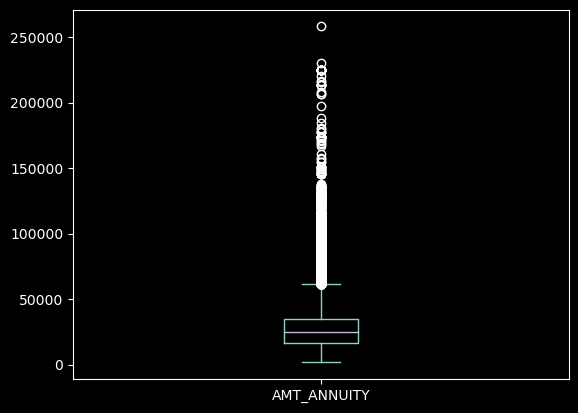

In [33]:
#now checking outliers in amt_annuity column
print("We can clearly see that there are so many outliers.\nThe mean is around 25,000 but this average is heavily influenced by outliers.\nBut, there is not much difference between median and mean, we can say on an average 25k is the loan installment of an applicant.")
df.AMT_ANNUITY.plot.box()
plt.show()

IQR: 16500 - 34500
This means that 50% of applicants i.e. 150k(approx.) have monthly installments in this range.


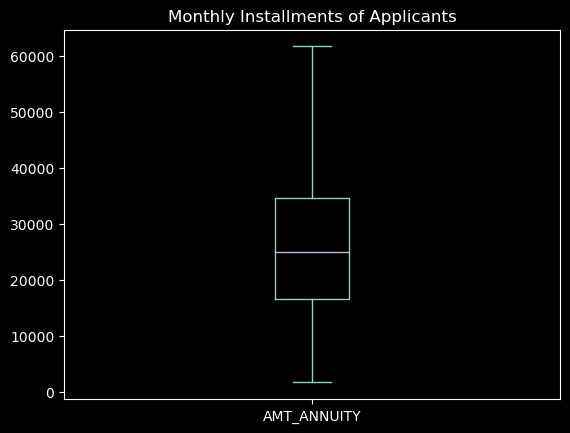

In [34]:
#let's plot excluding outliers.
print("IQR: 16500 - 34500\nThis means that 50% of applicants i.e. 150k(approx.) have monthly installments in this range.")
df.AMT_ANNUITY.plot.box(showfliers= False)
plt.title("Monthly Installments of Applicants")
plt.show()

In [35]:
#checking number of nulls in AMT_GOODS_PRICE column
df.AMT_GOODS_PRICE.isna().sum() 

278

In [36]:
#checking basic stats of this column
df.AMT_GOODS_PRICE.describe()

count    3.072210e+05
mean     5.383973e+05
std      3.694484e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [37]:
#checking if in these nulls there is someone who is not paying installments i.e. TARGET=1
print("Turns out there are 21 such applicants\nwhose value of goods against which they have taken loan is null and also have not paid installments.\nOne common thing between these applicants is that they all have taken Revolving loan and none of them owns a car.\nI will not drop these values since they are important for my analysis.")
df[(df.AMT_GOODS_PRICE.isna() == True) & (df.TARGET == 1)] 

Turns out there are 21 such applicants
whose value of goods against which they have taken loan is null and also have not paid installments.
One common thing between these applicants is that they all have taken Revolving loan and none of them owns a car.
I will not drop these values since they are important for my analysis.


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
7880        109190       1    Revolving loans           F            N   
41099       147593       1    Revolving loans           F            N   
50540       158525       1    Revolving loans           F            N   
56002       164897       1    Revolving loans           F            N   
69461       180561       1    Revolving loans           F            N   
78786       191335       1    Revolving loans           F            N   
86000       199789       1    Revolving loans           F            N   
86005       199794       1    Revolving loans           F            N   
124770      244697       1    Revolving loans           F            N   
152898      277210       1    Revolving loans           F            N   
153801      278254       1    Revolving loans           F            N   
186634      316367       1    Revolving loans           M            N   
190113      320433       1    Revolving loans           F            N   
210718      344187       1    Revolving loans           F            N   
214803      348904       1    Revolving loans           F            N   
226725      362616       1    Revolving loans           F            N   
229877      366256       1    Revolving loans           M            N   
249616      388813       1    Revolving loans           F            N   
253126      392897       1    Revolving loans           M            N   
260704      401702       1    Revolving loans           F            N   
270616      413674       1    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
7880                 N             0          121500.0    270000.0   
41099                N             0           58500.0    202500.0   
50540                Y             0           90000.0    270000.0   
56002                Y             0          180000.0    855000.0   
69461                Y             1          103500.0    180000.0   
78786                Y             2           67500.0    202500.0   
86000                Y             0           40500.0    135000.0   
86005                Y             0          112500.0    247500.0   
124770               Y             1          103500.0    135000.0   
152898               Y             0          225000.0    315000.0   
153801               Y             0           90000.0    135000.0   
186634               Y             1           67500.0    202500.0   
190113               Y             1          112500.0    180000.0   
210718               N             1          108000.0    247500.0   
214803               Y             2           90000.0    180000.0   
226725               Y             0           76500.0    247500.0   
229877               Y             0          202500.0    270000.0   
249616               N             0           90000.0    157500.0   
253126               Y             1          157500.0    337500.0   
260704               Y             0           67500.0    135000.0   
270616               Y             0           99000.0    337500.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
7880        13500.0              NaN             NaN               Working   
41099       10125.0              NaN             NaN               Working   
50540       13500.0              NaN             NaN               Working   
56002       42750.0              NaN             NaN  Commercial associate   
69461        9000.0              NaN             NaN               Working   
78786       10125.0              NaN             NaN               Working   
86000        6750.0              NaN             NaN               Working   
86005       12375.0              NaN             NaN               Working   
124770       6750.0              NaN             NaN         State servant   
152898      15750.0              NaN             NaN      

- bofore imputing nulls in AMT_GOODS_PRCE column, let's check few correlations

There is no relation between total income and value of good against which loan is taken.


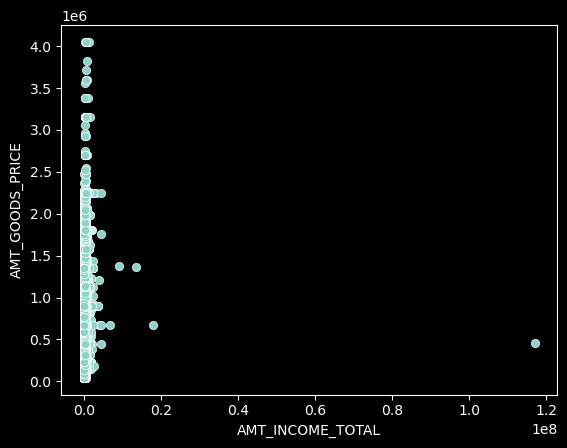

In [38]:
#let's check if there is a relation between Income of the applicant and Value of good against which loan is taken
print("There is no relation between total income and value of good against which loan is taken.")
sns.scatterplot(y=df.AMT_GOODS_PRICE, x=df.AMT_INCOME_TOTAL)
plt.show()

There is a positive linear relationship among these which makes sense also.
As the price of good against which loan is taken is increasing, the value of loan taken is also increasing.


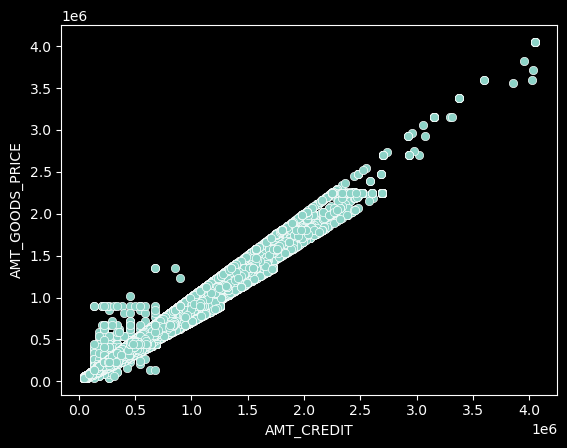

In [39]:
#let's also check if there is any relation between loan amount and value of good against which loan is taken
print("There is a positive linear relationship among these which makes sense also.\nAs the price of good against which loan is taken is increasing, the value of loan taken is also increasing.")
sns.scatterplot(x=df.AMT_CREDIT, y=df.AMT_GOODS_PRICE)
plt.show() 

#### OPERATION:
- After doing bivariate analysis on these variables, I can now replace nulls with the corresponding amount of loan that they have taken. 
- Because the loan amount is almost equal to amount of goods for which loan is being taken for most of the applicants

In [40]:
#replacing nulls in AMT_GOODS_PRICE with corresponding AMT_CREDIT value.
df.AMT_GOODS_PRICE.replace(to_replace=df.AMT_GOODS_PRICE[df.AMT_GOODS_PRICE.isna()==True].tolist(), 
                           value=df.AMT_CREDIT[df.AMT_GOODS_PRICE.isna()==True].tolist(), inplace=True)

In [41]:
#let's move on to next column in our dataset that's having null values which is NAME_TYPE_SUITE
df.NAME_TYPE_SUITE.isna().sum()

1292

- Let's replace these with mode i.e. 'Unaccompanied'. It is clear most of the applicants are unaccomapnied when registering for a loan.

In [42]:
df.NAME_TYPE_SUITE.value_counts()

NAME_TYPE_SUITE
Unaccompanied      248515
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [43]:
#filling nulls with mode
df.NAME_TYPE_SUITE.fillna(df.NAME_TYPE_SUITE.mode()[0], inplace= True)

In [44]:
#OWN_CAR_AGE null values. 
df.OWN_CAR_AGE.isna().sum()

202920

- These nulls may not be missing completely at random just like above ones we have dealt with till now. These have a meaning which is if someone doesn't have a car then age won't be there and hence null. Let's check how many of our clients don't have any car. 

In [45]:
print("Looks like I was right.\nNo. of applicants not having car and age of car is almost same.\nThere is a specific reason behind these missing values.\nAnd the reason is if someone does not own car, will not have any age for car as well.")
df.FLAG_OWN_CAR.value_counts()

Looks like I was right.
No. of applicants not having car and age of car is almost same.
There is a specific reason behind these missing values.
And the reason is if someone does not own car, will not have any age for car as well.


FLAG_OWN_CAR
N    202915
Y    104584
Name: count, dtype: int64

In [46]:
print("All these are not having cars and hence own_car_age has null values. These nulls are MNAR values.\nSince, we already have a column which tells us whether the person has a car or not\nand also 2/3rd of values are missing, I will drop this column.")
df[(df.FLAG_OWN_CAR == 'N') & (df.OWN_CAR_AGE.isna()==True)][['FLAG_OWN_CAR', 'OWN_CAR_AGE']]

All these are not having cars and hence own_car_age has null values. These nulls are MNAR values.
Since, we already have a column which tells us whether the person has a car or not
and also 2/3rd of values are missing, I will drop this column.


FLAG_OWN_CAR  OWN_CAR_AGE
0                 N          NaN
1                 N          NaN
3                 N          NaN
4                 N          NaN
5                 N          NaN
...             ...          ...
307506            N          NaN
307507            N          NaN
307508            N          NaN
307509            N          NaN
307510            N          NaN

[202915 rows x 2 columns]

In [47]:
#dropping own_car_age column.
df.drop(columns='OWN_CAR_AGE', inplace=True)

In [48]:
#renaming col work phone to home phone since it is home phone number and from emp phone to work phone
df.rename(columns={'FLAG_WORK_PHONE':'FLAG_HOME_PHONE', 'FLAG_EMP_PHONE':'FLAG_WORK_PHONE'}, inplace=True)

In [49]:
#this col also tells about home phone. 
print(df.FLAG_PHONE.value_counts())
print('\n',df.FLAG_HOME_PHONE.value_counts())
print("\nLet's keep the FLAG_HOME_PHONE column and drop flag_phone.\nBoth tells about same thing. Since Flag_home_phone has less nulls we will keep it.")

FLAG_PHONE
0    221074
1     86425
Name: count, dtype: int64

 FLAG_HOME_PHONE
0    246195
1     61304
Name: count, dtype: int64

Let's keep the FLAG_HOME_PHONE column and drop flag_phone.
Both tells about same thing. Since Flag_home_phone has less nulls we will keep it.


In [50]:
#dropping FLAG_PHONE column because same data already exists in FLAG_HOME_PHONE column
df.drop(columns=['FLAG_PHONE'], inplace=True) 

In [51]:
#inspecting row where applicant doesn't have mobile 
print("this applicant has not provided phone no. but has provided work phone and is also paying loan without any delays.\nLet's not drop this.")
df[df.FLAG_MOBIL == 0][['TARGET','NAME_CONTRACT_TYPE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT','FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_HOME_PHONE']]

this applicant has not provided phone no. but has provided work phone and is also paying loan without any delays.
Let's not drop this.


TARGET NAME_CONTRACT_TYPE  AMT_INCOME_TOTAL  AMT_CREDIT  FLAG_MOBIL  \
15709       0         Cash loans          126000.0    278613.0           0   

       FLAG_WORK_PHONE  FLAG_HOME_PHONE  
15709                1                0

let's see if people whose phone is not reachable are likely to default or not.

In [52]:
#it looks like there are 45 such applicants who are not paying installments and their phone is also not reachable
#this also means that except for these 45 applicants, everybody whose phone is not reachable are paying timely installments.
df[(df.FLAG_CONT_MOBILE == 0) & (df.TARGET == 1)][['FLAG_CONT_MOBILE', 'TARGET']].count()

FLAG_CONT_MOBILE    45
TARGET              45
dtype: int64

In [53]:
print("Only 17441 people have provided their emails. 95% of applicants have not provided their email.\nThis column is not of much help. Let's drop this column.")
df.FLAG_EMAIL.value_counts()

Only 17441 people have provided their emails. 95% of applicants have not provided their email.
This column is not of much help. Let's drop this column.


FLAG_EMAIL
0    290058
1     17441
Name: count, dtype: int64

In [54]:
#dropping Flag email column since 95% of applicants have not provided their email ids. 
df.drop('FLAG_EMAIL', axis=1, inplace=True)

In [55]:
#next we have is Organization column. Let's inspect
df.ORGANIZATION_TYPE.isna().sum()

0

In [56]:
#looks really unorganized. let's merge few categories to one. 
df.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67989
XNA                       55374
Self-employed             38409
Other                     16681
Medicine                  11192
Business Entity Type 2    10553
Government                10403
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3246
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [57]:
#grouping business entity type 1,2 or 3 as one category only
df.ORGANIZATION_TYPE = df.ORGANIZATION_TYPE.apply(lambda x: 'Business_Entity' if x in ['Business Entity Type 1', 
                                                                'Business Entity Type 2','Business Entity Type 3'] else x)

In [58]:
#grouping categories in organization_type column
def replace(x):
    lis = ['Trade: type {}'.format(i) for i in range(1,8)]
    lis1 = ['Industry: type {}'.format(i) for i in range(1,14)]
    lis2 = ['Transport: type {}'.format(i) for i in range(1,5)]
    if x in lis:
        x = 'Trade'
    elif x in lis1:
        x = 'Industry'
    elif x in lis2:
        x = 'Transport'
    return x

df.ORGANIZATION_TYPE = df.ORGANIZATION_TYPE.apply(replace)
df.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business_Entity        84525
XNA                    55374
Self-employed          38409
Other                  16681
Trade                  14315
Industry               14311
Medicine               11192
Government             10403
Transport               8990
School                  8893
Kindergarten            6880
Construction            6721
Security                3246
Housing                 2958
Military                2634
Bank                    2507
Agriculture             2454
Police                  2341
Postal                  2157
Security Ministries     1974
Restaurant              1811
Services                1575
University              1327
Hotel                    966
Electricity              950
Insurance                597
Telecom                  577
Emergency                560
Advertising              429
Realtor                  396
Culture                  379
Mobile                   317
Legal Services           305
Cleaning                 

In [59]:
#let's move on to occupation column
df.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55184
Sales staff              32101
Core staff               27569
Managers                 21370
Drivers                  18602
High skill tech staff    11379
Accountants               9812
Medicine staff            8536
Security staff            6720
Cooking staff             5945
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1304
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [60]:
#checking nulls in occupation_type
df.OCCUPATION_TYPE.isna().sum()

96391

- I think, these values are not missing completely at random since those who are student or have their own business won't be having any occupation type. Hence, these 96k values which is 1/3rd of rows (approx.) are (MNAR) vals. 
- To treat these, let's fill all NAs with 'others'.

In [61]:
df.OCCUPATION_TYPE.fillna('others', inplace=True) #filling nulls with 'others'

In [62]:
#checking nulls in CNT_FAM_MEMBERS columns
df.CNT_FAM_MEMBERS.isna().sum()

2

In [63]:
#further inspecting these 2 nulls in CNT_FAM_MEMBERS column
print("Following observation on these two applicants:\n1. They both have unknown family status.\n2. They both were unaccompanied.\n3. They both don't have any children.\n4. They both have NaN as count of family members.\nLet's replace NaN with mode of this column.")
df[df.CNT_FAM_MEMBERS.isna() == True][['CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS', 'NAME_TYPE_SUITE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', "CNT_CHILDREN"]]

Following observation on these two applicants:
1. They both have unknown family status.
2. They both were unaccompanied.
3. They both don't have any children.
4. They both have NaN as count of family members.
Let's replace NaN with mode of this column.


CNT_FAM_MEMBERS NAME_FAMILY_STATUS NAME_TYPE_SUITE  AMT_INCOME_TOTAL  \
41982               NaN            Unknown   Unaccompanied          450000.0   
187348              NaN            Unknown   Unaccompanied          202500.0   

        AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  CNT_CHILDREN  
41982     675000.0      33750.0         202500.0             0  
187348    585000.0      29250.0         202500.0             0

In [64]:
#filling with mode which is 2 children
df.CNT_FAM_MEMBERS.fillna(df.CNT_FAM_MEMBERS.mode()[0], inplace=True)

In [65]:
#checking nulls in ext_source_1
df.EXT_SOURCE_1.isna().sum()

173374

- let's check how many credit score values we have where target is 1

In [66]:
#checking for credit source 1
print("out of 24825 applicants who are facing difficulties in paying installments\nwe are having only 10,054 applicants' credit score from source 1")
df.EXT_SOURCE_1[df.TARGET == 1].value_counts().sum() #out of 24825 only 10,054, rest all nulls

out of 24825 applicants who are facing difficulties in paying installments
we are having only 10,054 applicants' credit score from source 1


10054

In [67]:
#checking for credit score 2
print("from source 2 we can see credit score for almost every applicant who is facing difficulties in paying installments.\nTherefore let's keep this column and drop other two")
df.EXT_SOURCE_2[df.TARGET == 1].value_counts().sum()  

from source 2 we can see credit score for almost every applicant who is facing difficulties in paying installments.
Therefore let's keep this column and drop other two


24773

In [68]:
#checking for credit score 3
print("out of 24825 applicants who are facing difficulties in paying installments\nWe have only 19,148 applicants' credit score from source 3")
df.EXT_SOURCE_3[df.TARGET == 1].value_counts().sum() 

out of 24825 applicants who are facing difficulties in paying installments
We have only 19,148 applicants' credit score from source 3


19148

In [69]:
#dropping credit source 1 and 3 and keeping source 2 since we have most credit scores of defaulters from source2.
df.drop(columns=['EXT_SOURCE_1', 'EXT_SOURCE_3'], inplace=True)

In [70]:
#cols that have more than 45% null values
print(df.columns[100*df.isnull().mean()>45])
print('\n{} columns have more that 45% null values in our applications dataframe'.format(len(df.columns[100*df.isnull().mean()>45])))

Index(['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_M

### All of the above columns having more than 40% nulls give information about the house that client is living in. 
- All of these columns have more than or equal to 45% null values.
- So, all 47 columns that have more than 45% null values are related to client's house information only. 
- With so many nulls, I cannot do proper analysis.
- Also, I cannot merge all of these since they are normalized values. 
- Only action that looks reasonable is dropping all of these columns since they don't add any value to my analysis.
- Since, there are so many cols. Dropping all of them may not be right approach. 
- Instead I will create a new dataframe and exclude these cols. 
- This way I don't delete them permanently and can always have an easy access to them if need be. 

In [71]:
#creating new dataframe and keeping cols that have less than 40% nulls.
inp = df.drop(df.columns[39:86], axis=1)

In [72]:
#now we have only 70 cols left. let's move on to clean data further
inp.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_HOME_PHONE  \
0            -2120           1                1                0   
1             -291           1                1                0   
2            -2531           1                1                1   
3            -2437           1                1                0   
4            -3458           1                1                0   

   FLAG_CONT_MOBILE OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                 1        Laborers              1.0                     2   
1                 1      Core staff              2.0                     1   
2                 1        Laborers              1.0                     2   
3                 1        Laborers              2.0                     2   
4                 1      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3       

In [73]:
#checking nulls in social circle defaults columns
print("Client's social surroundings observable defaults(30 DPD)-Null Values:", inp.OBS_30_CNT_SOCIAL_CIRCLE.isna().sum())
print("Client's social surroundings confirmed defaults(30 DPD)-Null Values:", inp.DEF_30_CNT_SOCIAL_CIRCLE.isna().sum())
print("Client's social surroundings observable defaults(60 DPD)-Null Values:", inp.OBS_60_CNT_SOCIAL_CIRCLE.isna().sum())
print("Client's social surroundings confirmed defaults(60 DPD)-Null Values:", inp.DEF_60_CNT_SOCIAL_CIRCLE.isna().sum())

Client's social surroundings observable defaults(30 DPD)-Null Values: 1021
Client's social surroundings confirmed defaults(30 DPD)-Null Values: 1021
Client's social surroundings observable defaults(60 DPD)-Null Values: 1021
Client's social surroundings confirmed defaults(60 DPD)-Null Values: 1021


#### Let's fill the null values with mode in all these four columns. Also, 50%ile and mode are same only for these columns which is 0.

In [74]:
#checking mode for these four cols
print(inp.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0])
print(inp.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0])
print(inp.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0])
print(inp.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0])

0.0
0.0
0.0
0.0


In [75]:
#filling null values with the most occuring value i.e. mode = 0
inp.OBS_30_CNT_SOCIAL_CIRCLE.fillna(0, inplace=True)
inp.DEF_30_CNT_SOCIAL_CIRCLE.fillna(0, inplace=True)
inp.OBS_60_CNT_SOCIAL_CIRCLE.fillna(0, inplace=True)
inp.DEF_60_CNT_SOCIAL_CIRCLE.fillna(0, inplace=True) 

In [76]:
#next we have 'how many days before application did client change phone' column. 
inp.DAYS_LAST_PHONE_CHANGE.isna().sum()

1

In [77]:
#let's fill it with median
inp.DAYS_LAST_PHONE_CHANGE.fillna(df.DAYS_LAST_PHONE_CHANGE.median(), inplace=True)

- next we have FLAG_DOCUMENT_2 - 21 cols
- We don't have any nulls in documents related columns
- let's make one column with total_documents and add them all to get a number for total documents submitted by each client.

In [78]:
#printing using iloc and checking that all cols are included correclty in range
list(inp.iloc[:,44:64].columns) 

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [79]:
#adding all documents columns and creating a new column, and then dropping all those 20 doc cols.
#keeping a track of total documents submitted by applicant out of 20 docs.
inp['TOTAL_DOCUMENTS'] = inp.iloc[:, 44:64].sum(axis=1) 

In [80]:
#we have 29549 applicants who have not submitted any doc.
inp.TOTAL_DOCUMENTS.value_counts()

TOTAL_DOCUMENTS
1    270044
0     29549
2      7742
3       163
4         1
Name: count, dtype: int64

In [81]:
#now let's drop those 20 flag_document columns since we don't need them anymore
inp.drop(columns = list(inp.iloc[:, 44:64]), inplace=True) 

In [82]:
#checking shape
inp.shape

(307499, 51)

In [83]:
print("All the remaining cols that tell us about 'number of enquiries to credit bureau about the applicant'\nare having same number of null values")
print('No. of enquiries to Credit Bureau about the client one hour before application-NULL VALUES:', inp.AMT_REQ_CREDIT_BUREAU_HOUR.isna().sum())
print('No. of enquiries to Credit Bureau about the client one day before application-NULL VALUES:', inp.AMT_REQ_CREDIT_BUREAU_DAY.isna().sum())
print('No. of enquiries to Credit Bureau about the client one week before application-NULL VALUES:', inp.AMT_REQ_CREDIT_BUREAU_WEEK.isna().sum())
print('No. of enquiries to Credit Bureau about the client one month before application-NULL VALUES:', inp.AMT_REQ_CREDIT_BUREAU_MON.isna().sum())
print('No. of enquiries to Credit Bureau about the client 3 months before application-NULL VALUES:', inp.AMT_REQ_CREDIT_BUREAU_QRT.isna().sum())
print('No. of enquiries to Credit Bureau about the client one year before application-NULL VALUES:', inp.AMT_REQ_CREDIT_BUREAU_YEAR.isna().sum())

All the remaining cols that tell us about 'number of enquiries to credit bureau about the applicant'
are having same number of null values
No. of enquiries to Credit Bureau about the client one hour before application-NULL VALUES: 41518
No. of enquiries to Credit Bureau about the client one day before application-NULL VALUES: 41518
No. of enquiries to Credit Bureau about the client one week before application-NULL VALUES: 41518
No. of enquiries to Credit Bureau about the client one month before application-NULL VALUES: 41518
No. of enquiries to Credit Bureau about the client 3 months before application-NULL VALUES: 41518
No. of enquiries to Credit Bureau about the client one year before application-NULL VALUES: 41518


#### Since all the cols have same number of null values
- let's add all of these and calculate total no of enquiries for one year and store it in one new col.

In [84]:
#adding hour,day,week,month,quarter, and year and then dropping all these cols 
inp['TOTAL_AMT_REQ_CREDIT_BUREAU_YEAR'] = inp.iloc[:, 44:50].sum(axis=1) 

In [85]:
#now dropping hour,day,week,month,quarter, and year enquiries req to bureau cols
inp.drop(columns=inp.iloc[:, 44:50].columns.to_list(), inplace=True)

In [86]:
#checking shape
inp.shape

(307499, 46)

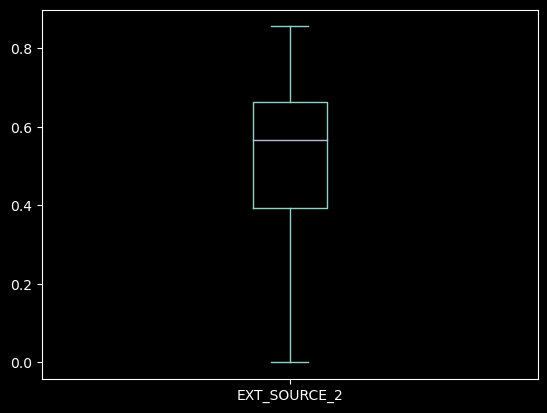

In [87]:
#lastly we have few nulls in ext_source_2. let's fix it
#let's check IQR first of this column
inp.EXT_SOURCE_2.plot.box() 
plt.show()

- No outliers as such, Before replacing nulls let's check few things.
- Looks like in the nulls also we have few applicants who have not paid x installments.
- Which means replacing these applicants with mean credit score is not right course of action because it will indicate that people defaulting are also having average credit score which is not right in reality.
- So for ext_source_2 nulls, let's replace with mean only for those who are non-defaulters.
- for those nulls where corresponding TARGET=1(defaulters), we will replace with mean credit score of defaulters instead of whole column's mean.

In [88]:
#so we have 52 such values where credit score is not available for the person and he is also not paying installments(defaulter). 
inp[(inp.EXT_SOURCE_2.isna()==True) & (inp.TARGET == 1)][['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'FLAG_OWN_REALTY']]

TARGET  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY FLAG_OWN_REALTY
3525         1           65025.0    148500.0      10093.5               Y
7491         1          135000.0    253737.0      16519.5               N
15795        1          270000.0    545040.0      26509.5               N
23259        1          135000.0    450000.0      12757.5               N
24936        1           76500.0    263686.5      17298.0               N
41694        1          135000.0    127350.0      12726.0               N
42894        1          135000.0    595903.5      25375.5               N
45519        1          112500.0    284400.0      10719.0               N
58898        1          211500.0    545040.0      35617.5               Y
60708        1          157500.0    202500.0      10125.0               N
62573        1          135000.0    675000.0      24930.0               Y
62628        1          157500.0    101880.0      10206.0               Y
73579        1           81000.0    142200.0       8068.5               Y
74434        1           90000.0    161730.0      12829.5               Y
101828       1          103500.0    385164.0      16447.5               Y
102354       1           90000.0    364896.0      19233.0               Y
103264       1           67500.0    225000.0      23872.5               N
104915       1          103500.0    308133.0      16263.0               Y
106020       1          121500.0    755190.0      31995.0               Y
109016       1          157500.0    343800.0      13090.5               N
114334       1           81000.0    500211.0      26779.5               Y
120289       1          189000.0    755190.0      35122.5               N
133608       1          103500.0    508495.5      20295.0               N
144001       1          180000.0    835380.0      35392.5               Y
150519       1           90000.0    555273.0      20529.0               Y
157066       1          103500.0    225000.0      10620.0               Y
159463       1          225000.0    474048.0      12843.0               N
162856       1          122850.0    675000.0      19071.0               Y
162892       1          135000.0    273636.0      29164.5               Y
163034       1           67500.0    193392.0      13054.5               Y
174629       1           99000.0    172692.0      18454.5               N
178323       1           90000.0    298512.0      17266.5               N
181353       1          202500.0    628114.5      25348.5               Y
182349       1           96750.0    247275.0      19548.0               Y
185512       1          135000.0    314100.0      16573.5               Y
192466       1          135000.0    450000.0      21109.5               Y
194446       1          157500.0    284400.0      22468.5               Y
195006       1          202500.0    545040.0      25537.5               Y
200235       1          207000.0    675000.0      24799.5               N
202299       1          130500.0    180000.0       9000.0               Y
207295       1           67500.0    343800.0      16155.0               Y
216852       1           99000.0    448056.0      20884.5               Y
236249       1          112500.0    545040.0      25537.5               Y
259148       1          112500.0    123637.5       9837.0               Y
267760       1           90000.0    281916.0      13270.5               Y
275137       1           67500.0    263686.5      14724.0               Y
284427       1           90000.0    117162.0      12559.5               Y
285178       1           90000.0    284400.0      13387.5               Y
291588       1           81000.0    284400.0      13387.5               Y
291614       1          112500.0   1078200.0      31653.0               Y
297684       1          180000.0    592560.0      31153.5               Y
304185       1          135000.0   1021500.0      29997.0               Y

In [89]:
#for these 52 values, let's replace them with mean credit score of defaulters(target=1). 
mean_credit_score_for_LikelyToDefaultApplicants = round(inp.EXT_SOURCE_2[inp['TARGET'] == 1].mean(), 2)

In [90]:
#checking mean
mean_credit_score_for_LikelyToDefaultApplicants

0.41

In [91]:
#now filling null values in EXT_SOURCE_2 column for likely to default applicants
inp.EXT_SOURCE_2[(inp.TARGET == 1) & (inp.EXT_SOURCE_2.isna()==True)] = inp.EXT_SOURCE_2[(inp.TARGET == 1) & (inp.EXT_SOURCE_2.isna()==True)].replace(np.nan, mean_credit_score_for_LikelyToDefaultApplicants)

- basically what i did above is, fetched all those values where applicants are not paying installments.
- then i checked what's their credit score.
- now for all these applicants, i calculated their avg credit score 
- and filled nulls with this avg credit score of defaulters

- basically i am treating nulls in ext_source_2 col(credit score) for likely to default and not likely to default applicants differently

In [92]:
# now let's fill rest 608 nulls with mean credit score of non-defaulters where Target =0. 
inp.EXT_SOURCE_2.isna().sum() 

608

In [93]:
#calculating mean
mean_credit_score_for_restApplicants = round(inp.EXT_SOURCE_2[inp.TARGET == 0].mean(), 2)
mean_credit_score_for_restApplicants

0.52

In [94]:
#filling null values in EXT_source_2 col for rest of the applicants with mean credit score of non-defaulters
inp.EXT_SOURCE_2[inp.TARGET == 0] = inp.EXT_SOURCE_2[inp.TARGET == 0].fillna(mean_credit_score_for_restApplicants)

In [95]:
#rechecking nulls in applications df
inp.isna().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         0
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                     0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
FLAG_MOBIL                          0
FLAG_WORK_PHONE                     0
FLAG_HOME_PHONE                     0
FLAG_CONT_MOBILE                    0
OCCUPATION_TYPE                     0
CNT_FAM_MEMB

## First step of data cleaning is complete. Now we don't have any null values in our applications  dataset. 

### At our next step let's look at category and numeric columns. Let's see if there are any outliers or anomalies in our data and handle them accordingly.

- Looks like OBS_30_CNT_SOCIAL_CIRCLE and OBS_30_CNT_CIRCLE is coming in numerical column because it has count of values greater than 30. Let's inspect

In [96]:
#converting data type to integer
inp.DEF_30_CNT_SOCIAL_CIRCLE = inp.DEF_30_CNT_SOCIAL_CIRCLE.astype(int)
inp.DEF_60_CNT_SOCIAL_CIRCLE = inp.DEF_60_CNT_SOCIAL_CIRCLE.astype(int)
inp.OBS_30_CNT_SOCIAL_CIRCLE = inp.OBS_30_CNT_SOCIAL_CIRCLE.astype(int)
inp.OBS_60_CNT_SOCIAL_CIRCLE = inp.OBS_60_CNT_SOCIAL_CIRCLE.astype(int)

#### Let's cap the below columns.
- In DEF_30 34 is an outlier. 
- In DEF_60 24 is an outlier. 
- In OBS_30 28, 29, 47, 348 are outliers 
- In OBS_60 29, 28, 47, 344, 30, 26 are outliers. 
- Let's cap data accordingly based on few things-
     Like how many applicant are likely to default based on their social circle defaults

- In DEF we are sure of the defaults but in OBS we are saying with observable.
- Let's just assume that in OBS col, the bank asked the applicant for how many past defaults he has observed in his social circle whereas in DEF we are sure that these many from applicant's social circle have defaulted. 

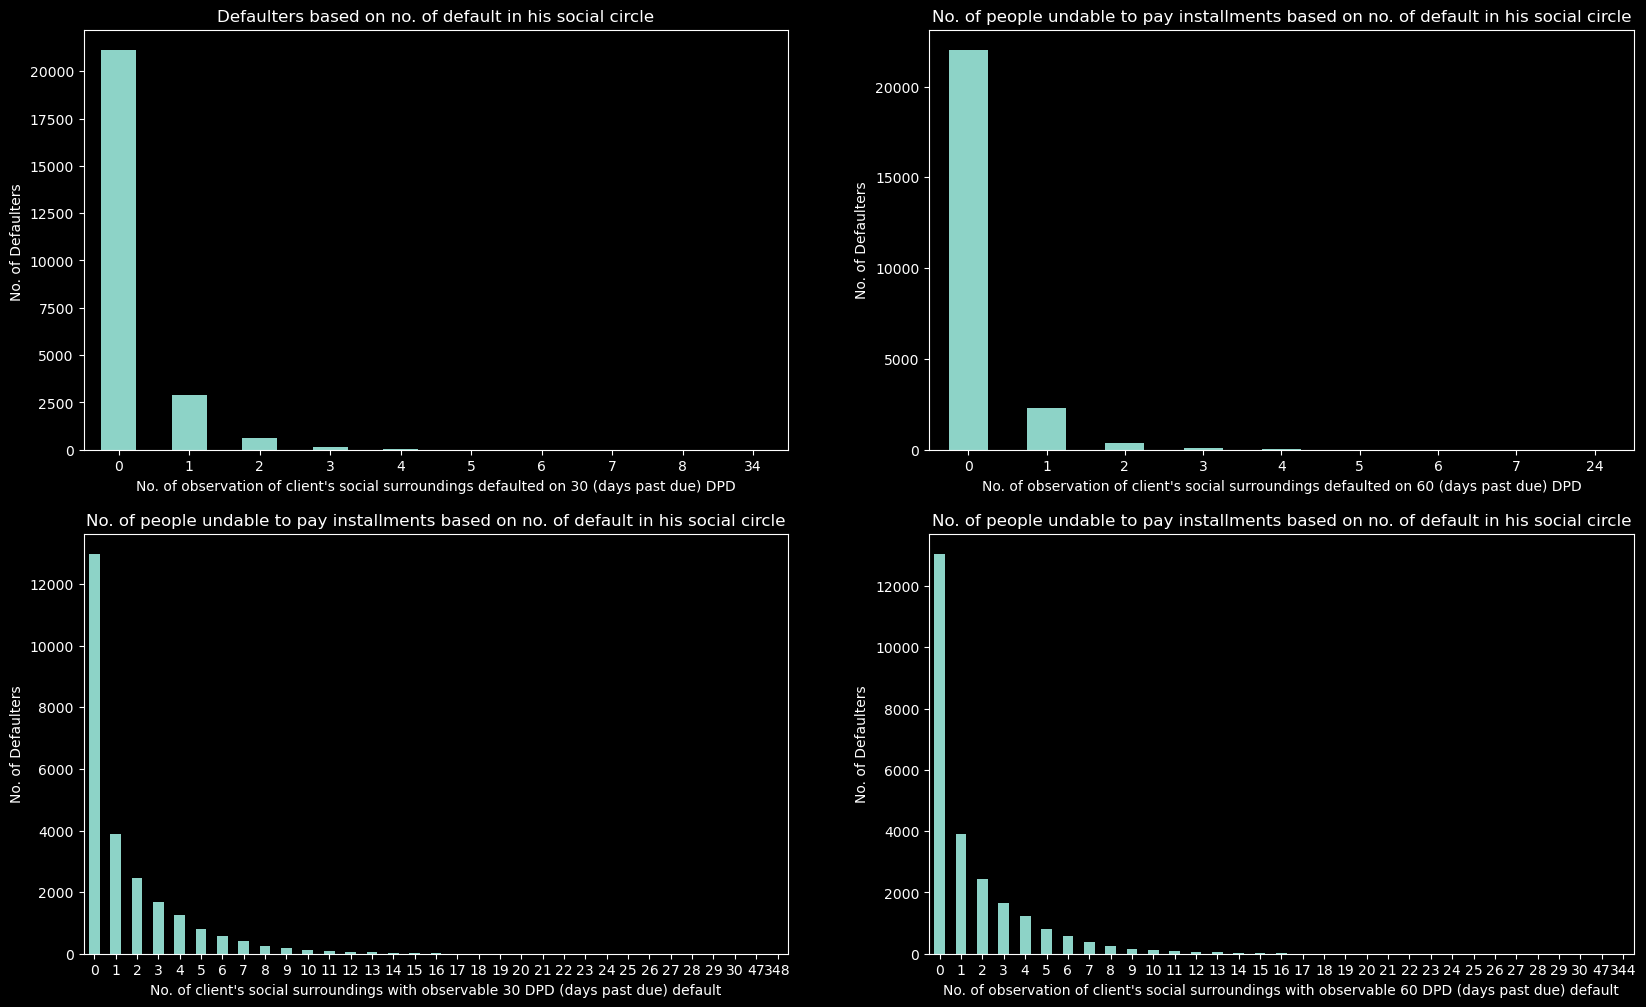

In [97]:
#let's see no. of defaults in social circle for applicants who are not paying installments
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
inp.groupby('DEF_30_CNT_SOCIAL_CIRCLE')['TARGET'].sum().plot.bar()
plt.ylabel('No. of Defaulters ')
plt.xlabel("No. of observation of client's social surroundings defaulted on 30 (days past due) DPD")
plt.xticks(rotation=0)
plt.title("Defaulters based on no. of default in his social circle")

plt.subplot(2,2,2) 
inp.groupby('DEF_60_CNT_SOCIAL_CIRCLE')['TARGET'].sum().plot.bar()
plt.ylabel('No. of Defaulters')
plt.xlabel("No. of observation of client's social surroundings defaulted on 60 (days past due) DPD")
plt.xticks(rotation=0)
plt.title("No. of people undable to pay installments based on no. of default in his social circle")

plt.subplot(2,2,3)
inp.groupby('OBS_30_CNT_SOCIAL_CIRCLE')['TARGET'].sum().plot.bar()
plt.ylabel('No. of Defaulters')
plt.xlabel("No. of client's social surroundings with observable 30 DPD (days past due) default")
plt.xticks(rotation=0)
plt.title("No. of people undable to pay installments based on no. of default in his social circle")

plt.subplot(2,2,4)
inp.groupby('OBS_60_CNT_SOCIAL_CIRCLE')['TARGET'].sum().plot.bar()
plt.ylabel('No. of Defaulters')
plt.xlabel("No. of observation of client's social surroundings with observable 60 DPD (days past due) default")
plt.xticks(rotation=0)
plt.title("No. of people undable to pay installments based on no. of default in his social circle")
plt.show()

- No. of observation of client's social surroundings with **observable** 30 and 60 DPD have almost same pattern which means they both are not very different. 

**capping the DEF and OBS columns.**

In [98]:
#capping with max defaults in social circle as 4 in confirmed defaults and with 8 in case of observable defaults
inp.DEF_30_CNT_SOCIAL_CIRCLE = inp.DEF_30_CNT_SOCIAL_CIRCLE.apply(lambda x: 4 if x>4 else x)
inp.DEF_60_CNT_SOCIAL_CIRCLE = inp.DEF_60_CNT_SOCIAL_CIRCLE.apply(lambda x: 4 if x>4 else x)
inp.OBS_30_CNT_SOCIAL_CIRCLE = inp.OBS_30_CNT_SOCIAL_CIRCLE.apply(lambda x: 8 if x>8 else x)
inp.OBS_60_CNT_SOCIAL_CIRCLE = inp.OBS_60_CNT_SOCIAL_CIRCLE.apply(lambda x: 8 if x>8 else x)

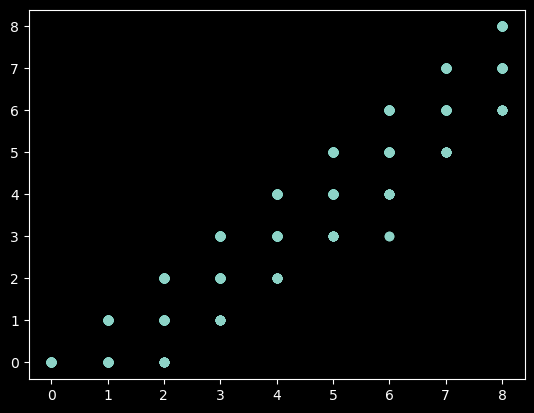

In [99]:
#seeing relation between observable defautls for 30 and 60 days
plt.scatter(x=inp.OBS_30_CNT_SOCIAL_CIRCLE, y=inp.OBS_60_CNT_SOCIAL_CIRCLE)
plt.show()

It's clearly visible in scatter plot that OBS 30 and 60 days columns don't have a big difference and they have a linear positive relationship. Let's keep one column and drop the other. Let's keep the 60 DPD one. 

In [100]:
#dropping OBS 30
inp.drop('OBS_30_CNT_SOCIAL_CIRCLE', axis=1, inplace=True)

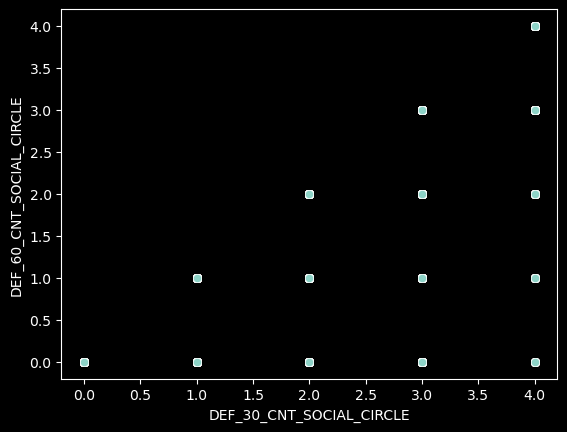

In [101]:
##seeing relation between definite defautls for 30 and 60 days
sns.scatterplot(x=inp.DEF_30_CNT_SOCIAL_CIRCLE, y = inp.DEF_60_CNT_SOCIAL_CIRCLE)
plt.show()

- not a good relationship between these two columns.
- In DEF 30 DPD column there are more defaults among social circle of an applicant. So, let's keep DEF_30 DaysPastDue and drop 60_DPD.

In [102]:
#dropping def60
inp.drop('DEF_60_CNT_SOCIAL_CIRCLE', axis=1, inplace=True)

In [103]:
#checking shape of dataframe
inp.shape

(307499, 44)

 - Let's inspect the category type columns first and then check the numerical type cols. 

In [104]:
inp.CODE_GENDER.value_counts()

CODE_GENDER
F      202440
M      105055
XNA         4
Name: count, dtype: int64

In [105]:
#XNA is code_gender is most likely null
#checking rows with XNA as gender
print("Since there are only 4 such rows, let's drop them.")
inp[inp['CODE_GENDER'] == 'XNA']

Since there are only 4 such rows, let's drop them.


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                Y             0          207000.0    382500.0   
38566                Y             2          157500.0    270000.0   
83382                Y             1          135000.0    405000.0   
189640               Y             0          247500.0    540000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657       19125.0         337500.0   Unaccompanied               Working   
38566       13500.0         225000.0          Family               Working   
83382       20250.0         225000.0   Unaccompanied               Working   
189640      27000.0         900000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                     0.020713      -20232         -10044   
38566                     0.026392      -13717          -2797   
83382                     0.035792      -10647          -1228   
189640                    0.035792       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_WORK_PHONE  \
35657            -10024.0            -3537           1                1   
38566             -2241.0            -4659           1                1   
83382              -183.0            -1671           1                1   
189640            -4099.0            -2326           1                1   

        FLAG_HOME_PHONE  FLAG_CONT_MOBILE     OCCUPATION_TYPE  \
35657                 1                 1              others   
38566                 1                 1  Low-skill Laborers   
83382                 1                 1          Core staff   
189640                1                 1              others   

        CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
35657               2.0                     3                            3   
38566               4.0                     2                            2   
83382               3.0                     2                            2   
189640              2.0                     2                            2   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
35657                     TUESDAY                       10   
38566                      FRIDAY                       16   
83382                    THURSDAY                       15   
189640                     FRIDAY                       15   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
35657                            0                           0   
38566                            0                           0   
83382                            0                           0   
189640                           0                           0   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
35657                             0                       0   
38566                             0                       0   
83382                             0                       0   
189640                            0                       0   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
35657                        0     

In [106]:
#dropping rows with XNA as gender
inp = inp[inp.CODE_GENDER != 'XNA'] 

In [107]:
#let's recheck the value_counts of code_gender col. 
inp.CODE_GENDER.value_counts()

CODE_GENDER
F    202440
M    105055
Name: count, dtype: int64

In [108]:
#checking value counts of CNT_CHILDREN column
inp.CNT_CHILDREN.value_counts()

CNT_CHILDREN
0     215357
1      61118
2      26748
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

- Since, there are very less number of applicants for children more than 4. Let's cap this column and assume 4 children for all those who have more than 4 children. This way outliers will not affect the data. 

In [109]:
#capping count of children column with 4 children for all those applicants who have above 4 children.
inp.CNT_CHILDREN = inp.CNT_CHILDREN.apply(lambda x: 4 if x>4 else x)

In [110]:
#rechecking
inp.CNT_CHILDREN.value_counts()

CNT_CHILDREN
0    215357
1     61118
2     26748
3      3717
4       555
Name: count, dtype: int64

In [111]:
#checking value_counts of NAME_TYPE_SUITE
inp.NAME_TYPE_SUITE.value_counts()

NAME_TYPE_SUITE
Unaccompanied      249804
Family              40147
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

- Let's replace other_A, other_B and 'group of people' together as one category and call it as 'other'

In [112]:
#replacing
inp.NAME_TYPE_SUITE = inp.NAME_TYPE_SUITE.replace(['Other_A', 'Other_B', 'Group of people'], 'other')

In [113]:
#let's recheck.
inp.NAME_TYPE_SUITE.value_counts()

NAME_TYPE_SUITE
Unaccompanied      249804
Family              40147
Spouse, partner     11370
Children             3267
other                2907
Name: count, dtype: int64

In [114]:
#checking value_counts
inp.NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Working                 158765
Commercial associate     71613
Pensioner                55362
State servant            21700
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [115]:
#checking rows where income type is maternity leave
inp[inp['NAME_INCOME_TYPE']== 'Maternity leave']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
48949       156685       0    Revolving loans           M            N   
109612      227123       0    Revolving loans           F            N   
218269      352877       1         Cash loans           F            N   
291432      437628       1         Cash loans           F            Y   
295458      442305       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
48949                N             0          360000.0    765000.0   
109612               Y             2          135000.0    810000.0   
218269               Y             2           67500.0   1435500.0   
291432               Y             2           49500.0    423000.0   
295458               Y             1           90000.0    315000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
48949       76500.0         765000.0    Unaccompanied  Maternity leave   
109612      40500.0         810000.0  Spouse, partner  Maternity leave   
218269      40896.0        1435500.0    Unaccompanied  Maternity leave   
291432      11286.0         423000.0  Spouse, partner  Maternity leave   
295458      15750.0         315000.0    Unaccompanied  Maternity leave   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
48949                Higher education            Married  House / apartment   
109612               Higher education            Married  House / apartment   
218269  Secondary / secondary special            Married  House / apartment   
291432  Secondary / secondary special            Married  House / apartment   
295458               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
48949                     0.046220      -22166          -3762   
109612                    0.030755      -14943          -1223   
218269                    0.006852      -13121          -3629   
291432                    0.031329      -14363          -3020   
295458                    0.001276       -9519          -1550   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_WORK_PHONE  \
48949             -9228.0            -4363           1                1   
109612            -8853.0            -3868           1                1   
218269             -795.0            -1007           1                1   
291432             -419.0            -4333           1                1   
295458            -4266.0             -768           1                1   

        FLAG_HOME_PHONE  FLAG_CONT_MOBILE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
48949                 0                 1          others              2.0   
109612                0                 1      Core staff              4.0   
218269                0                 1        Laborers              4.0   
291432                0                 1      Core staff              4.0   
295458                0                 1     Accountants              3.0   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
48949                      1                            1   
109612                     2                            2   
218269                     3                            3   
291432                     2                            2   
295458                     2                            2   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
48949                    THURSDAY                       19   
109612                    TUESDAY                       17   
218269                    TUESDAY                       11   
291432                     MONDAY                       13   
295458                     MONDAY                       11   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
48949                            0                           1   
109612                           0     

- it seems like 'Maternity Leave' category was wrongly classified as it represents temporary leave and not type of income. Also, one of the applicants in this category is male which is definetely an anomaly. Let's reclassify this category as 'Working' which is the mode of this column. 

In [116]:
#replacing 'maternity leave' income type with mode
inp.NAME_INCOME_TYPE = inp.NAME_INCOME_TYPE.replace('Maternity leave', 'Working')

In [117]:
#rechecking
inp.NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Working                 158770
Commercial associate     71613
Pensioner                55362
State servant            21700
Unemployed                  22
Student                     18
Businessman                 10
Name: count, dtype: int64

In [118]:
#cheking value counts of organization type column
inp.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business_Entity        84524
XNA                    55374
Self-employed          38409
Other                  16681
Trade                  14315
Industry               14310
Medicine               11191
Government             10403
Transport               8990
School                  8893
Kindergarten            6879
Construction            6721
Security                3246
Housing                 2958
Military                2634
Bank                    2507
Agriculture             2454
Police                  2341
Postal                  2157
Security Ministries     1974
Restaurant              1811
Services                1575
University              1327
Hotel                    966
Electricity              950
Insurance                597
Telecom                  577
Emergency                560
Advertising              429
Realtor                  396
Culture                  379
Mobile                   317
Legal Services           305
Cleaning                 

- XNA is not a type of organization. It most probably indicates that organization type of these applicant is not available. 
- let's rename 'XNA' and 'Other' with 'Unknown' as we don't know the occupation of these applicants

In [119]:
#replacing 'XNA' and 'Other' category with 'Unknown'
inp.ORGANIZATION_TYPE = inp.ORGANIZATION_TYPE.replace(['XNA', 'Other'], 'Unknown')

In [120]:
#let's rename single / not married to unmarried
#then civil marriage and married is same only, so let's merge these as married.  
inp.NAME_FAMILY_STATUS = inp.NAME_FAMILY_STATUS.replace(['Single / not married', 'Civil marriage'], ['Unmarried', 'Married'])
inp.NAME_FAMILY_STATUS.value_counts() 

NAME_FAMILY_STATUS
Married      226194
Unmarried     45441
Separated     19770
Widow         16088
Unknown           2
Name: count, dtype: int64

In [121]:
#let's drop 2 rows with family status 'Unknown'
inp = inp[~(inp.NAME_FAMILY_STATUS=='Unknown')]

In [122]:
#cheking shape
inp.shape

(307493, 44)

In [123]:
#let's recheck. Looks clean
inp.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married      226194
Unmarried     45441
Separated     19770
Widow         16088
Name: count, dtype: int64

In [124]:
#checking value_counts in NAME_HOUSING_TYPE
inp.NAME_HOUSING_TYPE.value_counts()

NAME_HOUSING_TYPE
House / apartment      272854
With parents            14840
Municipal apartment     11180
Rented apartment         4880
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

In [125]:
#renaming category in NAME_HOUSE_TYPE column from 'House / apartment' to just 'Apartment'
inp.NAME_HOUSING_TYPE = inp.NAME_HOUSING_TYPE.replace('House / apartment', 'Apartment')
inp.NAME_HOUSING_TYPE.value_counts()

NAME_HOUSING_TYPE
Apartment              272854
With parents            14840
Municipal apartment     11180
Rented apartment         4880
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

In [126]:
#let us drop this column because everyone is having mobile except one.
inp.FLAG_MOBIL.value_counts()

FLAG_MOBIL
1    307492
0         1
Name: count, dtype: int64

In [127]:
#dropping flag_mobil column since everybody has mobile, so no analysis required on this column
inp.drop('FLAG_MOBIL', axis=1, inplace=True)

In [128]:
#no of mobiles that are not reachable are only 500. let's keep this column and analyse those 500 applicants later. 
inp.FLAG_CONT_MOBILE.value_counts()

FLAG_CONT_MOBILE
1    306919
0       574
Name: count, dtype: int64

In [129]:
#renaming high skill tech staff to it staff. 
inp.OCCUPATION_TYPE = inp.OCCUPATION_TYPE.replace(['High skill tech staff','IT staff'], 'IT staff')

In [130]:
#capping no. of family numbers with max as 6. 
inp.CNT_FAM_MEMBERS = inp.CNT_FAM_MEMBERS.apply(lambda x: 6 if x>6 else x)

#### dropping following columns
- REG_CITY_NOT_LIVE_CITY
- REG_REGION_NOT_LIVE_REGION
- REG_CITY_NOT_WORK_CITY
- LIVE_CITY_NOT_WORK_CITY
- keeping REG_REGION_NOT_WORK_REGION because it gives insights on whether a person travels a lot for work or lives in another region for work. let's keep this one and remove rest all. 

In [131]:
#dropping cols that are not required
inp.drop(['REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'REG_REGION_NOT_LIVE_REGION', 'LIVE_REGION_NOT_WORK_REGION'], axis=1, inplace=True)  

#### Cleaning for all category columns is done. 
Let's check all the numerical columns now. 

- seggragating categorical and numerical columns

In [132]:
#writing function to seggregate numerical and categorical column
cat_cols = []
num_cols = []
for i in inp.columns:
    if inp[i].nunique()>30:
        num_cols.append(i)
    else:
        cat_cols.append(i) 

In [133]:
#cheking shape
inp.shape

(307493, 38)

In [134]:
#checking numerical columns
num_cols

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'DAYS_LAST_PHONE_CHANGE']

Let's remove this outlier since this cannot be the income.


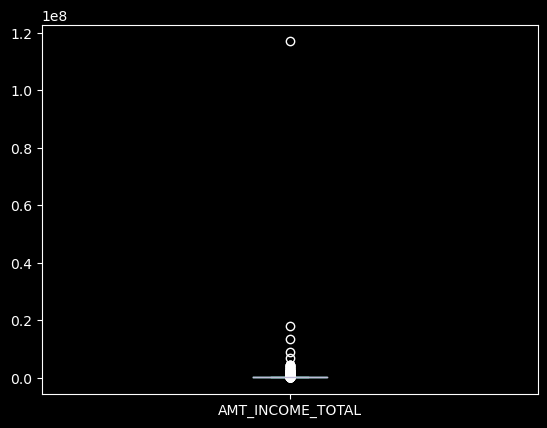

In [135]:
#inspecting AMT_INCOME_TOTAL
print("Let's remove this outlier since this cannot be the income.")
inp.AMT_INCOME_TOTAL.plot.box()
plt.show() 

In [136]:
#removing row in which income is greater than 10crores because this is not correct. most probably a data entry error.
inp = inp[~(inp.AMT_INCOME_TOTAL>100000000)]

In [137]:
#converting income to lakhs for easy analysis
inp.AMT_INCOME_TOTAL = inp.AMT_INCOME_TOTAL.apply(lambda x: round(x/100000, 2))

In [138]:
#checking percentile of annual income
inp.AMT_INCOME_TOTAL.quantile([0,0.1,0.2,0.3,0.5,0.7,0.9,0.99,0.999])

0.000    0.26
0.100    0.81
0.200    0.99
0.300    1.12
0.500    1.47
0.700    1.80
0.900    2.70
0.990    4.72
0.999    9.00
Name: AMT_INCOME_TOTAL, dtype: float64

- 99% of applicants have income less than 5 lakhs.

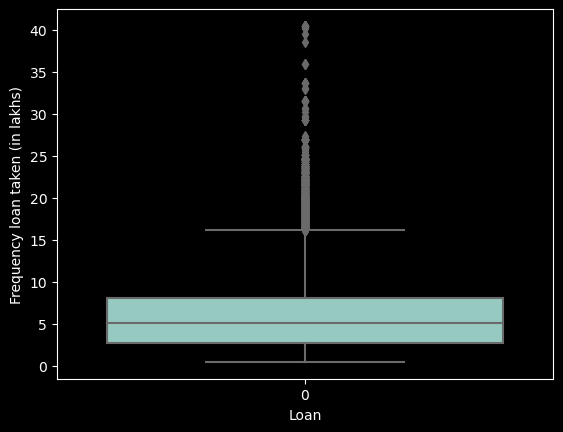

Few applicants have a loan of almost 40lakhs and above, this is possible as they may be taking home loan.


In [139]:
#let's convert credit to lakhs first
inp.AMT_CREDIT = inp.AMT_CREDIT.apply(lambda x: round(x/100000, 2))
sns.boxplot(inp.AMT_CREDIT)
plt.xlabel('Loan')
plt.ylabel('Frequency loan taken (in lakhs)')
plt.show()
print("Few applicants have a loan of almost 40lakhs and above, this is possible as they may be taking home loan.") 

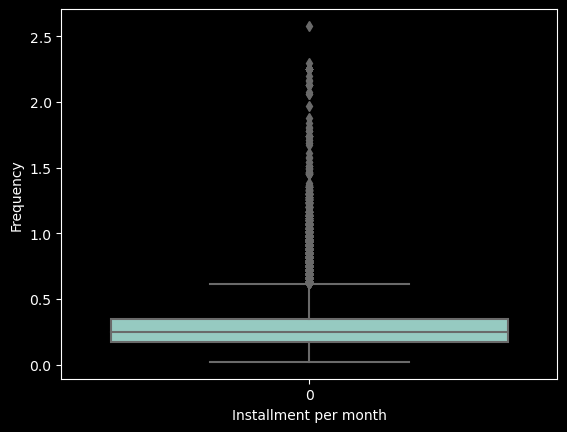

In [140]:
#since i have converted loan amount to lakhs, i need to convert annuity to lakhs as well for analysing and comparing correctly
inp.AMT_ANNUITY = inp.AMT_ANNUITY.apply(lambda x: round(x/100000,2)) 
sns.boxplot(inp.AMT_ANNUITY)
plt.xlabel('Installment per month')
plt.ylabel('Frequency')
plt.show()

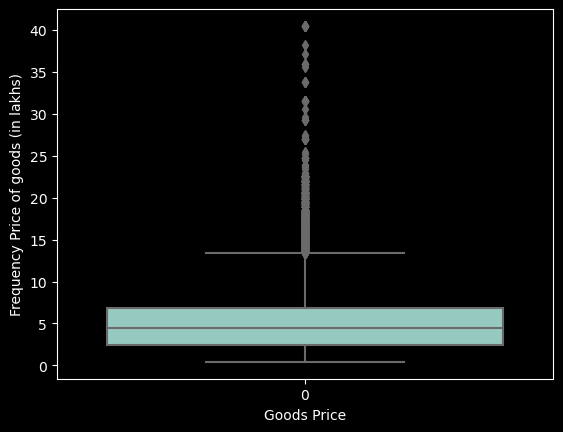

In [141]:
#need to convert this column to lakhs as well. 
inp.AMT_GOODS_PRICE = inp.AMT_GOODS_PRICE.apply(lambda x: round(x/100000, 2))
#plotting box plot to check outliers 
sns.boxplot(inp.AMT_GOODS_PRICE)
plt.xlabel('Goods Price')
plt.ylabel('Frequency Price of goods (in lakhs)')
plt.show()

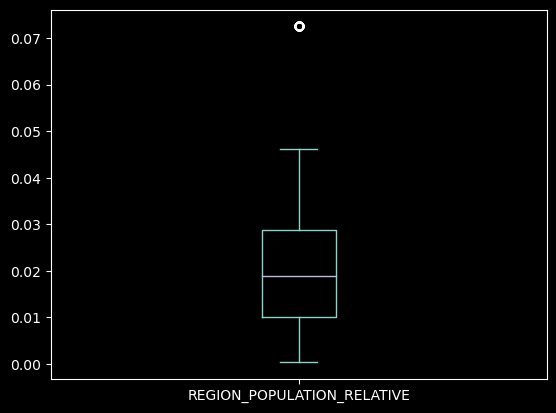

In [142]:
#checking outliers in region population column.
inp.REGION_POPULATION_RELATIVE.plot.box()
plt.show() 

In [143]:
#let's check no. of values greater than 0.07 in population column 
print("There are 8000 people living in highly populated area. This is possible, so let's not drop or edit these. ")
inp.REGION_POPULATION_RELATIVE[inp.REGION_POPULATION_RELATIVE>0.07].value_counts() 

There are 8000 people living in highly populated area. This is possible, so let's not drop or edit these. 


REGION_POPULATION_RELATIVE
0.072508    8411
Name: count, dtype: int64

- In days_birth column, all the values are negative. To calculate age let's convert to positive and then convert it to years. 

In [144]:
#converting age to years. 
inp.DAYS_BIRTH = inp.DAYS_BIRTH.apply(lambda x: (x*-1)//365)
inp.rename(columns={'DAYS_BIRTH':'Age'}, inplace=True) 

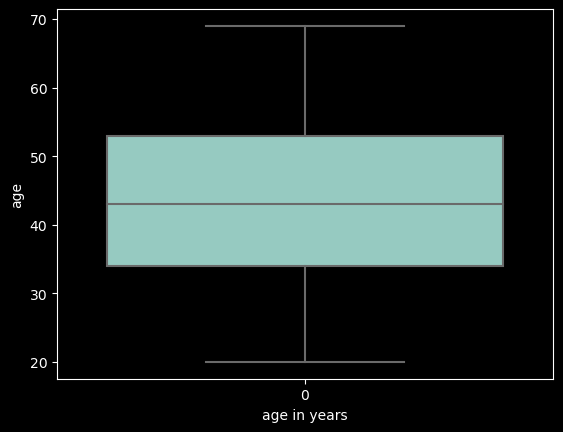

In [145]:
#checking ouliers in age #no outliers
sns.boxplot(inp.Age)
plt.xlabel('age in years')
plt.ylabel('age')
plt.show()

In [146]:
#this column tells us when was the last time applicant changed his registration. let's fix this column
inp.DAYS_REGISTRATION.describe()

count    307492.000000
mean      -4986.131382
std        3522.863023
min      -24672.000000
25%       -7479.000000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [147]:
#converting to positive years. 
inp.DAYS_REGISTRATION = inp.DAYS_REGISTRATION.apply(lambda x: (x*-1)//365 if x<0 else x)
inp.rename(columns={'DAYS_REGISTRATION': 'Registration_Last_Updated'}, inplace=True)
inp.Registration_Last_Updated.describe() 

count    307492.000000
mean         13.168717
std           9.646784
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: Registration_Last_Updated, dtype: float64

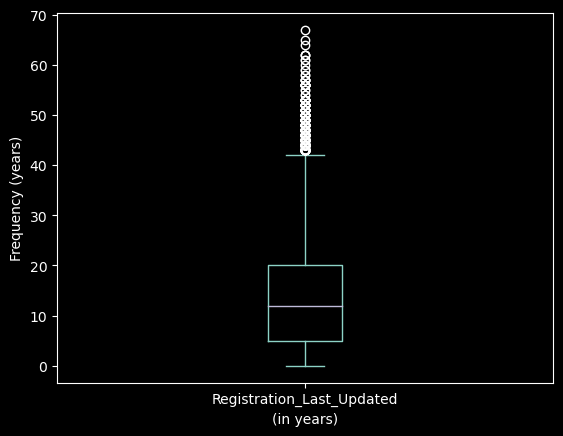

In [148]:
#plotting box plot to see outliers
inp.Registration_Last_Updated.plot.box()
plt.xlabel('(in years)')
plt.ylabel('Frequency (years)')
plt.show()
#outliers in the range of 40-70 years. 

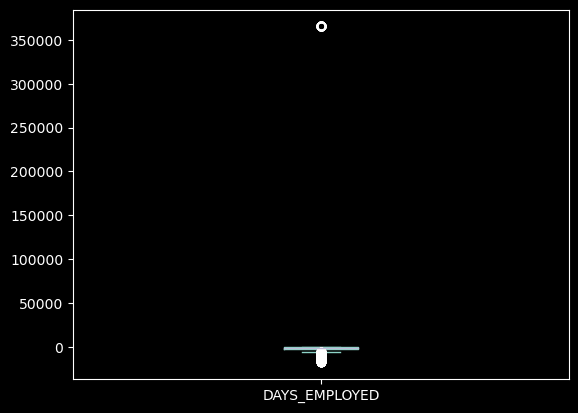

In [149]:
#plotting box plot to see outliers in DAYS_Employed column
inp.DAYS_EMPLOYED.plot.box()
plt.show()

In [150]:
#checking how many values are greater than 0
inp.DAYS_EMPLOYED[inp.DAYS_EMPLOYED>0].value_counts() 

DAYS_EMPLOYED
365243    55374
Name: count, dtype: int64

- except for 2 people all are of null values that i replaced earlier with 'others'. meaning all these '1000 yr of work exp values' have occupation type as null as well

- let's impute wrong work experience as null.

In [151]:
#there are 55374 values with days_employed which is work experience of 365243days or close to 1000 years. Let's inspect
inp.OCCUPATION_TYPE[inp.DAYS_EMPLOYED>0].value_counts()

OCCUPATION_TYPE
others            55372
Cleaning staff        2
Name: count, dtype: int64

In [152]:
#let's impute these wrong work exp as null first
inp.DAYS_EMPLOYED = inp.DAYS_EMPLOYED.apply(lambda x: np.nan if x>0 else x) 

In [153]:
#now let's convert rest to positive years
inp.DAYS_EMPLOYED = inp.DAYS_EMPLOYED.apply(lambda x: (x*-1)//365)
inp.rename(columns={'DAYS_EMPLOYED':'Work_Experience'},inplace=True) 
inp.Work_Experience.describe() 

count    252118.000000
mean          6.037006
std           6.416127
min           0.000000
25%           2.000000
50%           4.000000
75%           8.000000
max          49.000000
Name: Work_Experience, dtype: float64

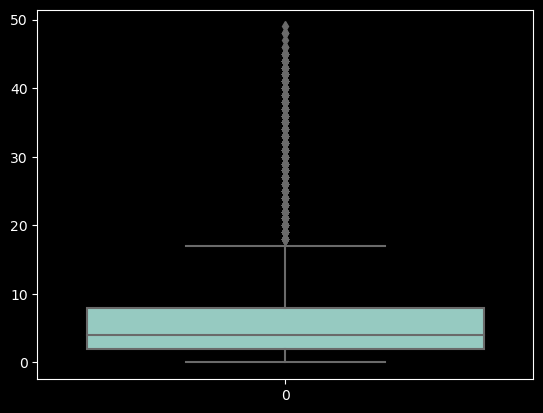

In [154]:
#there are people with 20-50 years as work experience but all these values are outliers. 
#it is very unlikely for work exp to be this high in our dataset. maybe these are people who started working at a very young age
sns.boxplot(inp.Work_Experience) 
plt.show()  

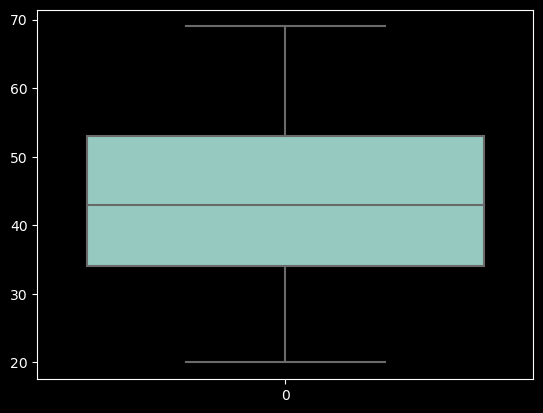

In [155]:
#checking for outliers in age column
sns.boxplot(inp.Age)
plt.show()

In [156]:
#this is a categorical column let's add this to cat_cols column
inp.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business_Entity        84522
Unknown                72055
Self-employed          38409
Trade                  14315
Industry               14310
Medicine               11191
Government             10403
Transport               8990
School                  8893
Kindergarten            6879
Construction            6721
Security                3246
Housing                 2958
Military                2634
Bank                    2507
Agriculture             2454
Police                  2341
Postal                  2157
Security Ministries     1974
Restaurant              1811
Services                1575
University              1327
Hotel                    966
Electricity              950
Insurance                596
Telecom                  577
Emergency                560
Advertising              429
Realtor                  396
Culture                  379
Mobile                   317
Legal Services           305
Cleaning                 260
Religion                 

In [157]:
#updating cat_cols(categorical) and num_cols(numerical)
cat_cols = []
num_cols = []
for i in inp.columns:
    if inp[i].nunique()>34:
        num_cols.append(i)
    else:
        cat_cols.append(i)

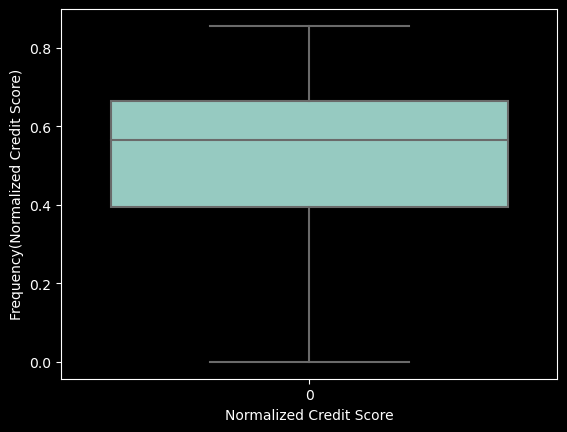

In [158]:
#checking outliers in external_source_code
sns.boxplot(inp.EXT_SOURCE_2)
plt.xlabel('Normalized Credit Score')
plt.ylabel('Frequency(Normalized Credit Score)')
plt.show()

In [159]:
#DAYS_ID_PUBLISH column is irrelevant. let's drop it.
inp.DAYS_ID_PUBLISH.value_counts()

DAYS_ID_PUBLISH
-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
        ... 
-5896      1
-5921      1
-5753      1
-5960      1
-6211      1
Name: count, Length: 6168, dtype: int64

In [160]:
#dropping days_id_publish
inp.drop(columns='DAYS_ID_PUBLISH', inplace=True)
inp.shape

(307492, 37)

In [161]:
#'DAYS_LAST_PHONE_CHANGE' is also not relevant for our analysis on whether a person will default or not.
inp.DAYS_LAST_PHONE_CHANGE.value_counts() 

DAYS_LAST_PHONE_CHANGE
 0.0       37671
-1.0        2812
-2.0        2317
-3.0        1763
-4.0        1285
           ...  
-4051.0        1
-3593.0        1
-3622.0        1
-3570.0        1
-3538.0        1
Name: count, Length: 3773, dtype: int64

In [162]:
#dropping this col as well
inp.drop('DAYS_LAST_PHONE_CHANGE', axis=1, inplace=True)
inp.shape 

(307492, 36)

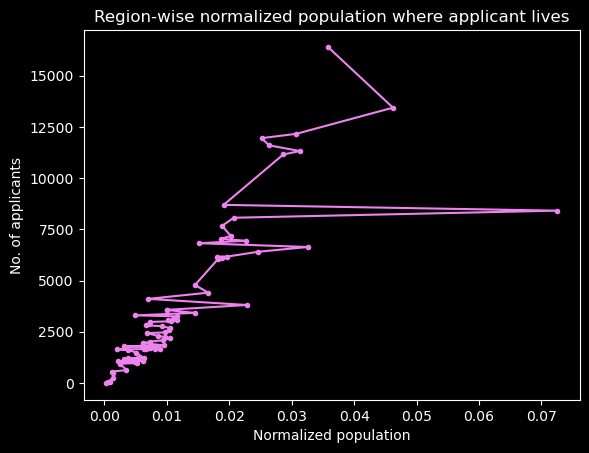

We have around 8000 applicants living in highly populated area (normalized score=0.07)
whereas rest of applicants lives in low to medium populated ranging from 0.00-0.05


In [163]:
#plotting line chart to see trend of applicant's region population
plt.style.use("dark_background")
inp.REGION_POPULATION_RELATIVE.value_counts().plot(color= 'violet',marker='.')
plt.xlabel("Normalized population")
plt.ylabel("No. of applicants")
plt.title("Region-wise normalized population where applicant lives")
plt.show()

print("We have around 8000 applicants living in highly populated area (normalized score=0.07)\nwhereas rest of applicants lives in low to medium populated ranging from 0.00-0.05")

## Let's understand and clean previous appl data

In [164]:
#checking head of dataset
prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [165]:
#checking shape
prev.shape

(1670214, 37)

In [166]:
#checking nulls in previous applications dataset
prev.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [167]:
#decribing numerical cils
prev.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [168]:
#checking for duplicates. #no duplicates
prev.duplicated().sum()

0

In [169]:
#dropping columns with more than 40% null and printing new shape
col_to_rm = []
for i in prev.columns:
    if prev[i].isna().mean() >= 0.40:
        col_to_rm.append(i)
prev.drop(columns=col_to_rm, inplace=True)
prev.shape 

(1670214, 26)

- let's inspect each and every column one by one and clean and manipulate simultaneously

In [170]:
#printing all column names
prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [171]:
#let's drop this column. not needed. I only need current id of applicant to merge these dataframes
#dropping previous ids of applicant's column
prev.drop('SK_ID_PREV', axis=1, inplace=True)

In [172]:
print("XNA are probably null values. let's convert them to nulls")
prev.NAME_CONTRACT_TYPE.value_counts()

XNA are probably null values. let's convert them to nulls


NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64

- Before converting them to nulls, let's check for all cols, there may be more xna in categorical cols.

In [173]:
#let me just filter for first 10 unique values to get an overview of value_counts.
for i in prev.columns:
    print(prev[i].value_counts().head(10), '\n')

SK_ID_CURR
187868    77
265681    73
173680    72
242412    68
206783    67
156367    66
389950    64
382179    64
198355    63
345161    62
Name: count, dtype: int64 

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64 

AMT_ANNUITY
2250.0     31865
11250.0    13974
6750.0     13442
9000.0     12496
22500.0    11903
4500.0     10597
13500.0     7171
3375.0      4806
7875.0      4674
38250.0     4129
Name: count, dtype: int64 

AMT_APPLICATION
0.0         392402
45000.0      47831
225000.0     43543
135000.0     40678
450000.0     38905
90000.0      29367
180000.0     24738
270000.0     20573
675000.0     20227
67500.0      16861
Name: count, dtype: int64 

AMT_CREDIT
0.0         336768
45000.0      35051
225000.0     21094
450000.0     19954
135000.0     18720
180000.0     17085
90000.0      13781
270000.0      9842
900000.0      7432
67500.0       7245
Name: count, dtype: int64 

AMT_GOO

#### I was right. There are so many columns with XNA as a category which is nothing but null values. Also, I found few columns have XAP(no meaning) also. That also seems like nulls. Let's just convert them to nulls and then check again if there any duplicates in out dataframe. 

In [174]:
#replacing 'XNA' and 'XAP' from whole dataset with np.nan. 
prev.replace(['XNA', 'XAP'], np.nan, inplace=True)

In [175]:
#since we have removed all XNA and XAP successfully. let's check for duplicated once again in our dataframe
prev.duplicated().sum()

57887

- so many duplicated rows. let's drop these rows asap. i will keep the first occurance of these rows just in case.

In [176]:
#dropping duplicates but keeping the first occurance of those duplicates. 
prev.drop_duplicates(keep='first', inplace = True)

In [177]:
#cheking shape
prev.shape

(1612327, 25)

- let's write a code where i can see the percentage of null vals in each column. 

In [178]:
for i in prev.columns:
    print('{}:'.format(i), round(100*prev[i].isna().sum()/prev.shape[0], 2),'\n')

SK_ID_CURR: 0.0 

NAME_CONTRACT_TYPE: 0.02 

AMT_ANNUITY: 19.84 

AMT_APPLICATION: 0.0 

AMT_CREDIT: 0.0 

AMT_GOODS_PRICE: 20.71 

WEEKDAY_APPR_PROCESS_START: 0.0 

HOUR_APPR_PROCESS_START: 0.0 

FLAG_LAST_APPL_PER_CONTRACT: 0.0 

NFLAG_LAST_APPL_IN_DAY: 0.0 

NAME_CASH_LOAN_PURPOSE: 95.7 

NAME_CONTRACT_STATUS: 0.0 

DAYS_DECISION: 0.0 

NAME_PAYMENT_TYPE: 35.61 

CODE_REJECT_REASON: 81.17 

NAME_CLIENT_TYPE: 0.11 

NAME_GOODS_CATEGORY: 55.53 

NAME_PORTFOLIO: 19.84 

NAME_PRODUCT_TYPE: 62.61 

CHANNEL_TYPE: 0.0 

SELLERPLACE_AREA: 0.0 

NAME_SELLER_INDUSTRY: 49.7 

CNT_PAYMENT: 19.84 

NAME_YIELD_GROUP: 28.75 

PRODUCT_COMBINATION: 0.02 



- since i removed XNA, XAP from dataset, many column's null values have increased. let's drop the columns whose null values are more than 40%. 

In [179]:
#writing a function to store cols with high percentage of nulls
col_to_rm2 = []
for i in prev.columns:
    if prev[i].isna().mean()>0.40:
        col_to_rm2.append(i)
print(col_to_rm2)

['NAME_CASH_LOAN_PURPOSE', 'CODE_REJECT_REASON', 'NAME_GOODS_CATEGORY', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY']


- code_reject_reason values are not missing at random i think. Since very few loans are rejected by banks, that's why there are so many nulls in this column. let's not drop this one. 

In [180]:
#excluding CODE_REJECT_REASON column from drop list
col_to_rm2.pop(1)

'CODE_REJECT_REASON'

In [181]:
#rechecking columns to drop list
col_to_rm2

['NAME_CASH_LOAN_PURPOSE',
 'NAME_GOODS_CATEGORY',
 'NAME_PRODUCT_TYPE',
 'NAME_SELLER_INDUSTRY']

In [182]:
#let's drop these cols now
prev.drop(columns=col_to_rm2, inplace=True) 

In [183]:
#checking shape
prev.shape

(1612327, 21)

In [184]:
#let's seggregate category and numerical cols of previous applications dataframe
prev_cat_cols = []
prev_num_cols = []
for i in prev.columns:
    if prev[i].nunique()<30:
        prev_cat_cols.append(i)
    else:
        prev_num_cols.append(i)
print(prev_cat_cols,'\n\n', prev_num_cols)

['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'] 

 ['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT']


In [185]:
#cheking nulls 
prev.isnull().sum()

SK_ID_CURR                           0
NAME_CONTRACT_TYPE                 334
AMT_ANNUITY                     319832
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_GOODS_PRICE                 333928
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE               574139
CODE_REJECT_REASON             1308794
NAME_CLIENT_TYPE                  1815
NAME_PORTFOLIO                  319827
CHANNEL_TYPE                         0
SELLERPLACE_AREA                     0
CNT_PAYMENT                     319827
NAME_YIELD_GROUP                463493
PRODUCT_COMBINATION                334
dtype: int64

- AMT_ANNUITY, AMT_GOODS_PRICE,  are numerical columns. let's keep the nulls as they won't influence our analysis. 
- for CODE_REJECT_REASON I already mentioned that there are very few loans rejected by banks and hence so many nulls. let's neither drop this column nor impute these with any other value because those nulls are not MCAR. we can analyse without imputing nulls as well. 
- for NAME_PAYMENT_TYPE, NAME_PORTFOLIO, NAME_YEILD_GROUP, CNT_PAYMENT, nulls are really high in number. Imputing them with mode or median is not the right approach. hence i will leave these nulls as it is as well.


- imputing null in NAME_CONTRACT_TYPE column with mode

In [186]:
#filling null with mode i.e. 'Consumer Loans'
prev.NAME_CONTRACT_TYPE.fillna(prev.NAME_CONTRACT_TYPE.mode()[0], inplace=True) 

- imputing null in PRODUCT_COMBINATION column with mode as well. 

In [187]:
#filling null with mode i.e.
prev.PRODUCT_COMBINATION.fillna(prev.PRODUCT_COMBINATION.mode()[0], inplace=True) 

In [188]:
#there are so many nulls in this column, 5.5lakh nulls almost. imputing all these with mode might not be the right approach.
#let's leave these nulls as it is. 
prev.NAME_PAYMENT_TYPE.isna().sum()

574139

In [189]:
#filling one null value in AMT_CREDIT column with median. 
prev.AMT_CREDIT.fillna(prev.AMT_CREDIT.median(), inplace=True)

In [190]:
#let's impute nulls in NAME_CLIENT_TYPE column with mode
prev.NAME_CLIENT_TYPE.fillna(prev.NAME_CLIENT_TYPE.mode()[0], inplace=True)

- let's check for outliers in previous applications numerical columns

- before checking for outliers let's convert numerical columns to unit lakhs like i did earlier. 

In [191]:
#converting all these to lakhs unit
prev.AMT_ANNUITY = prev.AMT_ANNUITY.apply(lambda x: round(x/100000, 2))
prev.AMT_APPLICATION = prev.AMT_APPLICATION.apply(lambda x: round(x/100000, 2))
prev.AMT_CREDIT = prev.AMT_CREDIT.apply(lambda x: round(x/100000, 2))
prev.AMT_GOODS_PRICE = prev.AMT_GOODS_PRICE.apply(lambda x: round(x/100000, 2)) 

In [192]:
#converting all negative values to positive in days_decision column
prev.DAYS_DECISION = prev.DAYS_DECISION.abs()

In [193]:
prev.SELLERPLACE_AREA.describe() 

count    1.612327e+06
mean     3.237616e+02
std      7.253327e+03
min     -1.000000e+00
25%     -1.000000e+00
50%      5.000000e+00
75%      9.300000e+01
max      4.000000e+06
Name: SELLERPLACE_AREA, dtype: float64

In [194]:
#dropping sellerplace column since it is not needed for our analysis
prev.drop('SELLERPLACE_AREA', axis=1, inplace=True)

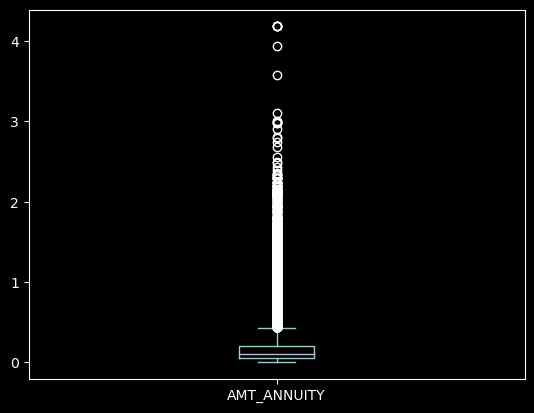

In [195]:
#now checking outliers in AMT_ANNUITY_COLUMN
prev.AMT_ANNUITY.plot.box()
plt.show()

In [196]:
#checking how many values are above 400,000 as monthly installment
prev[prev.AMT_ANNUITY>=4]

SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
79406       406936         Cash loans         4.18             22.5   
516560      238970         Cash loans         4.18             22.5   
557857      327696         Cash loans         4.18             22.5   
911948      365299         Cash loans         4.18             22.5   

        AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
79406        23.69             22.5                  WEDNESDAY   
516560       23.69             22.5                     FRIDAY   
557857       23.69             22.5                    TUESDAY   
911948       23.69             22.5                     MONDAY   

        HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
79406                        15                           Y   
516560                       11                           Y   
557857                       18                           Y   
911948                       10                           Y   

        NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  DAYS_DECISION  \
79406                        1              Refused           1639   
516560                       1              Refused           1399   
557857                       1              Refused           1344   
911948                       1              Refused           1554   

            NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
79406   Cash through the bank                 HC         Repeater   
516560  Cash through the bank                 HC         Repeater   
557857  Cash through the bank                 HC         Repeater   
911948  Cash through the bank                 HC         Repeater   

       NAME_PORTFOLIO             CHANNEL_TYPE  CNT_PAYMENT NAME_YIELD_GROUP  \
79406            Cash  Credit and cash offices          6.0       low_action   
516560           Cash  Credit and cash offices          6.0       low_action   
557857           Cash  Credit and cash offices          6.0       low_action   
911948           Cash  Credit and cash offices          6.0       low_action   

       PRODUCT_COMBINATION  
79406     Cash Street: low  
516560    Cash Street: low  
557857    Cash Street: low  
911948    Cash Street: low

- all these applicants are having same credit amount as in previous application and all of them have same credit in this one
- all of them are having almost same annuity and all of them got rejected for loan in their previous applications
- all of these values look suspicious, let's drop these four rows.

In [197]:
#excluding these 4 applicants having monthly installment of more than 4lakhs. 
prev = prev[~(prev.AMT_ANNUITY>4)]

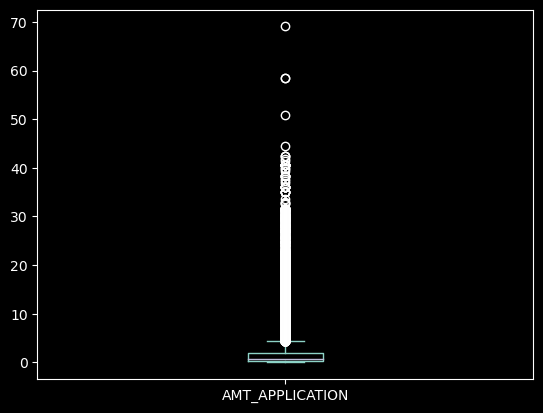

In [198]:
#checking outliers in AMT_APPLICATION column
prev.AMT_APPLICATION.plot.box()
plt.show()

In [199]:
#checking for amt_application more than 50lakhs
prev[prev.AMT_APPLICATION>50]
#let's drop these rows with outliers since the values are really high and will influence our analysis.
#also only 4 rows out of 16lakh are having such high values and influencing statistical calculation, so it's best to drop them

SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
779304       412009     Consumer loans          NaN            69.05   
1058067      346243     Consumer loans         1.03            58.50   
1163698      346243     Consumer loans         1.14            58.50   
1348406      324681     Consumer loans         0.84            50.85   

         AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
779304        69.05            69.05                     FRIDAY   
1058067       40.95            58.50                  WEDNESDAY   
1163698       45.10            58.50                   THURSDAY   
1348406       30.51            50.85                   THURSDAY   

         HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
779304                        19                           Y   
1058067                       11                           Y   
1163698                       13                           Y   
1348406                       12                           Y   

         NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  DAYS_DECISION  \
779304                        1              Refused           2224   
1058067                       1             Approved           2475   
1163698                       1             Approved           2474   
1348406                       1             Approved           2629   

             NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
779304   Cash through the bank                 HC              New   
1058067  Cash through the bank                NaN              New   
1163698  Cash through the bank                NaN              New   
1348406                    NaN                NaN              New   

        NAME_PORTFOLIO  CHANNEL_TYPE  CNT_PAYMENT NAME_YIELD_GROUP  \
779304             NaN  Country-wide          NaN              NaN   
1058067           Cars    Car dealer         60.0       low_action   
1163698           Cars    Car dealer         60.0       low_action   
1348406           Cars    Car dealer         72.0       low_normal   

                 PRODUCT_COMBINATION  
779304   POS household with interest  
1058067   POS industry with interest  
1163698   POS industry with interest  
1348406   POS industry with interest

In [200]:
#removing these four rows from our prev df. 
prev = prev[~(prev.AMT_APPLICATION>50)]

In [201]:
#checking shape
prev.shape

(1612319, 20)

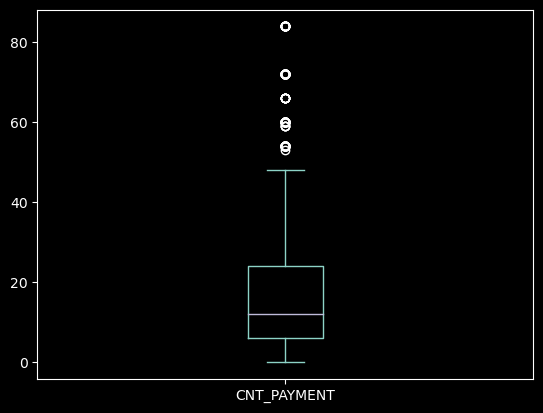

In [202]:
prev.CNT_PAYMENT.plot.box()
plt.show()

In [203]:
#let's cap CNT_PAYMENT for 50years max. since term of loan greater than 50 years is very rare.
prev.CNT_PAYMENT = prev.CNT_PAYMENT.apply(lambda x: 50 if x>50 else x) 

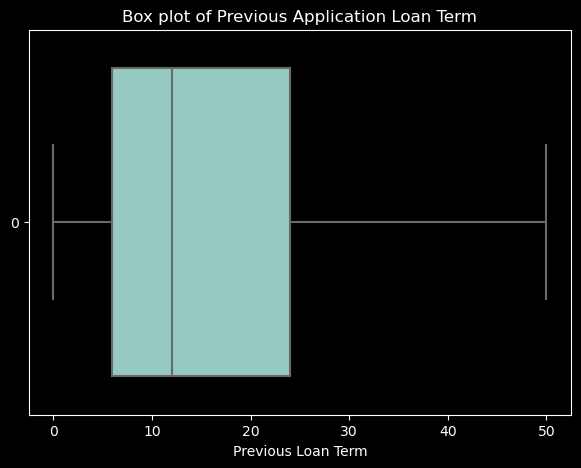

In [204]:
#let's recheck OUTLIERS to confirm
plt.figure(figsize=(7,5))
sns.boxplot(prev.CNT_PAYMENT, orient='horizontal')
plt.title('Box plot of Previous Application Loan Term')
plt.xlabel('Previous Loan Term')
plt.show() 

- Cleaning of Previous application dataframe completed

## Analyzing Applications Dataframe

I will be analyzing based on good and bad loans.
- Good Loans - Where applicant is paying all the installments on time. Target = 0
- Bad Loans - Where applicant has not paid few installments and is likely to default. Target = 1

In some places, I have used term defaulter and non-defaulter.
- Non-Defaulter - Where applicant is paying all the installments on time. Target = 0
- Defaulter - Where applicant has not paid few installments and is likely to default. Target = 1

#### Creating a new column that tells debt-to-income ratio (annuity per month and income per month) of each applicant. 

In [205]:
#monthly installment divided by monthly income
inp['Debt_to_Income'] = (inp['AMT_ANNUITY']/inp['AMT_INCOME_TOTAL'])*100

In [206]:
#using dark theme for all the graphs
plt.style.use('dark_background')

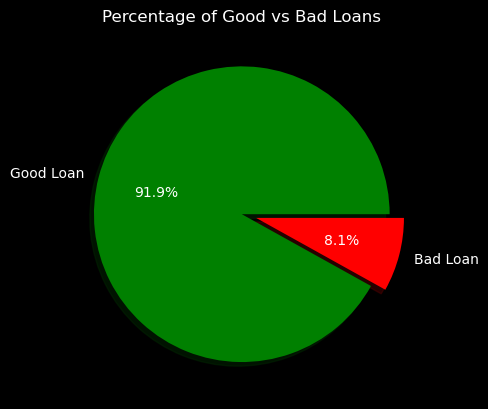

Insight: Percentage of bad loans is only 8%


In [207]:
#let's first check percentage of loans that are bad i.e. targe = 1
labels = ['Good Loan', 'Bad Loan']
plt.pie(inp.TARGET.value_counts(), autopct = "%1.1f%%", labels=labels, colors='gr', shadow=True, explode = [0,0.1])
plt.title("Percentage of Good vs Bad Loans")
plt.show()
print("Insight: Percentage of bad loans is only 8%")

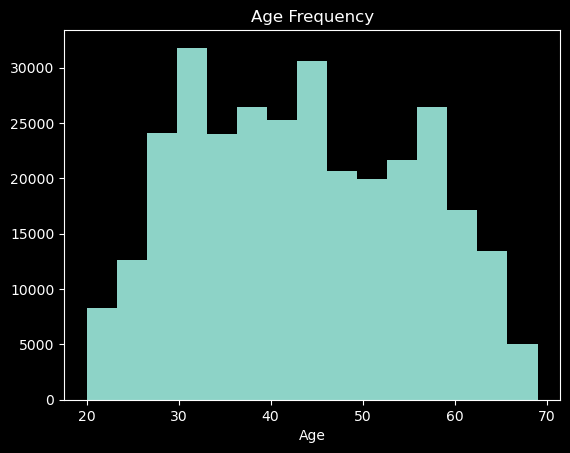

Insight: People from all age groups have applied for loans, there is no pattern as such.
         Around 30,40 and 55 yrs of age we can see most people applying for loans. 


In [208]:
#seeing age distribution of applicants
plt.hist(inp.Age, bins=15)
plt.title("Age Frequency")
plt.xlabel('Age')
plt.show()
print("Insight: People from all age groups have applied for loans, there is no pattern as such.\n         Around 30,40 and 55 yrs of age we can see most people applying for loans. ")

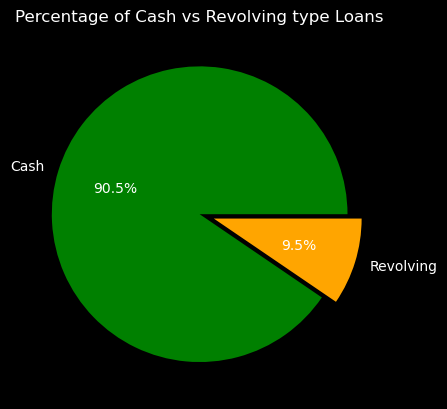

Insight: Around 90% people applied for cash loans and only 10% applied for revolving loans.


In [209]:
#let's see cash vs revolving
plt.style.use("default") 
plt.style.use("dark_background")
labels = ['Cash', 'Revolving']
plt.pie(inp.NAME_CONTRACT_TYPE.value_counts(), labels=labels, autopct="%1.1f%%", 
        colors=['green', 'orange'], explode=[0,0.1])
plt.title('Percentage of Cash vs Revolving type Loans')
plt.show()
print("Insight: Around 90% people applied for cash loans and only 10% applied for revolving loans.")

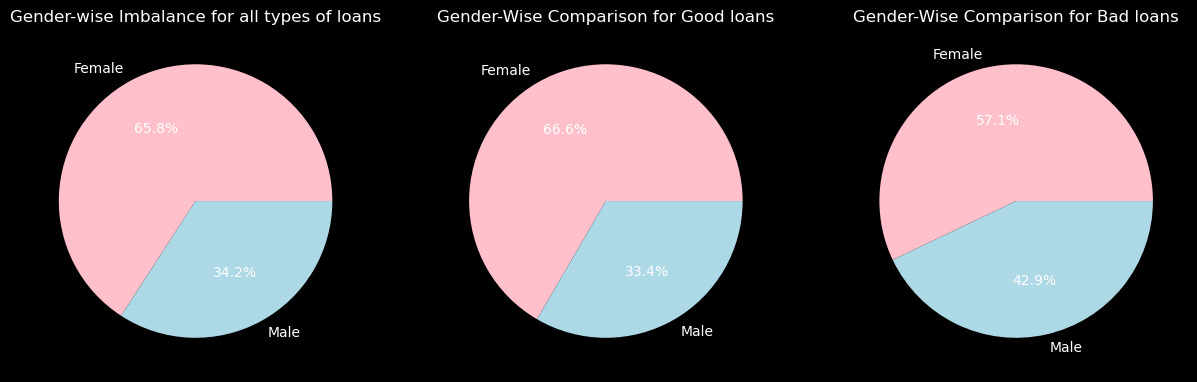

Insight: We have gender imbalance in our data.
There are clearly more female applicants and hence for both good and bad loans, there is more percentage of females.
But, one thing to note here is that even though we have more females, still in bad loans we have almost 43% of males.
Which means males are more likely to default than females.


In [210]:
#let's see gender wise loans and also see gender wise bad loans
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
labels = ['Female', 'Male']
plt.pie(inp.CODE_GENDER.value_counts(), autopct="%1.1f%%", labels=labels, colors = ['pink', 'lightblue'])
plt.title('Gender-wise Imbalance for all types of loans')

plt.subplot(1,3,2)
plt.pie(inp.CODE_GENDER[inp.TARGET==0].value_counts(), autopct="%1.1f%%", labels= labels, colors=['pink','lightblue'])
plt.title('Gender-Wise Comparison for Good loans')

plt.subplot(1,3,3)
plt.pie(inp.CODE_GENDER[inp.TARGET==1].value_counts(), autopct="%1.1f%%", labels=labels, colors=['pink','lightblue'])
plt.title('Gender-Wise Comparison for Bad loans')
plt.show()


print("Insight: We have gender imbalance in our data.\nThere are clearly more female applicants and hence for both good and bad loans, there is more percentage of females.\nBut, one thing to note here is that even though we have more females, still in bad loans we have almost 43% of males.\nWhich means males are more likely to default than females.")

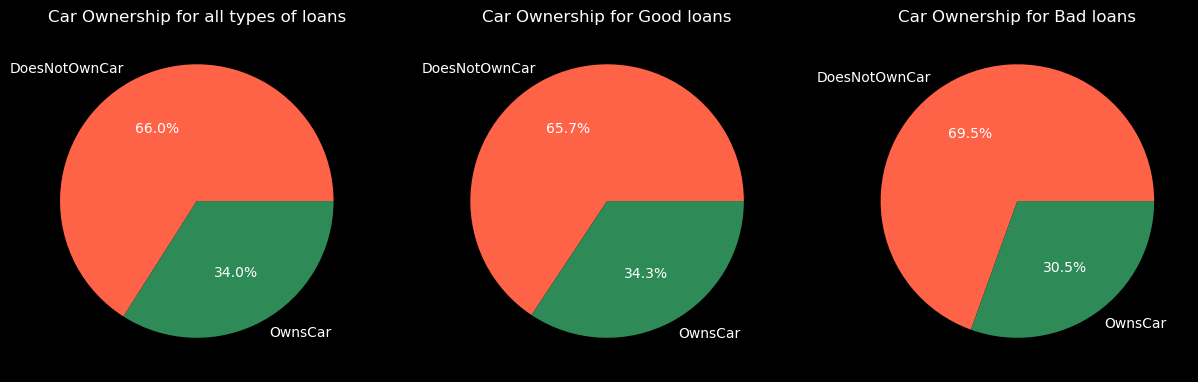

Insight: In all scenarios, 65-70% applicants does not own car.
Clearly ownership of car does not influence much on whether a person will default or not.
Yes, people not owning car are more likely to default but this is because 66% of total applicants does not own car.


In [211]:
#let's see car ownership distribution
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
labels = ['DoesNotOwnCar', 'OwnsCar'] 
plt.pie(inp.FLAG_OWN_CAR.value_counts(), autopct="%1.1f%%", labels=labels, colors = ['tomato', 'seagreen'])
plt.title('Car Ownership for all types of loans')

plt.subplot(1,3,2)
plt.pie(inp.FLAG_OWN_CAR[inp.TARGET==0].value_counts(), autopct="%1.1f%%", labels= labels, colors=['tomato','seagreen'])
plt.title('Car Ownership for Good loans')

plt.subplot(1,3,3)
plt.pie(inp.FLAG_OWN_CAR[inp.TARGET==1].value_counts(), autopct="%1.1f%%", labels=labels, colors=['tomato','seagreen'])
plt.title('Car Ownership for Bad loans')
plt.show()

print("Insight: In all scenarios, 65-70% applicants does not own car.\nClearly ownership of car does not influence much on whether a person will default or not.\nYes, people not owning car are more likely to default but this is because 66% of total applicants does not own car.")

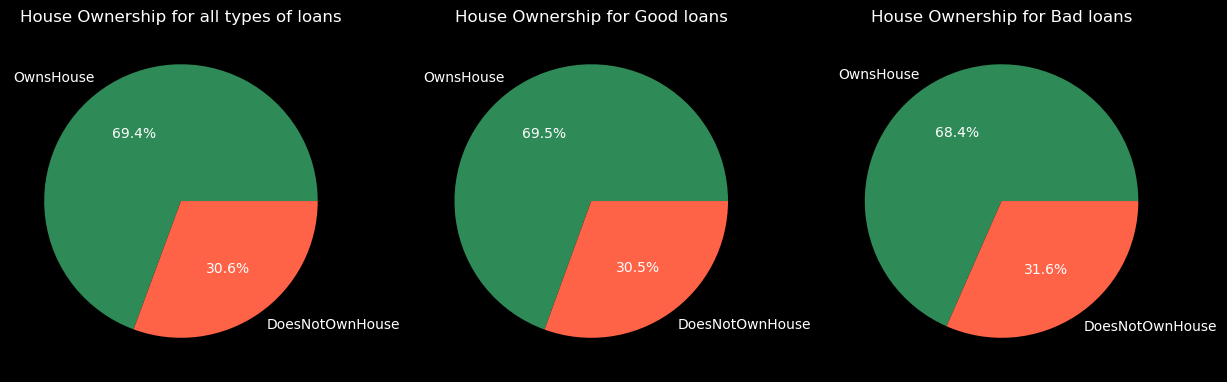

Insight: In all scenarios, 65-70% applicants own house.
Clearly ownership of house also does not influence whether a person will default or not.
Yes, people owning house are less likely to default but this is because 70% of total applicants own house.


In [212]:
#let's do same for house ownership
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
labels = ['OwnsHouse', 'DoesNotOwnHouse'] 
plt.pie(inp.FLAG_OWN_REALTY.value_counts(), autopct="%1.1f%%", labels=labels, colors = ['seagreen', 'tomato'])
plt.title('House Ownership for all types of loans')

plt.subplot(1,3,2)
plt.pie(inp.FLAG_OWN_REALTY[inp.TARGET==0].value_counts(), autopct="%1.1f%%", labels= labels, colors=['seagreen','tomato'])
plt.title('House Ownership for Good loans')

plt.subplot(1,3,3)
plt.pie(inp.FLAG_OWN_REALTY[inp.TARGET==1].value_counts(), autopct="%1.1f%%", labels=labels, colors=['seagreen','tomato'])
plt.title('House Ownership for Bad loans')
plt.show()

print("Insight: In all scenarios, 65-70% applicants own house.\nClearly ownership of house also does not influence whether a person will default or not.\nYes, people owning house are less likely to default but this is because 70% of total applicants own house.")

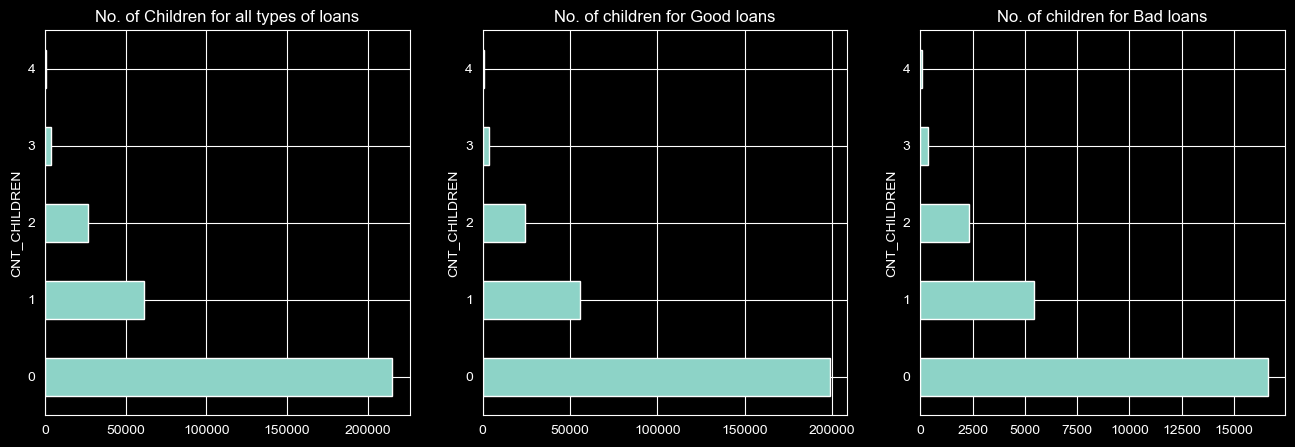

Insight: Once again, in all scenarios number of children applicant has, be it 0 or 4, also does not influence whether a person will default or not.
Reason is simple--> There is imbalance and percentage wise there is not much difference on count of children influencing default.


In [213]:
#let's now check whether having more or less children affect loan payments for an applicant
sns.set_style('whitegrid')
plt.style.use("dark_background")
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
inp.CNT_CHILDREN.value_counts().plot.barh()
plt.title('No. of Children for all types of loans') 

plt.subplot(1,3,2)
inp.CNT_CHILDREN[inp.TARGET==0].value_counts().plot.barh()
plt.title('No. of children for Good loans')

plt.subplot(1,3,3)
inp.CNT_CHILDREN[inp.TARGET==1].value_counts().plot.barh()
plt.title('No. of children for Bad loans')
plt.show() 

print("Insight: Once again, in all scenarios number of children applicant has, be it 0 or 4, also does not influence whether a person will default or not.\nReason is simple--> There is imbalance and percentage wise there is not much difference on count of children influencing default.")

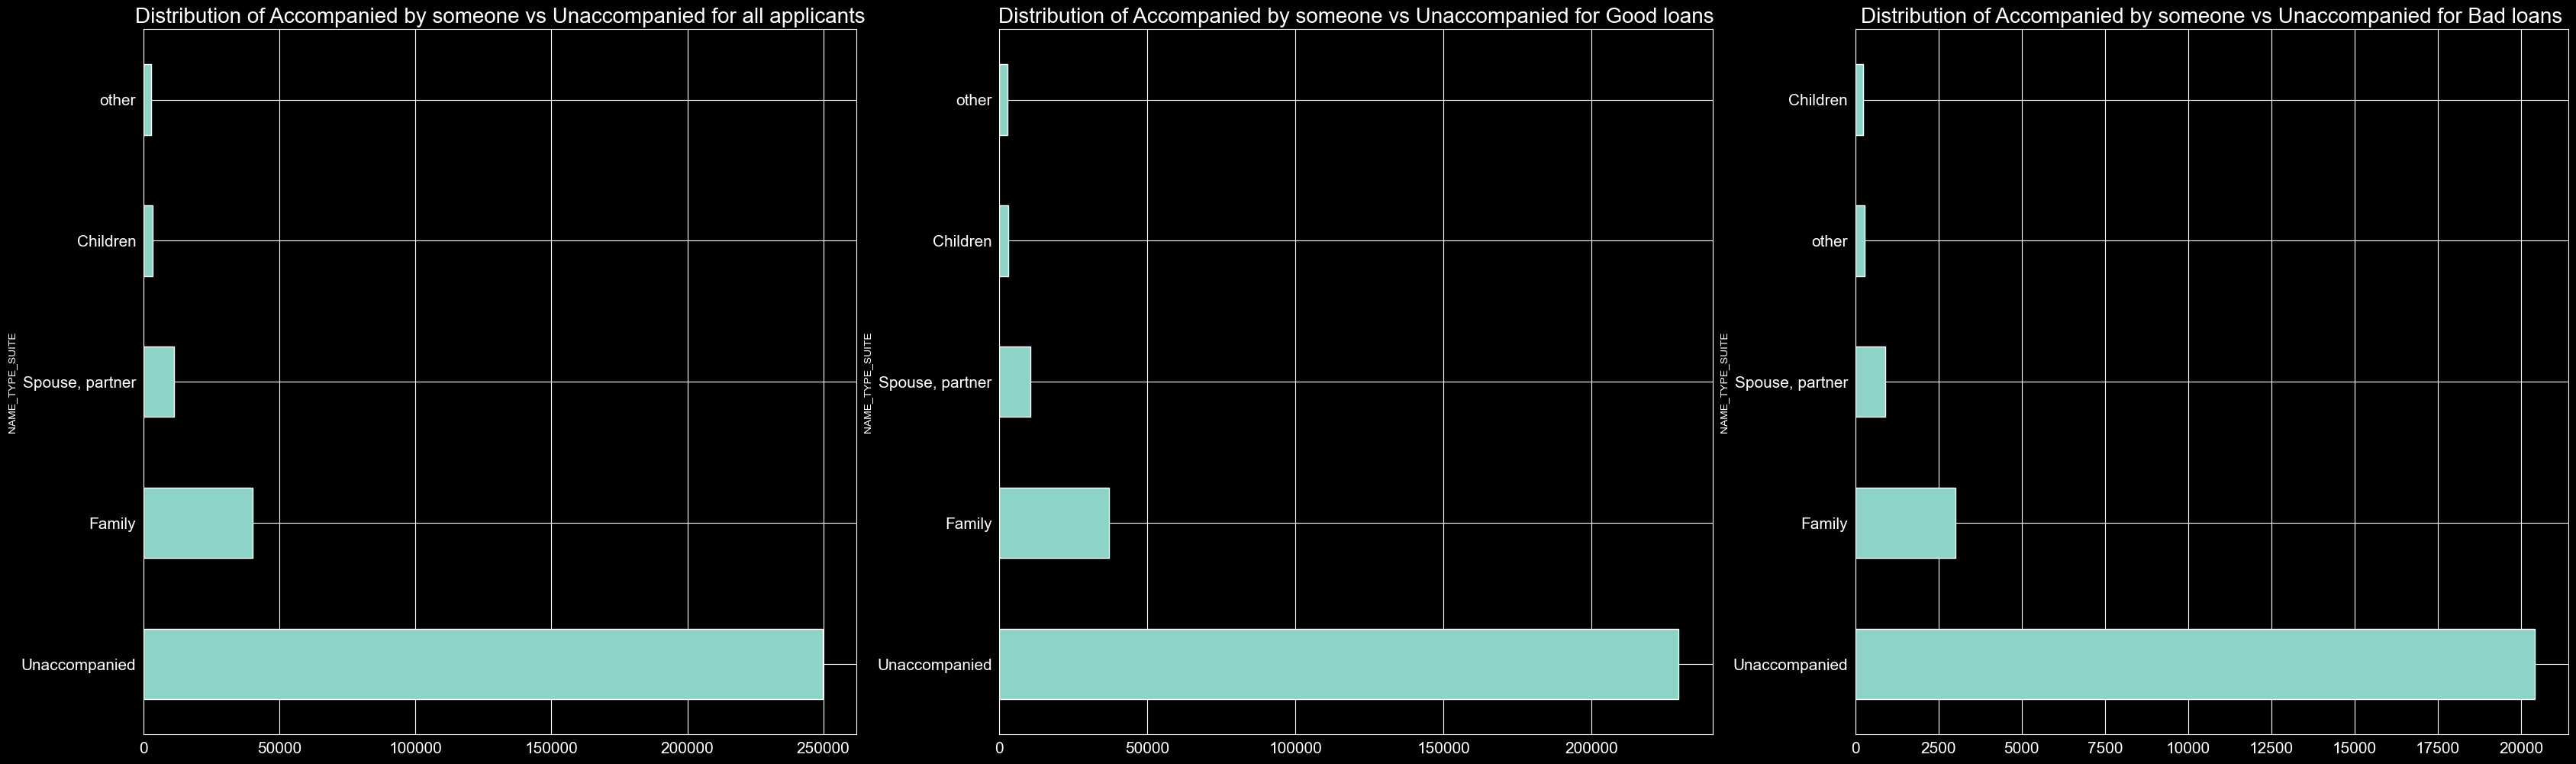

Insight: In all scenarios, whether a person was accompanied or not while filling application, also does not influence whether a person will default or not.
Except if accompanied by children then default rate is least.
Obviously, unaccompanied applicants are most in number when it comes to not paying loan on time.
But, this is simply because most applicants come alone while applying for loan. 


In [214]:
#let's see if there is a influence on defaults by whether a person was accompanied by someone or not while applying for loan. 
sns.set_style("whitegrid")
plt.style.use("dark_background")
plt.figure(figsize=(41,12))

plt.subplot(1,3,1)
inp.NAME_TYPE_SUITE.value_counts().plot.barh()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Distribution of Accompanied by someone vs Unaccompanied for all applicants', fontdict={'size':20}) 

plt.subplot(1,3,2)
inp.NAME_TYPE_SUITE[inp.TARGET==0].value_counts().plot.barh()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Distribution of Accompanied by someone vs Unaccompanied for Good loans', fontdict={'size':20})

plt.subplot(1,3,3)
inp.NAME_TYPE_SUITE[inp.TARGET==1].value_counts().plot.barh()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Distribution of Accompanied by someone vs Unaccompanied for Bad loans', fontdict={'size':20})
plt.show() 

print("Insight: In all scenarios, whether a person was accompanied or not while filling application, also does not influence whether a person will default or not.\nExcept if accompanied by children then default rate is least.")
print("Obviously, unaccompanied applicants are most in number when it comes to not paying loan on time.\nBut, this is simply because most applicants come alone while applying for loan. ")

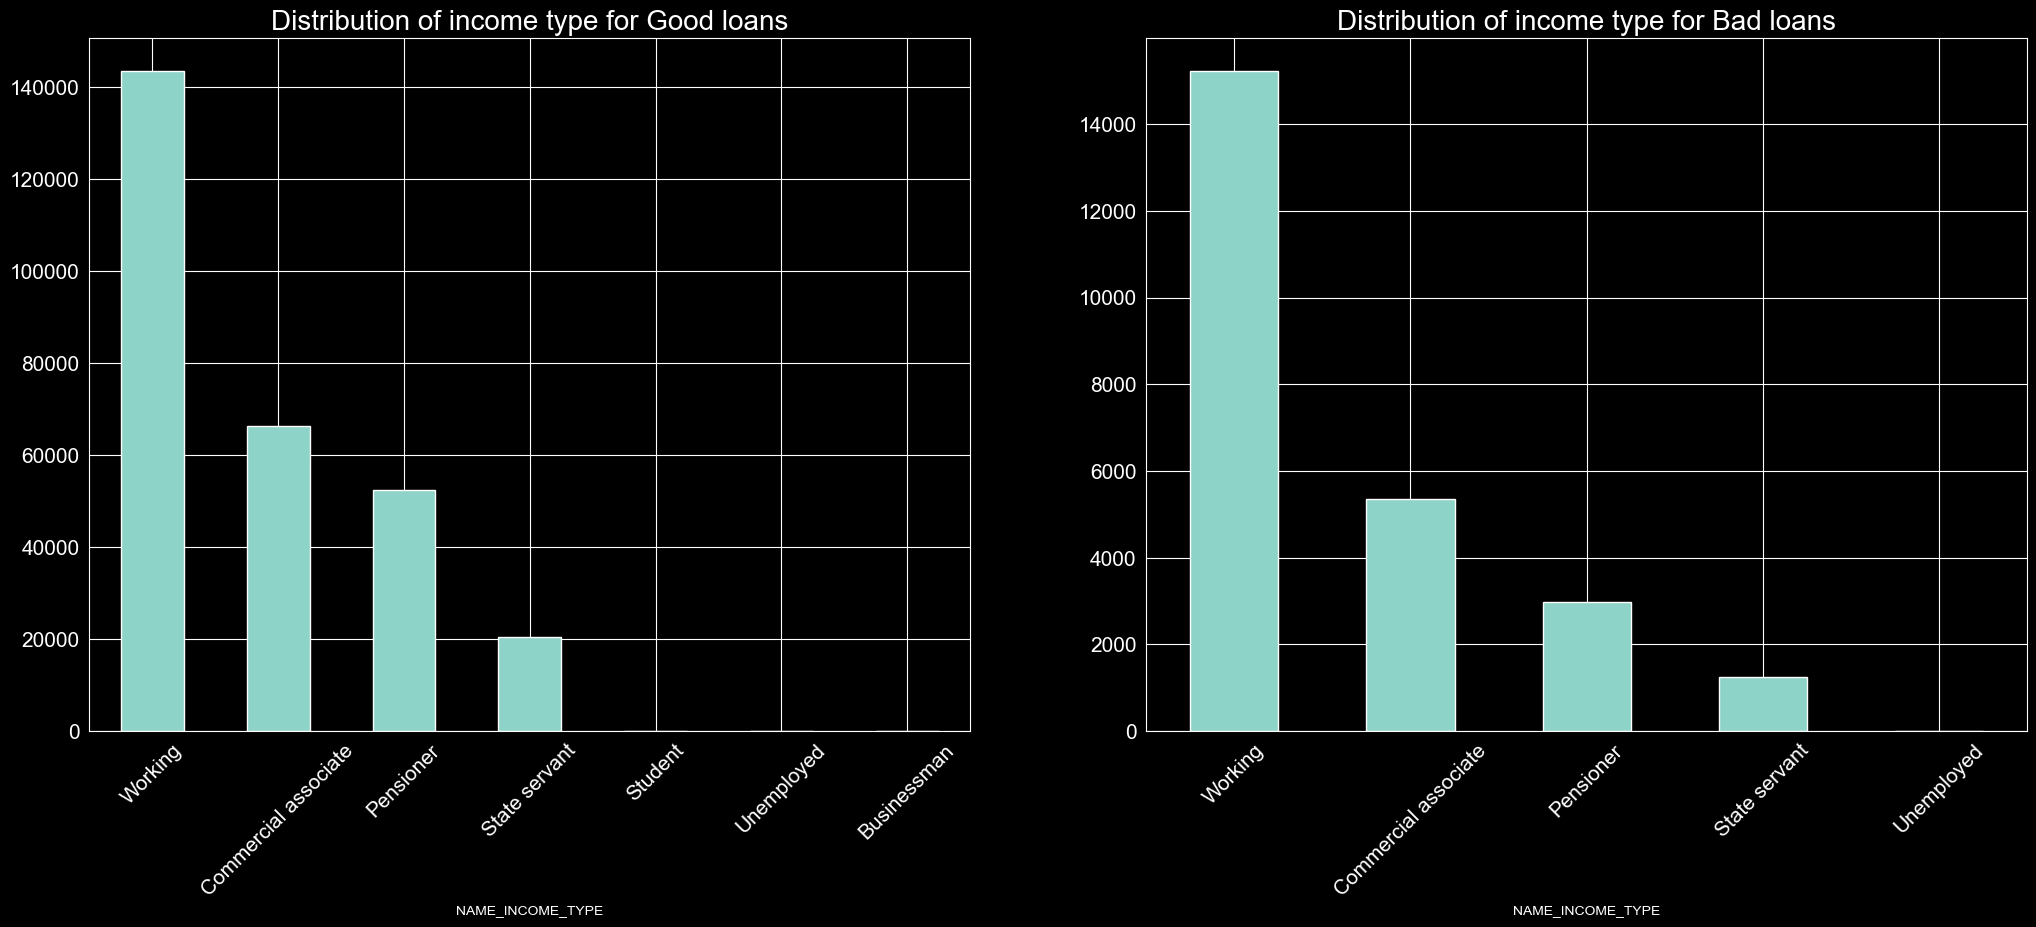

In [215]:
#let's see on the basis of income type
sns.set_style("whitegrid")
plt.style.use("dark_background")
plt.figure(figsize=(25,9))

plt.subplot(1,2,1)
inp.NAME_INCOME_TYPE[inp.TARGET==0].value_counts().plot.bar()
plt.title('Distribution of income type for Good loans', fontdict={"size":20})
plt.xticks(rotation= 45, fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1,2,2)
inp.NAME_INCOME_TYPE[inp.TARGET==1].value_counts().plot.bar()
plt.title('Distribution of income type for Bad loans', fontdict={"size":20})
plt.xticks(rotation= 45, fontsize=15)
plt.yticks(fontsize=15)
plt.show() 

In [216]:
#calculating default percentage of people having different income types
index = inp.NAME_INCOME_TYPE[inp.TARGET==1].value_counts().index
for i in index:
    print('Default percentage of {}-'.format(i), round(inp.NAME_INCOME_TYPE[inp.TARGET==1].value_counts()[i]*100/inp.NAME_INCOME_TYPE.value_counts()[i], 2),'%')

Default percentage of Working- 9.59 %
Default percentage of Commercial associate- 7.48 %
Default percentage of Pensioner- 5.39 %
Default percentage of State servant- 5.76 %
Default percentage of Unemployed- 36.36 %


#### Insight: 
- We have more working class people, hence in absolute terms working class have defaulted the most.
- But in percentage terms unemployed people have defaulted the most.
- No student or businessmen has defaulted.

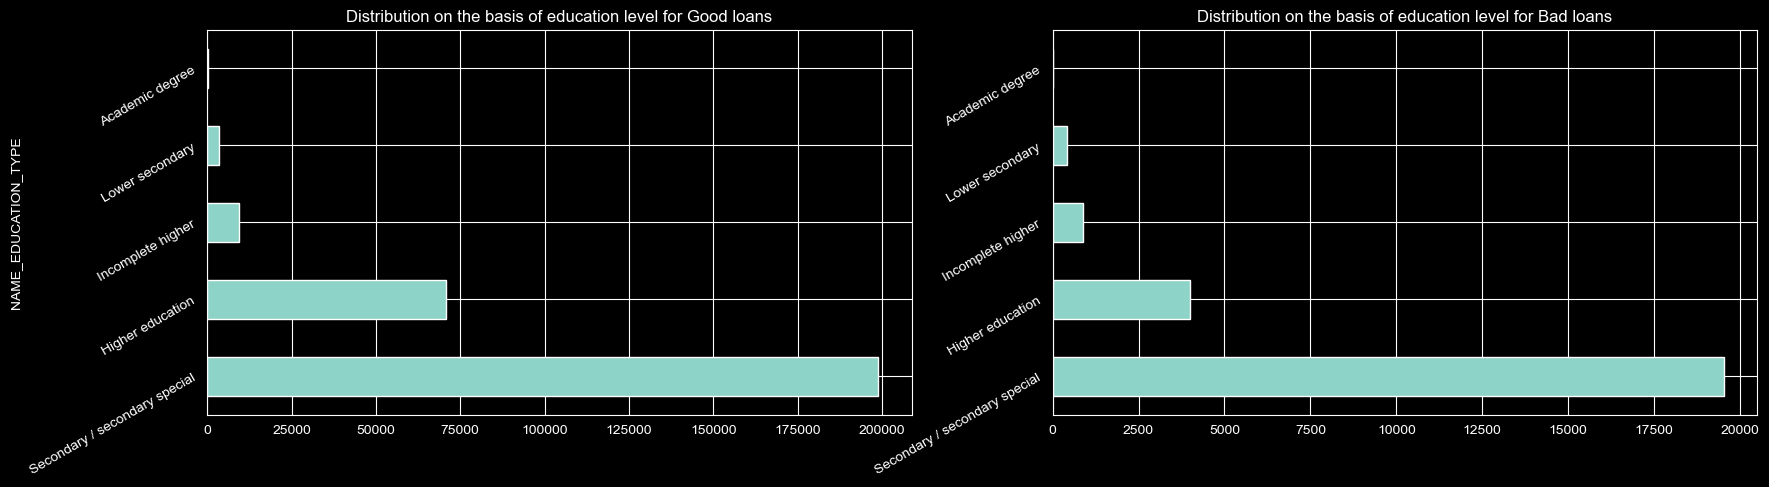

Insight:
If applicant has academic degree, he is least likely to default.
We have only 164 applicants with academic degree and only 3 have defaulted amongst them. That is only 1.8%.
Since, We have more people in our dataset from secondary and less from academic degree.
Because of this imbalance, obviously more chances will be that applicant with secondary education will default. 


In [217]:
#let's see if education has any influence on person defaulting
sns.set_style("whitegrid")
plt.style.use("dark_background")
plt.figure(figsize=(20,5)) 

plt.subplot(1,2,1)
inp.NAME_EDUCATION_TYPE[inp.TARGET==0].value_counts().plot.barh()
plt.title('Distribution on the basis of education level for Good loans')
plt.yticks(rotation = 30)

plt.subplot(1,2,2)
inp.NAME_EDUCATION_TYPE[inp.TARGET==1].value_counts().plot.barh()
plt.title('Distribution on the basis of education level for Bad loans')
plt.yticks(rotation = 30)
plt.ylabel("")
plt.show() 

print("Insight:\nIf applicant has academic degree, he is least likely to default.\nWe have only 164 applicants with academic degree and only 3 have defaulted amongst them. That is only 1.8%.")
print("Since, We have more people in our dataset from secondary and less from academic degree.\nBecause of this imbalance, obviously more chances will be that applicant with secondary education will default. ")

In [218]:
#checking percentage wise default rates based on education level
index= inp.NAME_EDUCATION_TYPE.value_counts().index
for i in index:
    print('Default Rate of people with {}:'.format(i), round(inp.NAME_EDUCATION_TYPE[inp.TARGET==1].value_counts()[i]*100/inp.NAME_EDUCATION_TYPE.value_counts()[i], 2))

Default Rate of people with Secondary / secondary special: 8.94
Default Rate of people with Higher education: 5.36
Default Rate of people with Incomplete higher: 8.49
Default Rate of people with Lower secondary: 10.93
Default Rate of people with Academic degree: 1.83


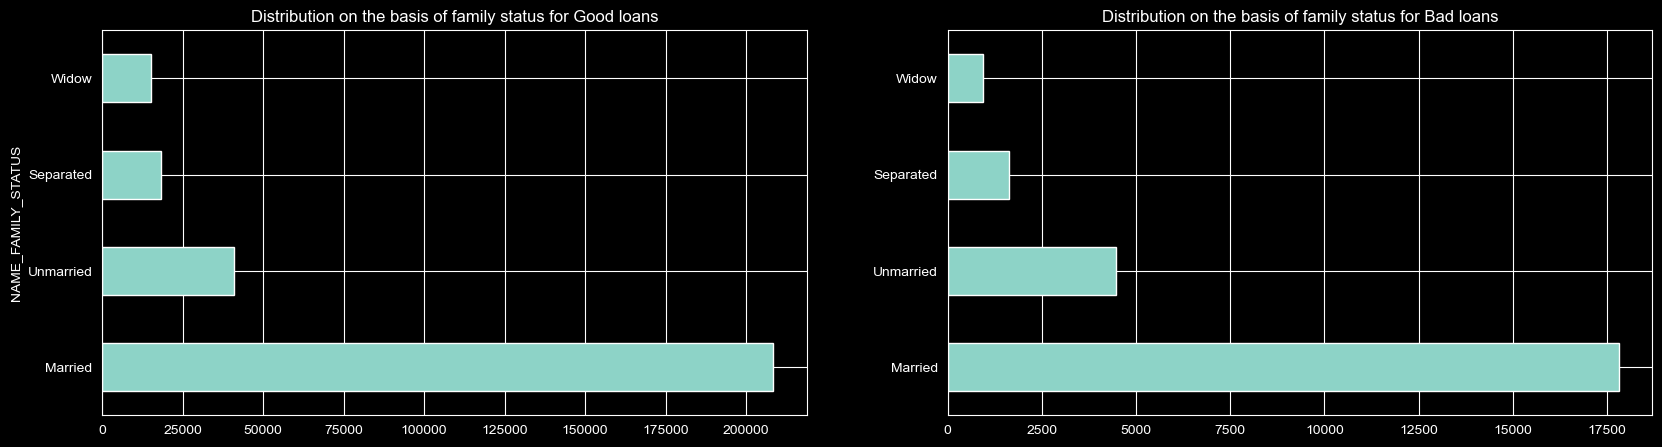

Insight: Applicant's family status, also does not influence much on whether a person will default or not.
We have more people in our dataset who are married and less from other categories.
Because of this imbalance, obviously more chances will be that applicant who is married will default.


In [219]:
#let's see if family status has any influence on person defaulting or not
sns.set_style("whitegrid")
plt.style.use("dark_background")
plt.figure(figsize=(20,5)) 

plt.subplot(1,2,1)
inp.NAME_FAMILY_STATUS[inp.TARGET==0].value_counts().plot.barh()
plt.title('Distribution on the basis of family status for Good loans')
plt.yticks(rotation = 0)

plt.subplot(1,2,2)
inp.NAME_FAMILY_STATUS[inp.TARGET==1].value_counts().plot.barh()
plt.title('Distribution on the basis of family status for Bad loans')
plt.yticks(rotation = 0)
plt.ylabel("")
plt.show() 

print("Insight: Applicant's family status, also does not influence much on whether a person will default or not.")
print("We have more people in our dataset who are married and less from other categories.\nBecause of this imbalance, obviously more chances will be that applicant who is married will default.")

In [220]:
index = inp.NAME_FAMILY_STATUS.value_counts().index
for i in index:
    print('Default Rate of {}:'.format(i),round(inp.NAME_FAMILY_STATUS[inp.TARGET==1].value_counts()[i]*100/inp.NAME_FAMILY_STATUS.value_counts()[i],2))

Default Rate of Married: 7.87
Default Rate of Unmarried: 9.81
Default Rate of Separated: 8.19
Default Rate of Widow: 5.82


#### Insight:
- Unmarried people have the highest default rate of 9.8%.

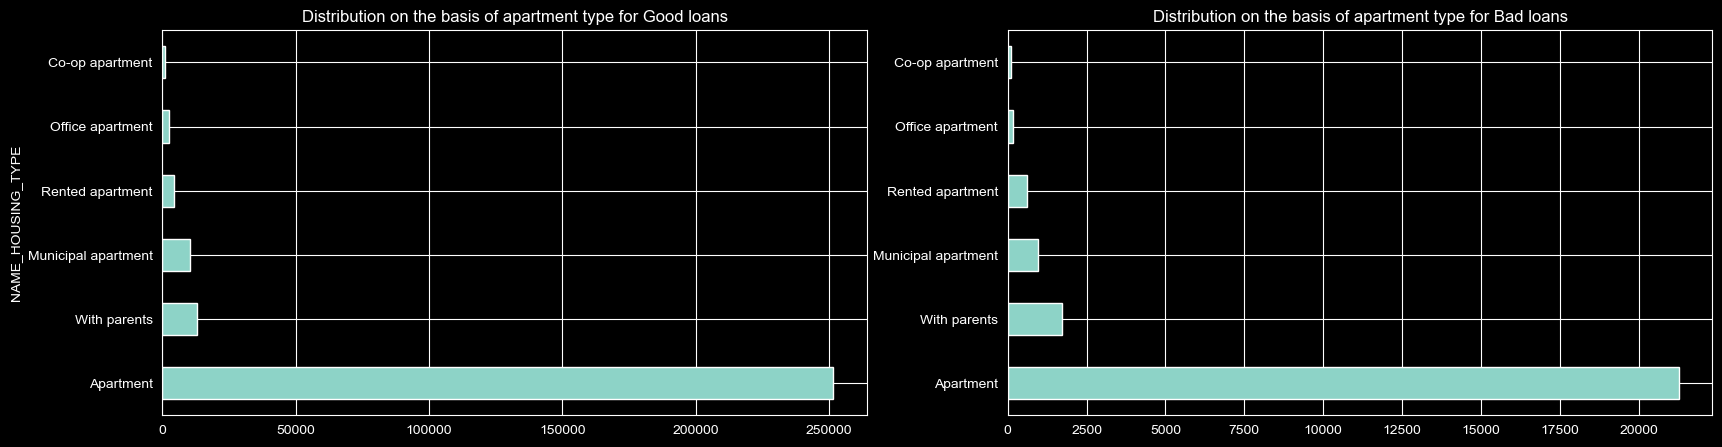

Insight: Once again, applicant's apartment type, also does not influence much on whether a person will default or not.
We have more people in our dataset who are living in an apartment and less from other categories.
Because of this imbalance, obviously more chances will be that applicant who is living in an apartment will default. 


In [221]:
#let's check if type of apartment that client has any influence on our target variable 
sns.set_style("whitegrid")
plt.style.use("dark_background")
plt.figure(figsize=(20,5)) 

plt.subplot(1,2,1)
inp.NAME_HOUSING_TYPE[inp.TARGET==0].value_counts().plot.barh()
plt.title('Distribution on the basis of apartment type for Good loans')
plt.yticks(rotation = 0)

plt.subplot(1,2,2)
inp.NAME_HOUSING_TYPE[inp.TARGET==1].value_counts().plot.barh()
plt.title('Distribution on the basis of apartment type for Bad loans')
plt.yticks(rotation = 0)
plt.ylabel("")
plt.show() 

print("Insight: Once again, applicant's apartment type, also does not influence much on whether a person will default or not.")
print("We have more people in our dataset who are living in an apartment and less from other categories.\nBecause of this imbalance, obviously more chances will be that applicant who is living in an apartment will default. ")

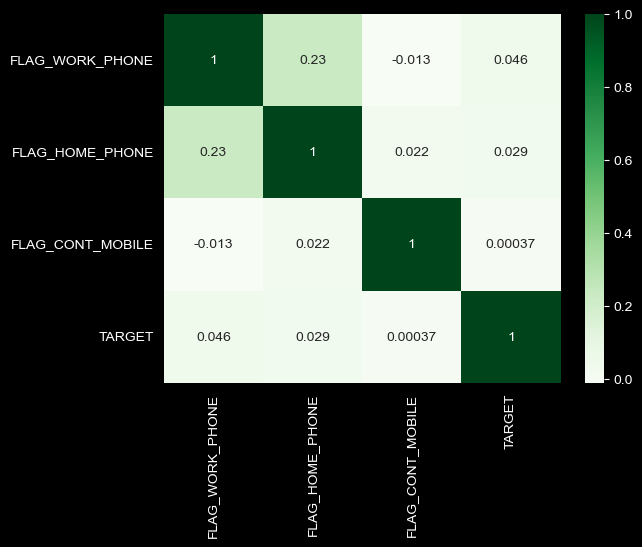

All of these have no relationship with our target variable
So, whether a person has provided phone or not, or its reachable or not, does not influence whether he/she will default or not


In [222]:
sns.heatmap(inp[['FLAG_WORK_PHONE', 'FLAG_HOME_PHONE', 'FLAG_CONT_MOBILE', 'TARGET']].corr(),annot=True, cmap='Greens')
plt.show()
print("All of these have no relationship with our target variable")
print("So, whether a person has provided phone or not, or its reachable or not, does not influence whether he/she will default or not")

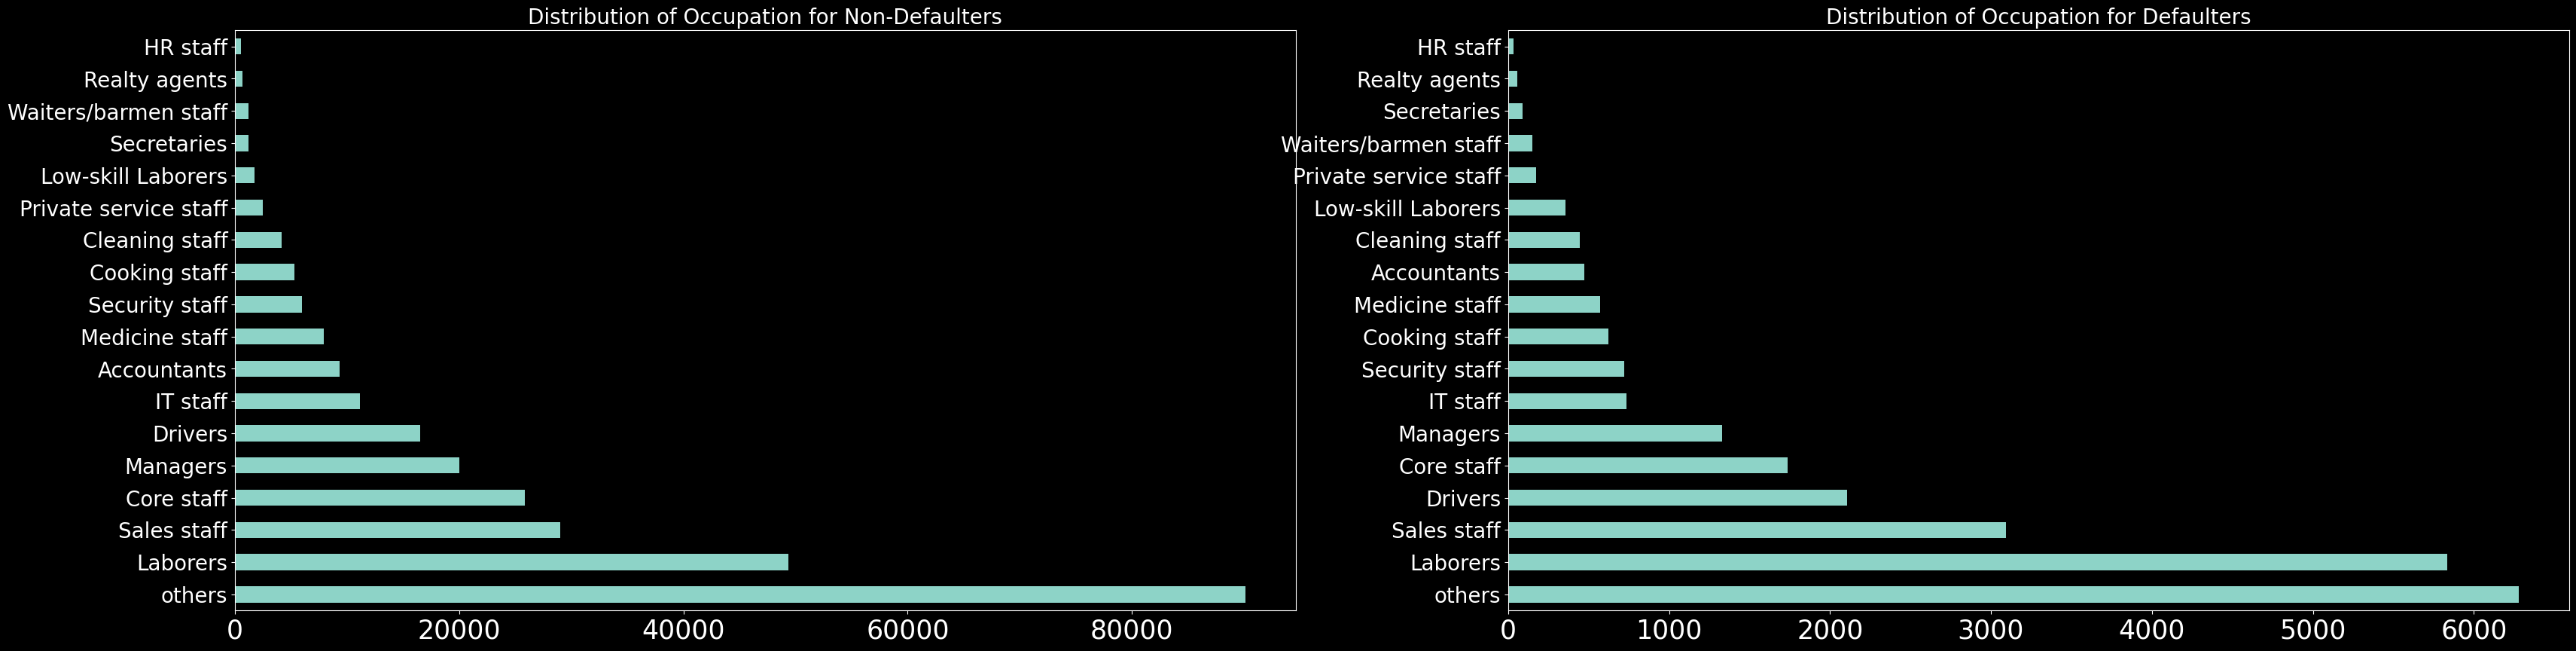

In [223]:
#let's see for occupation type
plt.style.use("default")
plt.style.use("dark_background")
plt.figure(figsize=(40,10))

plt.subplot(1,2,1)
inp.OCCUPATION_TYPE[inp.TARGET == 0].value_counts().plot.barh()
plt.xticks(fontsize = 25)
plt.yticks(fontsize=20)
plt.ylabel("")
plt.title("Distribution of Occupation for Non-Defaulters", fontdict={'size':20})

plt.subplot(1,2,2)
inp.OCCUPATION_TYPE[inp.TARGET == 1].value_counts().plot.barh()
plt.xticks(fontsize = 25)
plt.yticks(fontsize=20)
plt.ylabel("")
plt.title("Distribution of Occupation for Defaulters", fontdict={'size':20})
plt.show()

#### Insight: In the above graphs-
- We can clearly see that all occupation types are fine except `Laborers`. 
- Applicants who are in the occupation type `Labourers` are more likely to default than other occupation type applicants

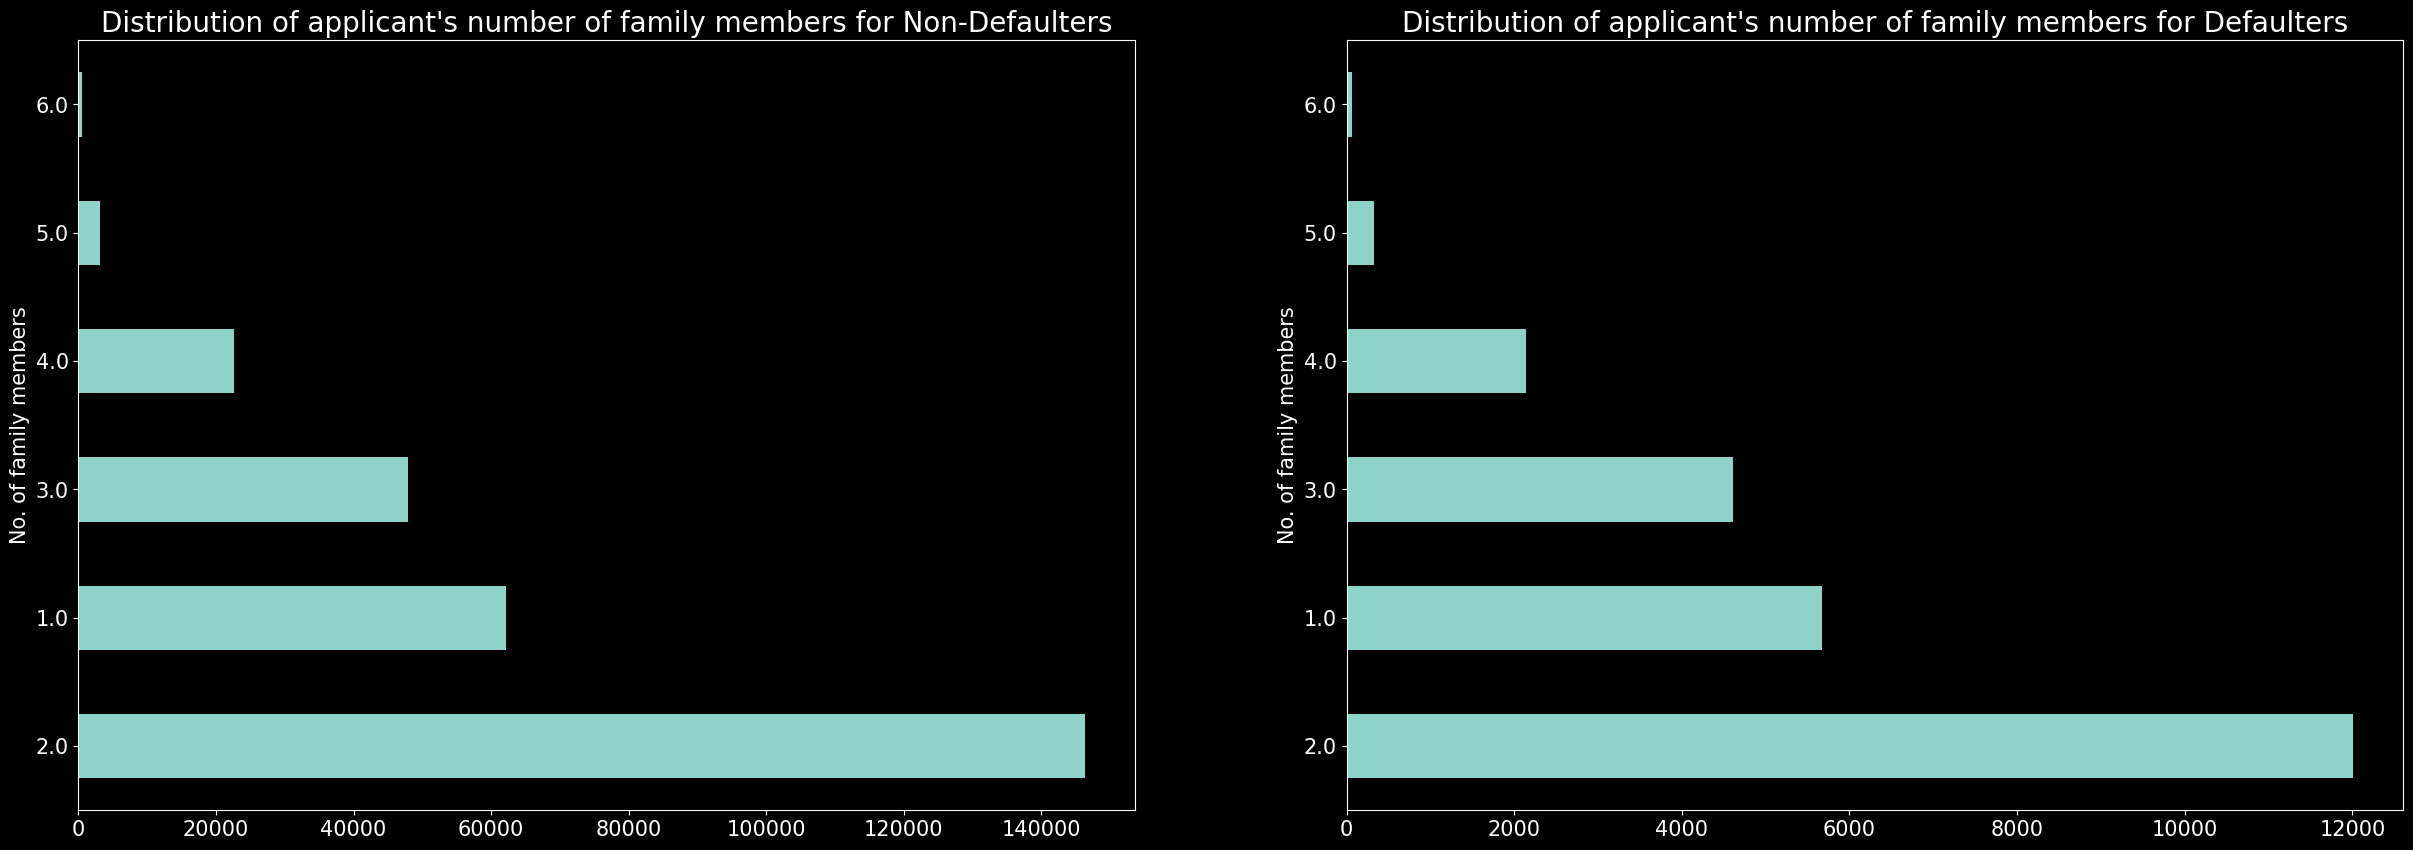

In [224]:
#let's check defaults for number of family members applicant has 
plt.figure(figsize=(30,10))
plt.subplot(2,2,1)

plt.subplot(1,2,1)
inp.CNT_FAM_MEMBERS[inp.TARGET == 0].value_counts().plot.barh()
plt.xticks(fontsize = 15)
plt.yticks(fontsize=15)
plt.ylabel("No. of family members", fontsize=15)
plt.title("Distribution of applicant's number of family members for Non-Defaulters", fontdict={'size':20})

plt.subplot(1,2,2)
inp.CNT_FAM_MEMBERS[inp.TARGET == 1].value_counts().plot.barh()
plt.xticks(fontsize = 15)
plt.yticks(fontsize=15)
plt.ylabel("No. of family members", fontsize=15)
plt.title("Distribution of applicant's number of family members for Defaulters", fontdict={'size':20})
plt.show()

In [225]:
#let's check percentage of people defaulting based on number of family members they have
for i in range(1,6):
    print("Default Rate when Applicant's Family members is {} =".format(i),round((inp.CNT_FAM_MEMBERS[inp.TARGET==1].value_counts()[i]/inp.CNT_FAM_MEMBERS.value_counts()[i])*100,2))

Default Rate when Applicant's Family members is 1 = 8.36
Default Rate when Applicant's Family members is 2 = 7.58
Default Rate when Applicant's Family members is 3 = 8.76
Default Rate when Applicant's Family members is 4 = 8.65
Default Rate when Applicant's Family members is 5 = 9.4


#### Insight: 
- People with 5 or more family members are having 9.4% default rate which is highest among all other categories.
- For other cases, i.e. less than 5 members, percentage of defaulting is less than 9%.

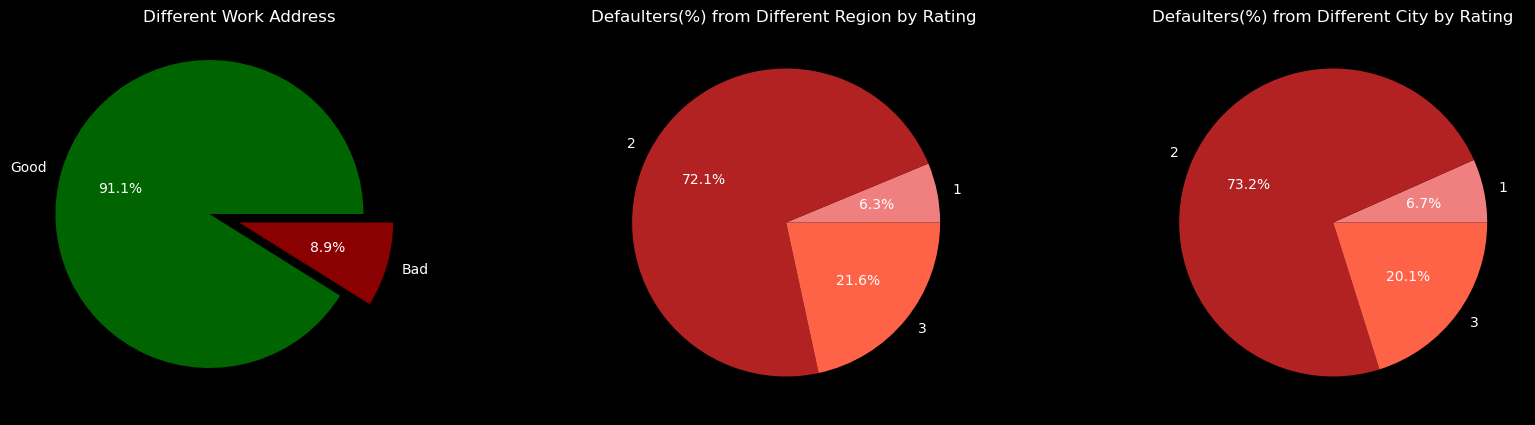

In [226]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
labels = ['Good', 'Bad']
inp.groupby('TARGET')['REG_REGION_NOT_WORK_REGION'].sum().plot.pie(labels = labels, autopct = "%1.1f%%", 
                                                                   colors= ['darkgreen', 'darkred'], explode=[0.2,0])
plt.title("Different Work Address")
plt.ylabel("")

plt.subplot(1,3,2)
labels = ['1', '2', '3']
inp.groupby('REGION_RATING_CLIENT')['TARGET'].sum().plot.pie(labels = labels,  autopct = "%1.1f%%",
                                                            colors=['lightcoral', 'firebrick', 'tomato'])
plt.ylabel("")
plt.title("Defaulters(%) from Different Region by Rating ")

plt.subplot(1,3,3)
labels = ['1', '2', '3']
inp.groupby("REGION_RATING_CLIENT_W_CITY")['TARGET'].sum().plot.pie(labels=labels, autopct="%1.1f%%",
                                                                   colors=['lightcoral', 'firebrick', 'tomato'])
plt.ylabel("")
plt.title("Defaulters(%) from Different City by Rating")
plt.show()

#### Insight:
- In graph 1 - I have included all those who have different work and permanent address. Then checked for these applicants whether or not they are defaulting. Turns out only 9% (approx.) default if address is different. Hence, this does not influence whether applicant will default or not.

In [227]:
#checking percentage default by region rating
for i in range(1,4):
    print('Percentage default by city rating {}-'.format(i), round(inp.REGION_RATING_CLIENT_W_CITY[inp.TARGET==1].value_counts()[i]*100/inp.REGION_RATING_CLIENT_W_CITY.value_counts()[i],2))

Percentage default by city rating 1- 4.84
Percentage default by city rating 2- 7.92
Percentage default by city rating 3- 11.4


#### Insight:
- In graph 2&3 - Most defaulters are from region/city 2(absolute terms) and least from region/city 1(absolute terms). 
- But percentage wise, 11% of applicants from city region 3 default.
- Least default percent is from city 1 i.e. only 4%

In [228]:
#checking percentage wise defaults on applications filled on different days
index = inp.WEEKDAY_APPR_PROCESS_START.value_counts().index
for i in index:
    print('Default rate on {}:'.format(i), round(inp.WEEKDAY_APPR_PROCESS_START[inp.TARGET==1].value_counts()[i]*100/inp.WEEKDAY_APPR_PROCESS_START.value_counts()[i], 2))

Default rate on TUESDAY: 8.35
Default rate on WEDNESDAY: 8.16
Default rate on MONDAY: 7.76


Default rate on THURSDAY: 8.1
Default rate on FRIDAY: 8.15
Default rate on SATURDAY: 7.89
Default rate on SUNDAY: 7.93


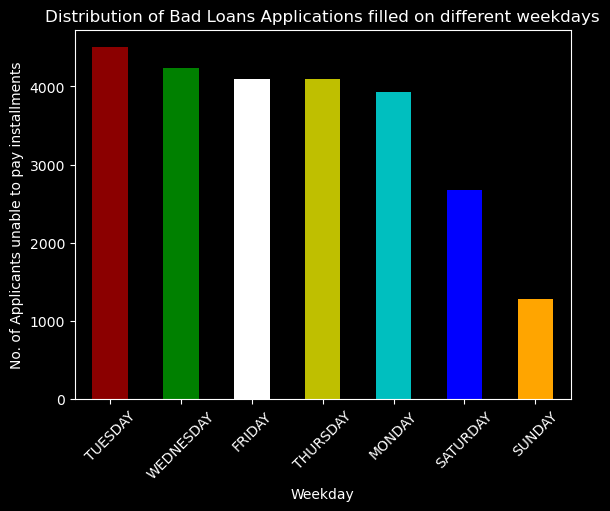

Insight: We have most defaluters on Tuesday.
The applications filled on Sundays are least likely to default.
This could be because we have least application on sundays.


In [229]:
plt.style.use('default')
plt.style.use('dark_background')
inp.WEEKDAY_APPR_PROCESS_START[inp.TARGET == 1].value_counts().plot.bar(color = ['darkred', 'g', 'white', 'y', 'c', 'blue', 'orange'])
plt.xlabel('Weekday')
plt.ylabel('No. of Applicants unable to pay installments')
plt.xticks(rotation=45)
plt.title('Distribution of Bad Loans Applications filled on different weekdays')
plt.show()
print('Insight: We have most defaluters on Tuesday.\nThe applications filled on Sundays are least likely to default.\nThis could be because we have least application on sundays.')

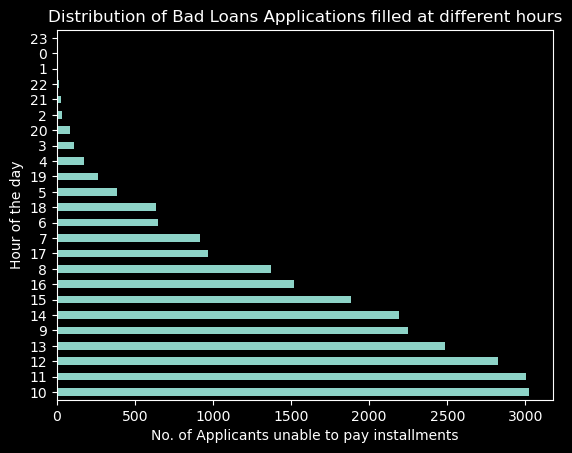

Insight: The applications filled between 10AM-12PM are most likely to default.
Also, most applications are filled during this hour only.


In [230]:
plt.style.use("default")
plt.style.use("dark_background")
inp.HOUR_APPR_PROCESS_START[inp.TARGET==1].value_counts().plot.barh()
plt.xlabel('No. of Applicants unable to pay installments')
plt.ylabel('Hour of the day')
plt.title('Distribution of Bad Loans Applications filled at different hours')
plt.show()
print("Insight: The applications filled between 10AM-12PM are most likely to default.\nAlso, most applications are filled during this hour only.")      

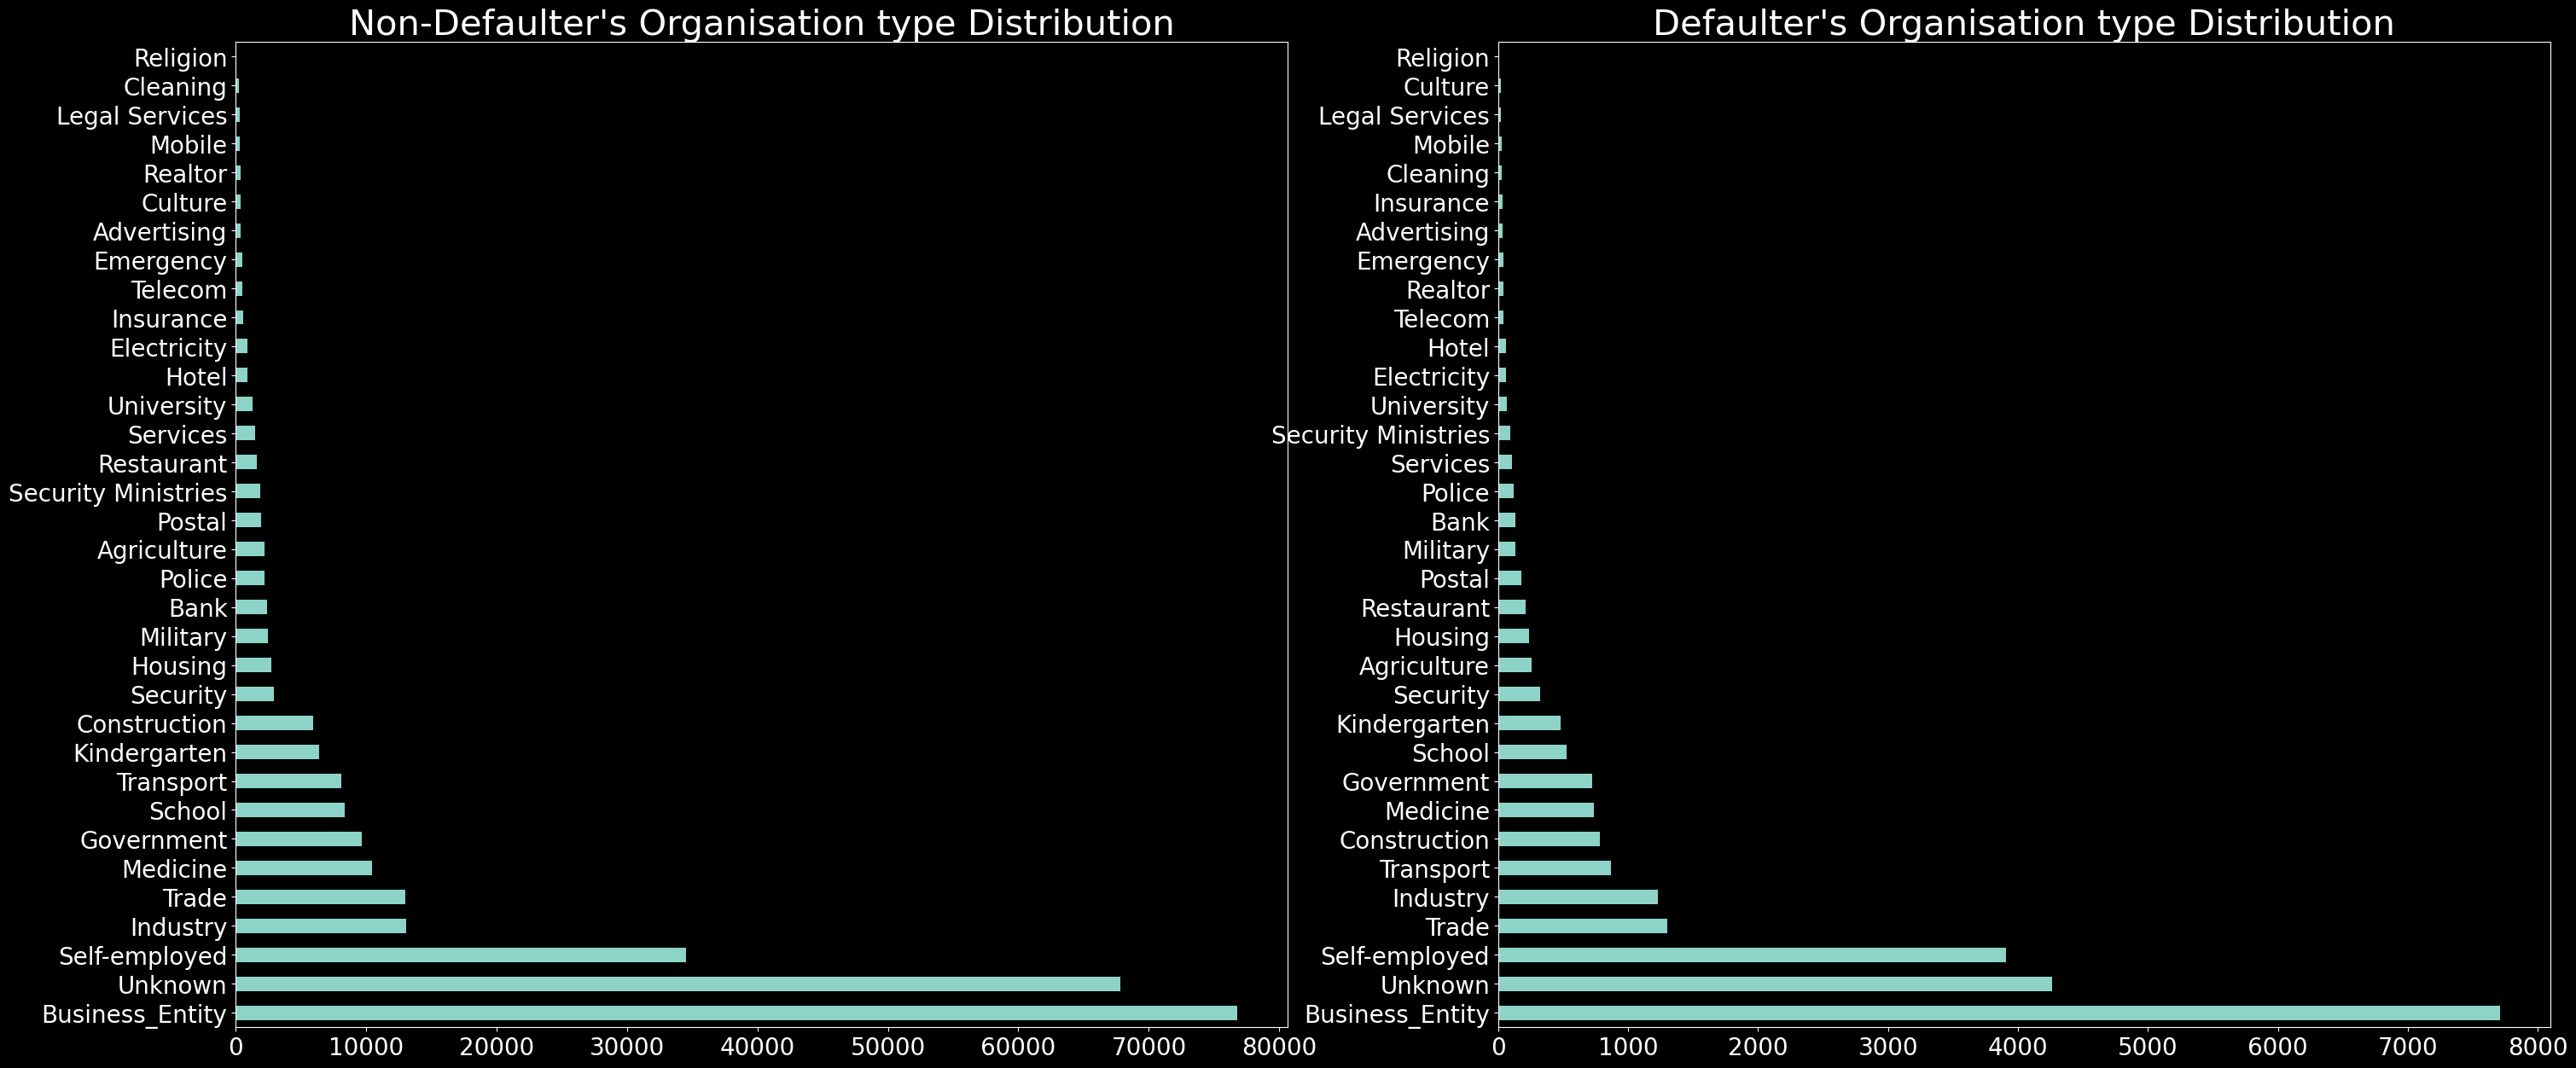

In [231]:
#let's chack defaults based on organization type
plt.style.use("default")
plt.style.use("dark_background")
plt.figure(figsize=(35,15))
plt.subplot(1,2,1)
inp.ORGANIZATION_TYPE[inp.TARGET == 0].value_counts().plot.barh()
plt.title("Non-Defaulter's Organisation type Distribution", fontdict={'size':'30'})
plt.yticks(fontsize = 20)
plt.xticks(fontsize=20)
plt.ylabel('')

plt.subplot(1,2,2)
inp.ORGANIZATION_TYPE[inp.TARGET == 1].value_counts().plot.barh()
plt.title("Defaulter's Organisation type Distribution", fontdict={'size':'30'})
plt.yticks(fontsize = 20)
plt.xticks(fontsize=20)
plt.ylabel("")
plt.show()

In [232]:
#checking percentage wise default rate based on organization type
index=inp.ORGANIZATION_TYPE.value_counts().index
for i in index:
    print('Default Rate {}:'.format(i),round(inp.ORGANIZATION_TYPE[inp.TARGET==1].value_counts()[i]/inp.ORGANIZATION_TYPE.value_counts()[i], 2))

Default Rate Business_Entity: 0.09
Default Rate Unknown: 0.06
Default Rate Self-employed: 0.1
Default Rate Trade: 0.09
Default Rate Industry: 0.09
Default Rate Medicine: 0.07
Default Rate Government: 0.07
Default Rate Transport: 0.1
Default Rate School: 0.06
Default Rate Kindergarten: 0.07
Default Rate Construction: 0.12
Default Rate Security: 0.1
Default Rate Housing: 0.08
Default Rate Military: 0.05
Default Rate Bank: 0.05
Default Rate Agriculture: 0.1
Default Rate Police: 0.05
Default Rate Postal: 0.08
Default Rate Security Ministries: 0.05
Default Rate Restaurant: 0.12
Default Rate Services: 0.07
Default Rate University: 0.05
Default Rate Hotel: 0.06
Default Rate Electricity: 0.07
Default Rate Insurance: 0.06
Default Rate Telecom: 0.08
Default Rate Emergency: 0.07
Default Rate Advertising: 0.08
Default Rate Realtor: 0.11
Default Rate Culture: 0.06
Default Rate Mobile: 0.09
Default Rate Legal Services: 0.08
Default Rate Cleaning: 0.11
Default Rate Religion: 0.06


#### Insight:
- People in Construction and Restaurant organization have the highest default rate which is 12%
- Most defaults are from Business Entity(absolute terms).
- Also we don't know organisation type for many applicants(Unknown category)

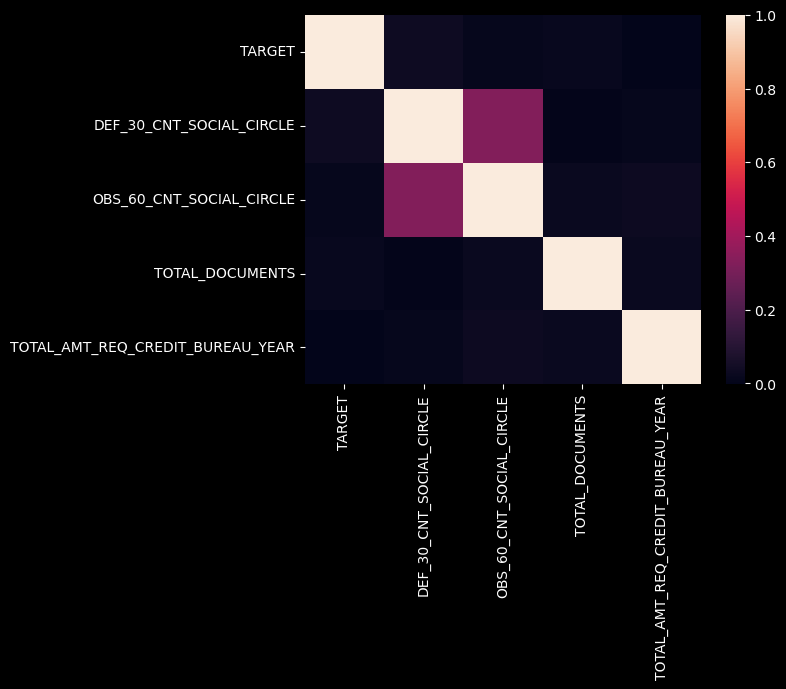

There is no correlation between these columns and our target variable.


In [233]:
#let's check correlation between few catoegorical columns and our target variable using heatmap
heat_col = ['TARGET', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'TOTAL_DOCUMENTS', 'TOTAL_AMT_REQ_CREDIT_BUREAU_YEAR']
sns.heatmap(inp[heat_col].corr())
plt.xticks()
plt.show()

print("There is no correlation between these columns and our target variable.")

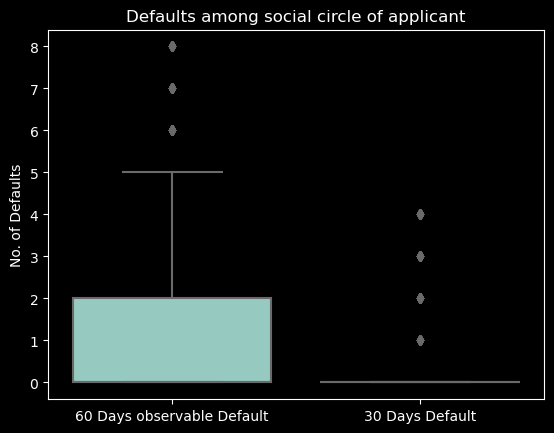

In [234]:
#pltting two scatter to see observable defautls and definite defaults
plt.style.use("default")
plt.style.use("dark_background")
sns.boxplot([inp.OBS_60_CNT_SOCIAL_CIRCLE, inp.DEF_30_CNT_SOCIAL_CIRCLE])
plt.xticks([0,1], ['60 Days observable Default', '30 Days Default'])
plt.ylabel('No. of Defaults')
plt.title('Defaults among social circle of applicant')
plt.show()

#### Insight:
- In observabe defaults(60 DPD) we have most applciants with 0-2 people defaulting in social circle. 
- In definite default (30 DPD) we have most applicants with 0 people defaulting in social circle.

#### Let's move on to analysing numerical columns

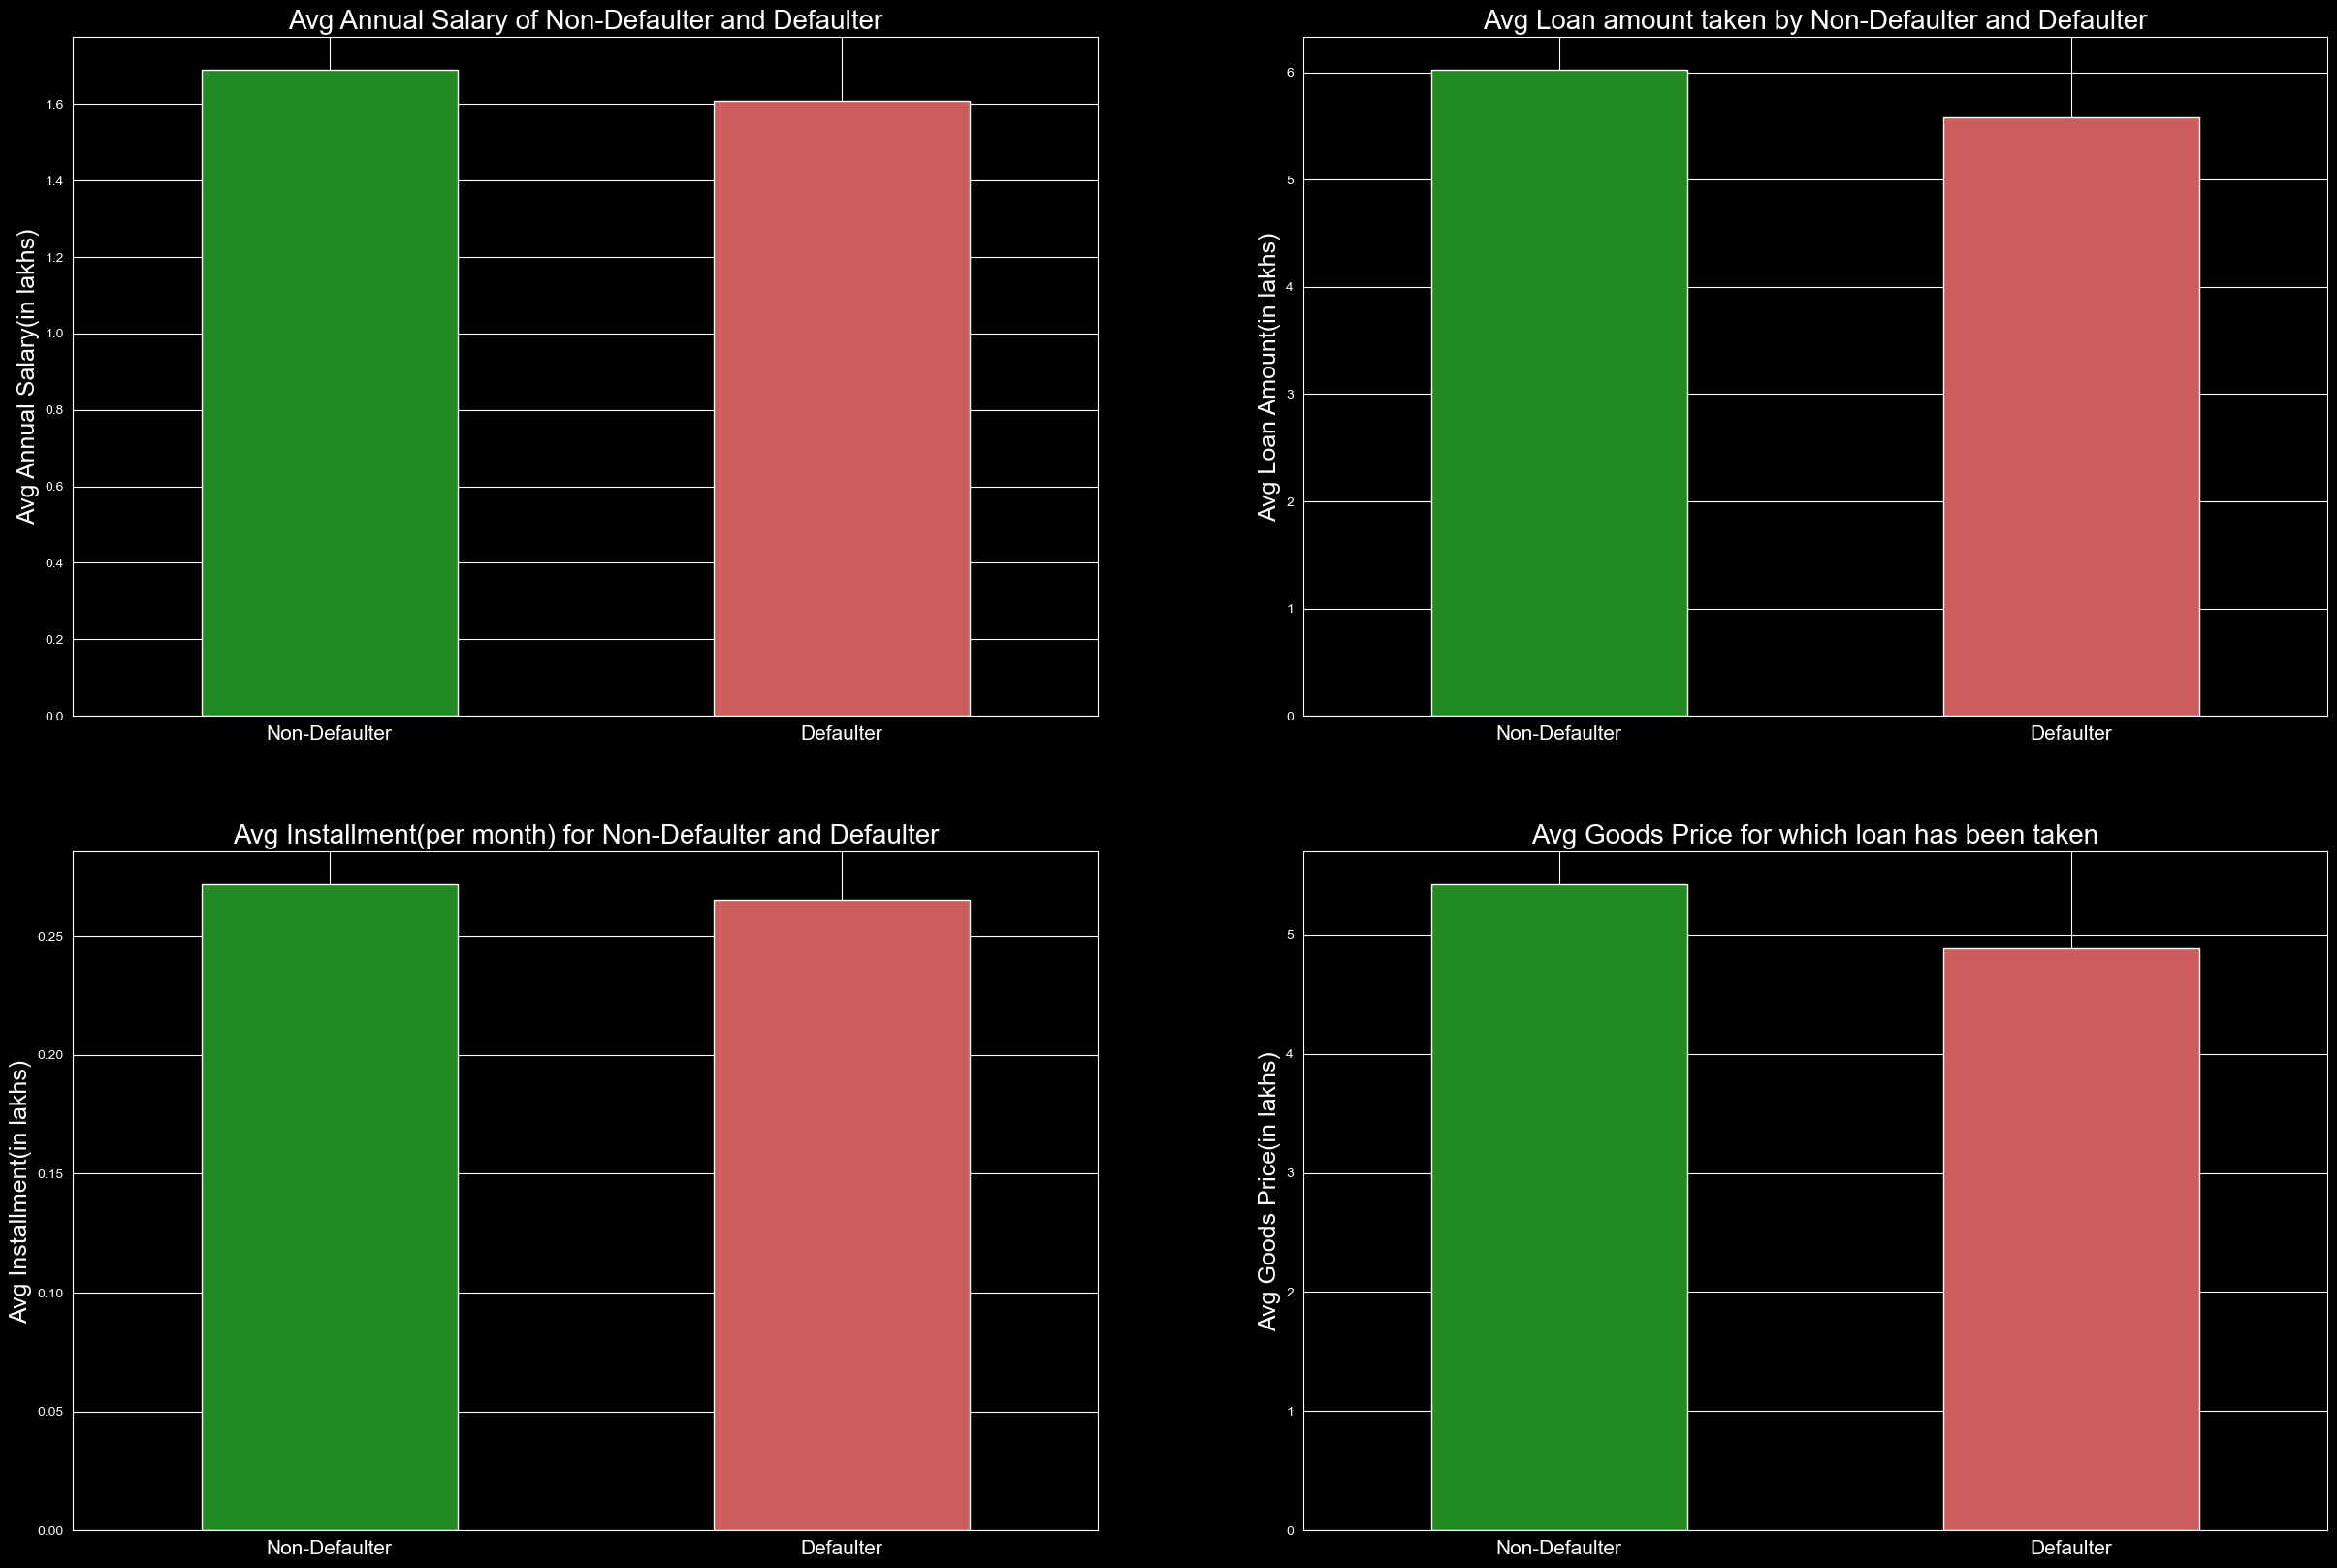

In [235]:
sns.set_style("whitegrid")
plt.style.use("dark_background")
plt.figure(figsize=(30,20))
fontdict = {'size': '20'}

plt.subplot(2,2,1)
inp.groupby('TARGET')['AMT_INCOME_TOTAL'].mean().plot.bar(color = ['forestgreen','indianred']) 
plt.ylabel("Avg Annual Salary(in lakhs)", fontsize=18)
plt.xticks([0,1], ['Non-Defaulter', 'Defaulter'], rotation = 0, fontsize=15)
plt.xlabel("")
plt.title('Avg Annual Salary of Non-Defaulter and Defaulter', fontdict=fontdict)

plt.subplot(2,2,2)
inp.groupby('TARGET')['AMT_CREDIT'].mean().plot.bar(color = ['forestgreen','indianred'])
plt.ylabel("Avg Loan Amount(in lakhs)", fontsize=18)
plt.xticks([0,1], ['Non-Defaulter', 'Defaulter'], rotation = 0, fontsize=15)
plt.xlabel("")
plt.title('Avg Loan amount taken by Non-Defaulter and Defaulter', fontdict=fontdict)

plt.subplot(2,2,3)
inp.groupby('TARGET')['AMT_ANNUITY'].mean().plot.bar(color = ['forestgreen','indianred'])
plt.ylabel("Avg Installment(in lakhs)", fontsize=18)
plt.xticks([0,1], ['Non-Defaulter', 'Defaulter'], rotation = 0, fontsize = 15)
plt.xlabel("")
plt.title('Avg Installment(per month) for Non-Defaulter and Defaulter', fontdict=fontdict)

plt.subplot(2,2,4)
inp.groupby('TARGET')['AMT_GOODS_PRICE'].mean().plot.bar(color = ['forestgreen','indianred'])
plt.ylabel("Avg Goods Price(in lakhs)", fontsize=18)
plt.xticks([0,1], ['Non-Defaulter', 'Defaulter'], rotation = 0, fontsize = 15)
plt.xlabel("")
plt.title('Avg Goods Price for which loan has been taken', fontdict=fontdict)
plt.show()

#### Insight:
- In all graphs, on an average, defaulter earns slightly less salary per annum and has taken slightly less loan, hence lower installments against lower price of goods.
- This gives us an insight that on an average, low income is one of the factor of person defaulting.

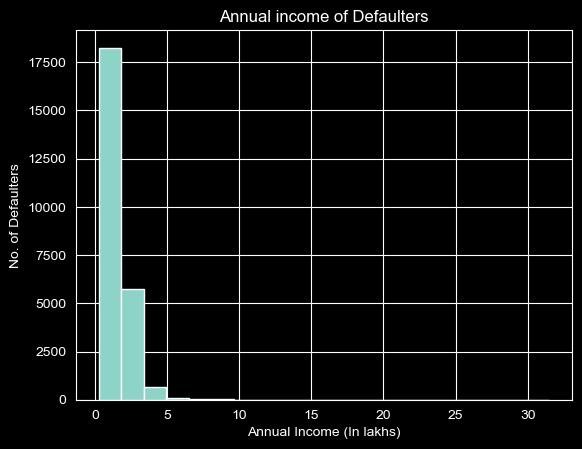

In [236]:
#plotting annual income of defaulters
inp.AMT_INCOME_TOTAL[inp.TARGET==1].plot.hist(bins=20)
plt.title("Annual income of Defaulters") 
plt.xlabel("Annual Income (In lakhs)")
plt.ylabel("No. of Defaulters")
plt.show() 

#### Insight:
- Most defaults occur for people who have income less than 3 lakhs.
- People with income more than 5-7 lakhs are less likely to default.

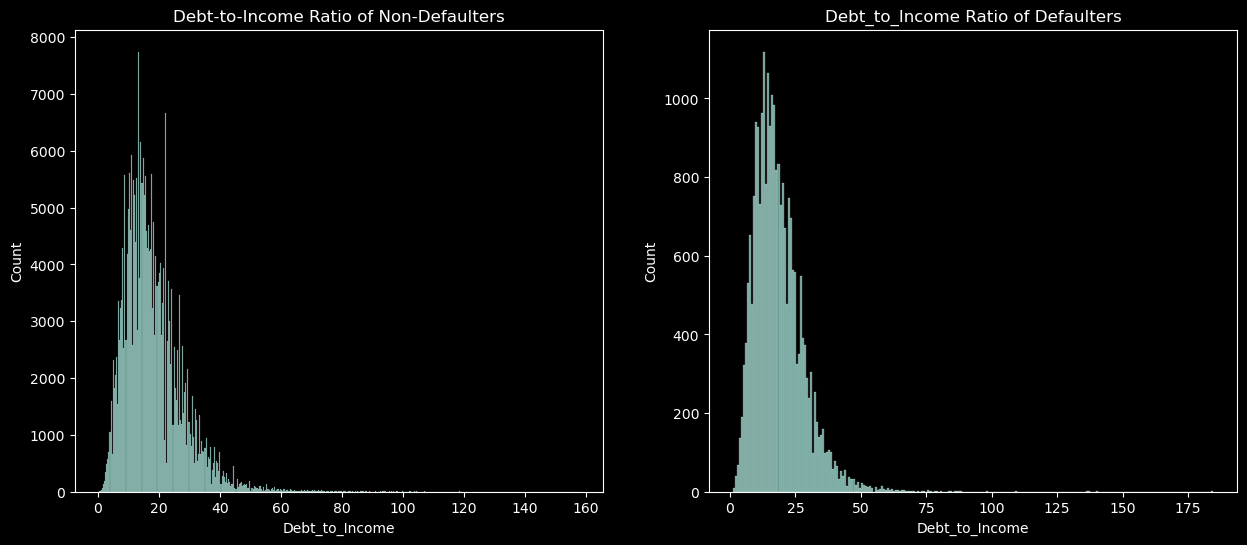

In [237]:
plt.style.use("default")
plt.style.use("dark_background")
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(inp.Debt_to_Income[inp.TARGET==0])
plt.title("Debt-to-Income Ratio of Non-Defaulters")

plt.subplot(1,2,2)
sns.histplot(inp.Debt_to_Income[inp.TARGET==1]).set_title('LoanAnnuity vs Income % of Defaulter Loans')
plt.title("Debt_to_Income Ratio of Defaulters")
plt.show()

#### Insight:
- It's clearly evident from above graph, that for all defaulters, debt-to-income ratio i.e. percentage of income that goes to pay loan is higher than those of non-defaulters. 
- In plot of non-defaulters, 10-20% is the ratio where most people lie, whereas in defaulters plot, its almost high till 25%.

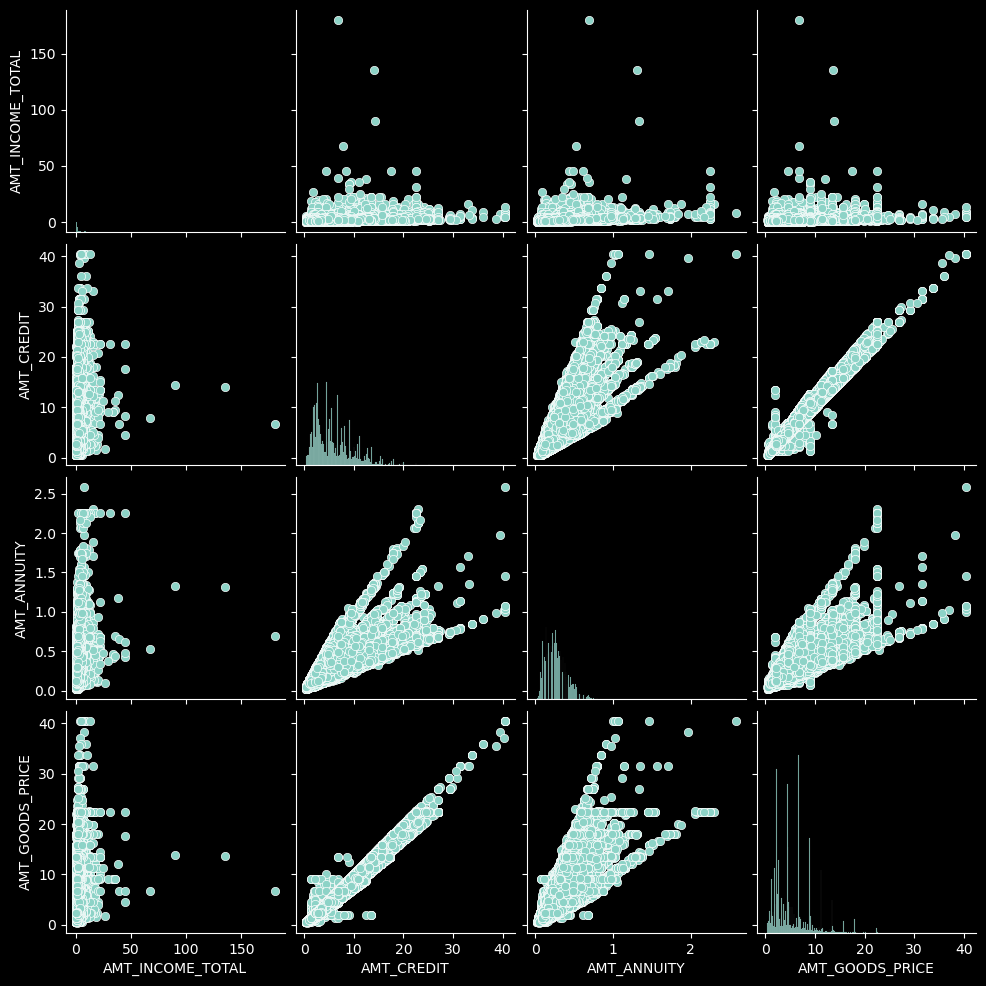

In [238]:
#checking relationship between multiple numerical columns at once for non-defaulters
loan = inp[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']][inp.TARGET==0]
sns.pairplot(loan,palette=["g",'r'])
plt.show()  

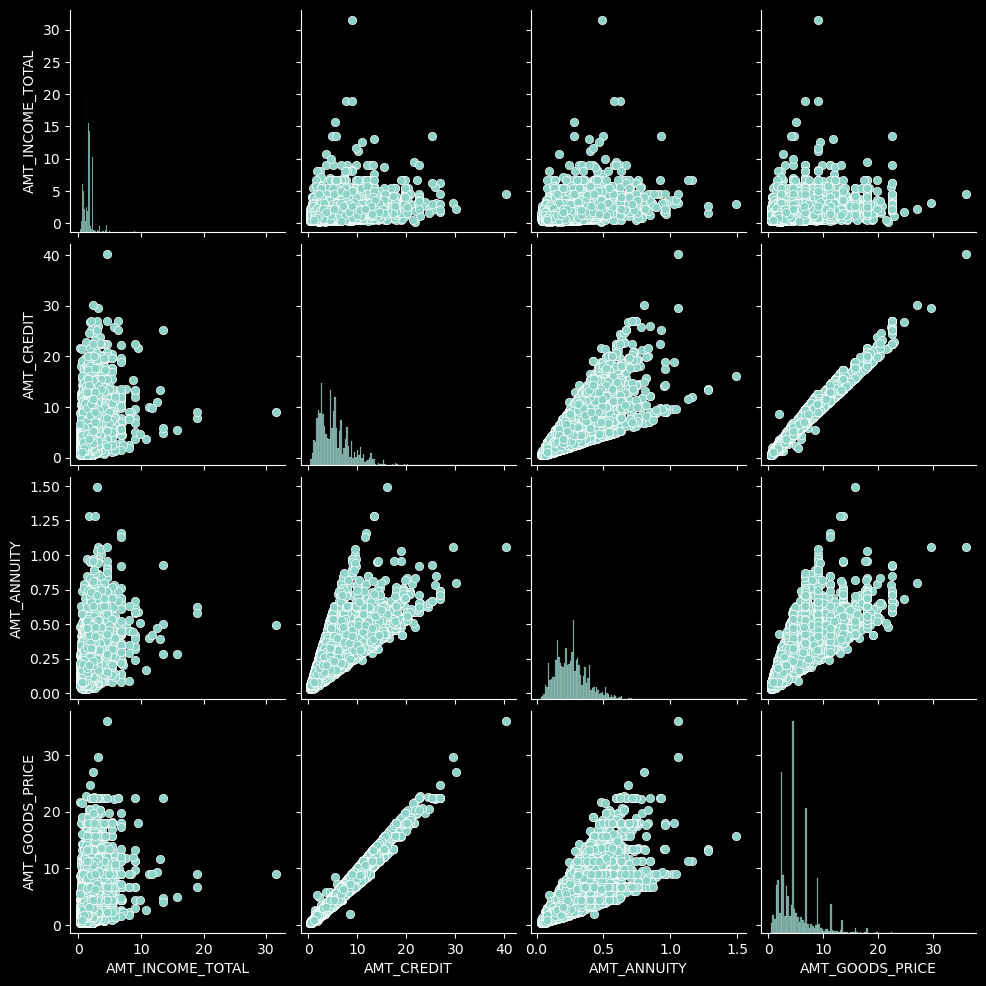

In [239]:
#checking relationship between multiple numerical columns at once for defaluters
loan = inp[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']][inp.TARGET==1]
sns.pairplot(loan)
plt.show()

#### Insight:
- There are no defaulters where annuity is greater than 1.5 lakhs and price of goods is more than 30lakhs.
- There are less defaulters where loan amount and goods price is more than 30lakhs
- We have a very strong positive linear relationship between loan amount and price of goods against which loan has been taken. Both increases simultaneously.
- Another positive linear relationship is between installment(per month) and price of goods against which loan has been taken. 
- Also, there is a positive linear relationship between loan amount and loan installment (per month). 

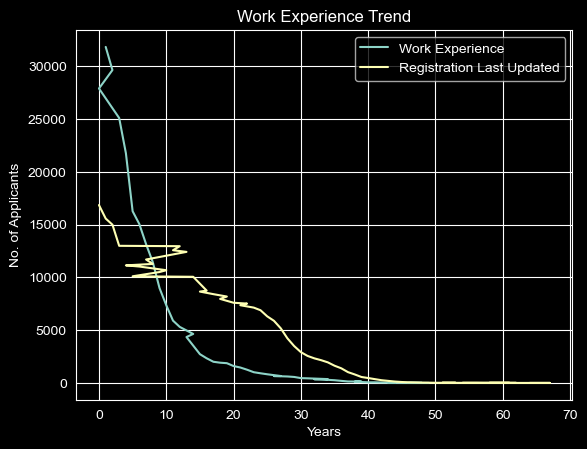

In [240]:
sns.set_style("whitegrid")
plt.style.use("dark_background")
inp.Work_Experience.value_counts().plot()
inp.Registration_Last_Updated.value_counts().plot()
plt.legend(['Work Experience', 'Registration Last Updated'])
plt.xlabel('Years')
plt.ylabel("No. of Applicants")
plt.title("Work Experience Trend")
plt.show()

#### Insight:
- We have most people with the work experience from 0-5 years and it keeps decreasing as experience increases. 
- Same is for last updation of registration. Most people updated their registration most in the time gap of 0-10 years and the number starts falling as years rises.

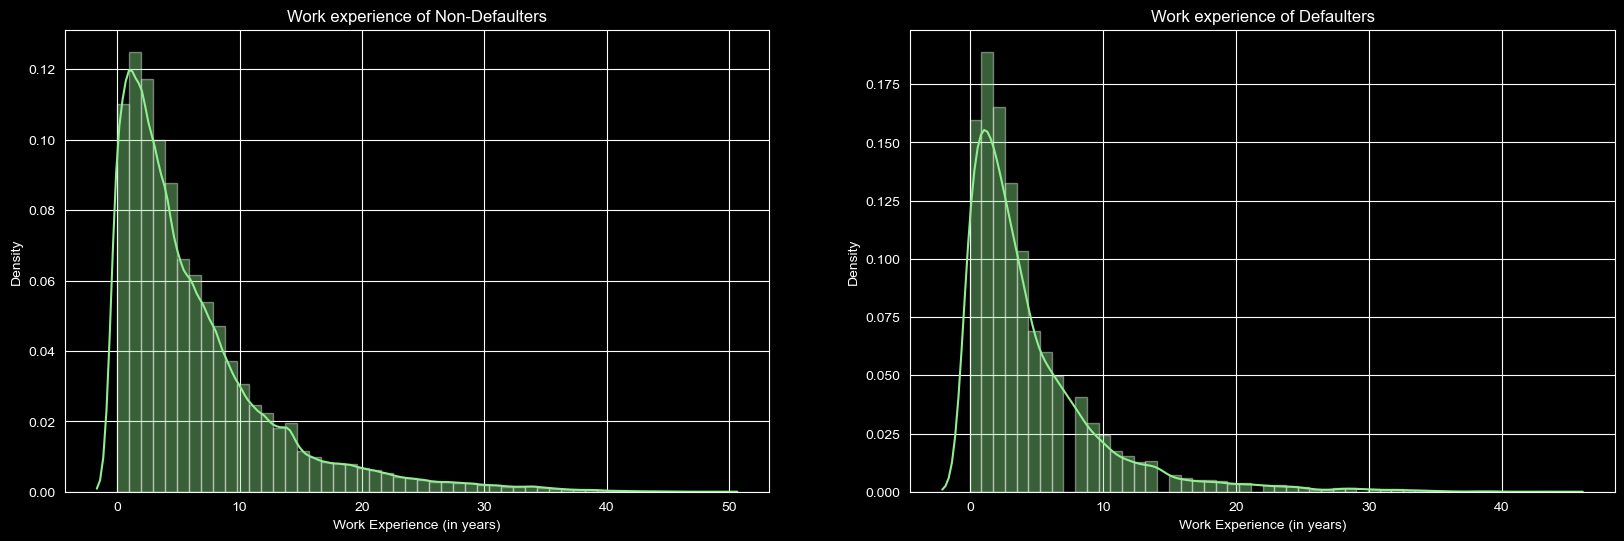

Insight:
Most applicants are having work experience in between 2-6 years. Hence, most defaulters are also in this range only.
Percentage rate of defaulting for people with 40+ yrs of work experience is lowest.


In [241]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(inp.Work_Experience[inp.TARGET==0], color = 'lightgreen')
plt.title("Work experience of Non-Defaulters")
plt.xlabel("Work Experience (in years)")

plt.subplot(1,2,2)
sns.distplot(inp.Work_Experience[inp.TARGET==1], color='lightgreen')
plt.title("Work experience of Defaulters")
plt.xlabel("Work Experience (in years)")
plt.show()

print("Insight:\nMost applicants are having work experience in between 2-6 years. Hence, most defaulters are also in this range only.\nPercentage rate of defaulting for people with 40+ yrs of work experience is lowest.")

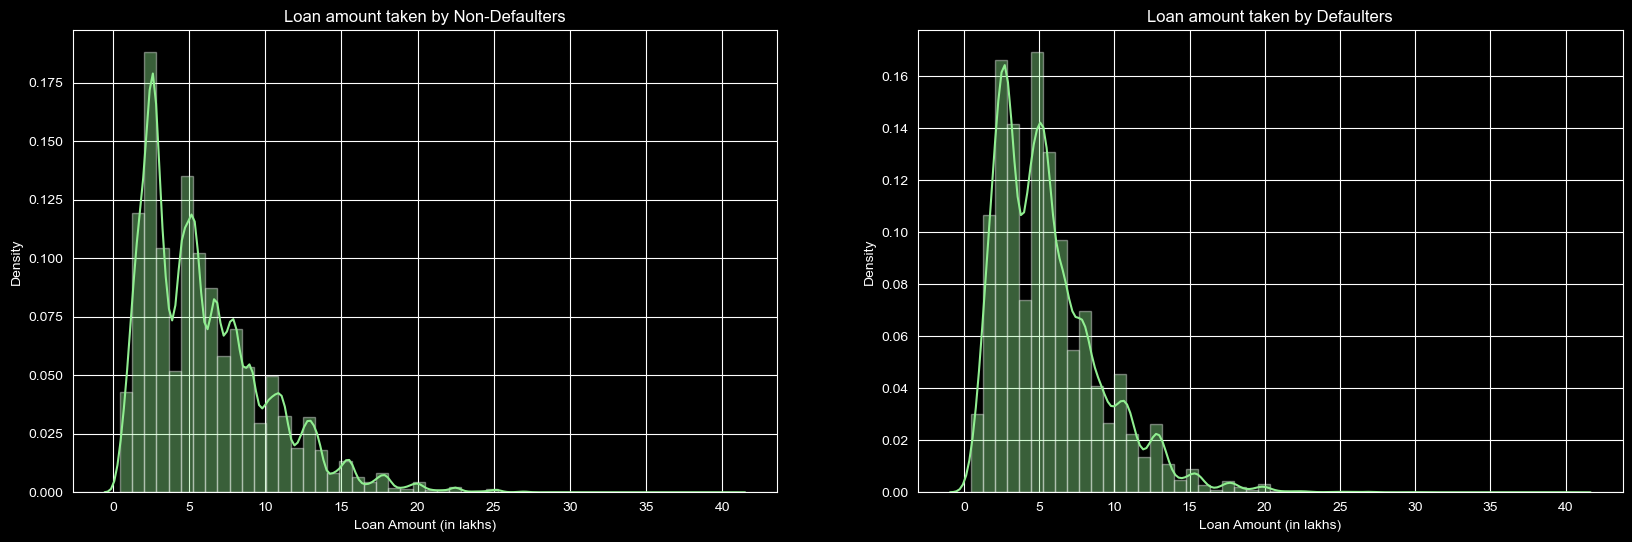

Insight:
Most applicants have taken loan in range of 1-6 lakhs.
Therefore, most defaluts are also in that range only.
Also, people who have taken loan near 5lakhs, are most likely to default.


In [242]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(inp.AMT_CREDIT[inp.TARGET==0], color = 'lightgreen')
plt.title("Loan amount taken by Non-Defaulters")
plt.xlabel("Loan Amount (in lakhs)")
plt.xticks([i for i in range(0,45,5)])

plt.subplot(1,2,2)
sns.distplot(inp.AMT_CREDIT[inp.TARGET==1], color='lightgreen')
plt.title("Loan amount taken by Defaulters")
plt.xlabel("Loan Amount (in lakhs)")
plt.xticks([i for i in range(0,45,5)])
plt.show()

print("Insight:\nMost applicants have taken loan in range of 1-6 lakhs.\nTherefore, most defaluts are also in that range only.\nAlso, people who have taken loan near 5lakhs, are most likely to default.")

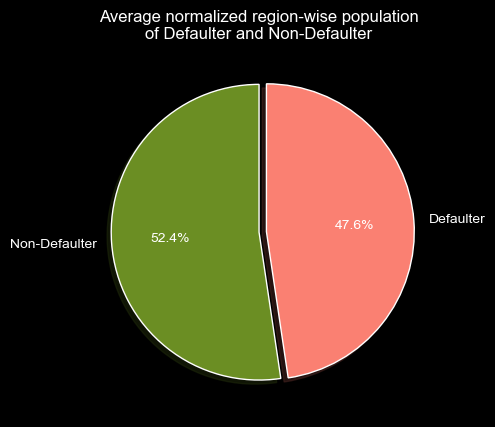

Insight:
On an average Defaulters resides in slightly less populated area compared to Non-defaulters.


In [243]:
#plotting pie chart to see in how much populated region does a defaulter or non-defaulter lives
inp.groupby("TARGET")['REGION_POPULATION_RELATIVE'].mean().plot.pie(labels = ['Non-Defaulter', 'Defaulter'], autopct="%1.1f%%",
                                                                   colors = ['olivedrab', 'salmon'], shadow=True, explode=[0,0.05],
                                                                   startangle=90)
plt.title("Average normalized region-wise population\nof Defaulter and Non-Defaulter")
plt.ylabel("")
plt.show()

print("Insight:\nOn an average Defaulters resides in slightly less populated area compared to Non-defaulters.")

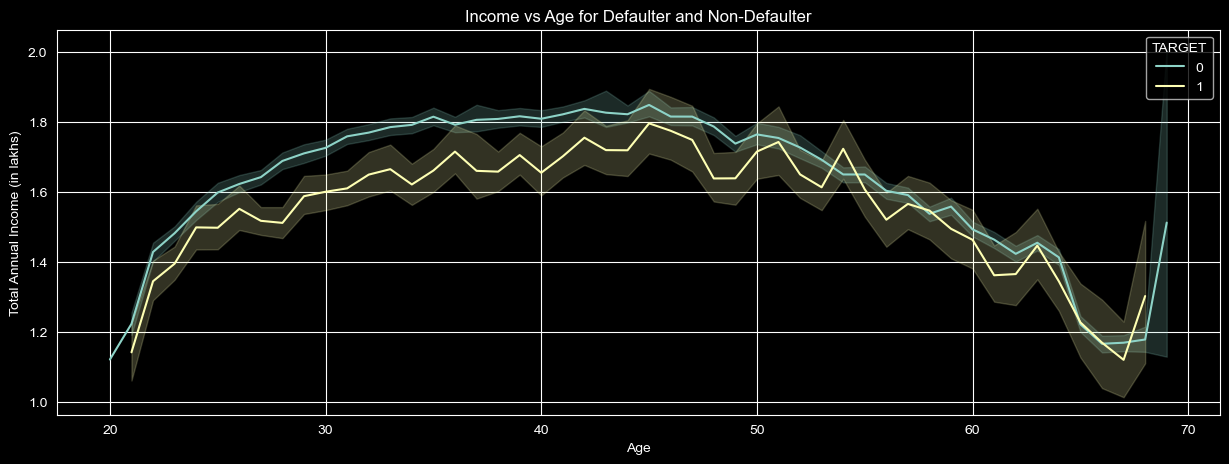

In [244]:
#let's do multivariate on age and income of defaulter and non-defaulter
plt.figure(figsize=(15,5))
sns.lineplot(data = inp, x='Age', y='AMT_INCOME_TOTAL', hue= inp.TARGET)
plt.title("Income vs Age for Defaulter and Non-Defaulter")
plt.ylabel("Total Annual Income (in lakhs)")
plt.show() 

#### Insight:
- Annual income trend is rising until age 45 and then it starts falling slowly for both defaulter and non-defaulters. 
- For defaulter, as I analysed earlier through bar charts, annual income in all age groups is slightly lower as compared to non-defaulter.

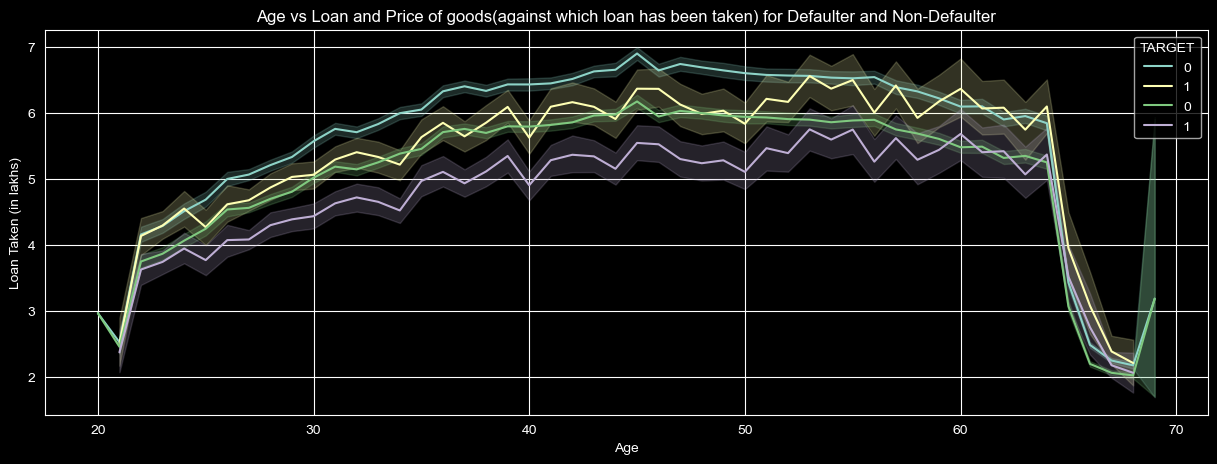

In legend:
0 = Applicants paying installments on time
1 = Applicants not paying installments(likely to default)


In [245]:
#let's do same multivariate but with age and loan amount this time 
plt.figure(figsize=(15,5))
sns.lineplot(data=inp, x='Age', y='AMT_CREDIT', hue ='TARGET')
sns.lineplot(data=inp, x='Age', y='AMT_GOODS_PRICE', hue='TARGET', palette = 'Accent')
plt.title("Age vs Loan and Price of goods(against which loan has been taken) for Defaulter and Non-Defaulter")
plt.ylabel("Loan Taken (in lakhs)")
plt.show() 

print("In legend:\n0 = Applicants paying installments on time\n1 = Applicants not paying installments(likely to default)")

#### Insight:
- Skyblue and green line represents "Non-Defaulters"
- Yellow and purple line represents "Defaulters" 
- In first case (skyblue+yellow) defaulters(yellow) have taken slightly less amount of loan (at all ages) as compared to Non-Defaulters(skyblue).
- Similarly in (green+purple) defaulters(purple) price of goods against which they have taken loan(at all ages) is less as compared to Non-Defaulters(green).
- In short, loan amount and price of goods at which loan was taken, these amounts are less for defaulters in general at all stages of age.

In [246]:
#let's first create a column with age groups
def bucket(x):
    if x>=20 and x<30:
        x='20-30'
    elif x>=30 and x<40:
        x='30-40'
    elif x>=40 and x<50:
        x='40-50'
    elif x>=50 and x<60:
        x='50-60'
    else:
        x='60+'
    return x

inp['Age Groups'] = inp.Age.apply(bucket)

In [247]:
#let's create pivot table and then create heatmap on numerical vars
defaulter = pd.pivot_table(data = inp[inp.TARGET==1], values = 'EXT_SOURCE_2', columns = 'CODE_GENDER', 
               index = 'Age Groups', aggfunc=np.median)

non_defaulter = pd.pivot_table(data = inp[inp.TARGET==0], values = 'EXT_SOURCE_2', columns = 'CODE_GENDER', 
               index = 'Age Groups', aggfunc=np.median) 

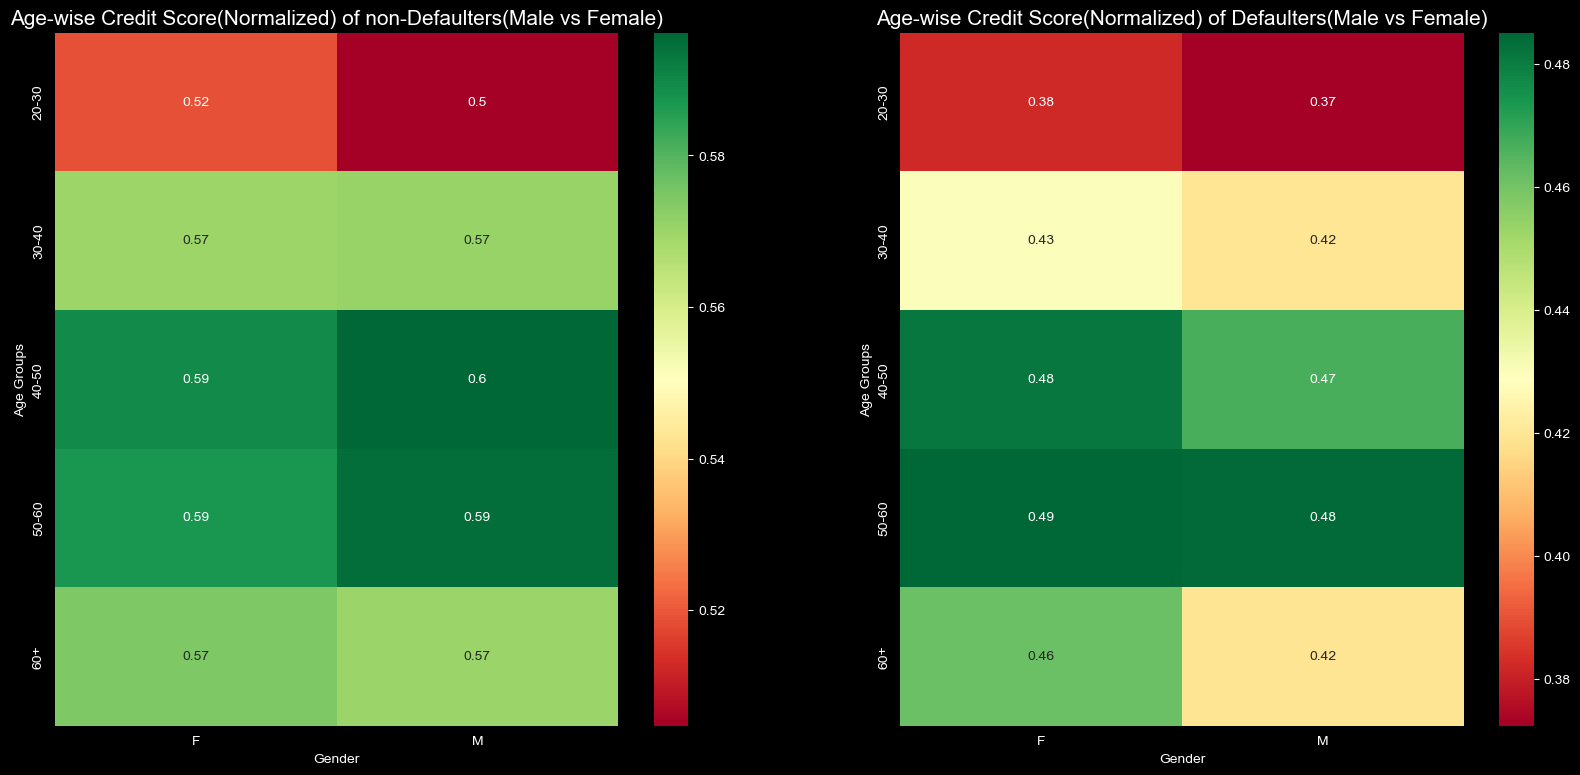

In [248]:
plt.figure(figsize=(20,9))

plt.subplot(1,2,1)
sns.heatmap(non_defaulter, cmap='RdYlGn', annot=True)
plt.xlabel("Gender")
plt.title("Age-wise Credit Score(Normalized) of non-Defaulters(Male vs Female)", fontdict={'size': 15})

plt.subplot(1,2,2)
sns.heatmap(defaulter, cmap='RdYlGn', annot=True)
plt.xlabel("Gender")
plt.title("Age-wise Credit Score(Normalized) of Defaulters(Male vs Female)", fontdict={'size': 15})
plt.show() 

### Important Insight:
- Its clearly visible that credit score of defaulters at all age stages, for both male and female is lower than those of Non-defaulters.
- Credit score is lowest for people in age ranging 20-30.
- This gives us clear insight that ***people with low credit score have high chances of defaulting.*** 

## Picking best variables till now and then checking correlation
- using heatmap I will check the correlation between all these important variables and pick best 10 out of these

In [249]:
inp.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'Age',
       'Work_Experience', 'Registration_Last_Updated', 'FLAG_WORK_PHONE',
       'FLAG_HOME_PHONE', 'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_WORK_REGION',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'TOTAL_DOCUMENTS',
       'TOTAL_AMT_REQ_CREDIT_BUREAU_YEAR', 'Debt_to_Income', 'Age Groups'],
      dtype='object')

In [250]:
corr_cols_heatmap = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS',
              'CNT_CHILDREN', 'Work_Experience', 'Age', 'TOTAL_DOCUMENTS','OBS_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
                    'DEF_30_CNT_SOCIAL_CIRCLE', 'TOTAL_AMT_REQ_CREDIT_BUREAU_YEAR', 'HOUR_APPR_PROCESS_START', 
                     'Registration_Last_Updated', 'REGION_POPULATION_RELATIVE']

#### Checking numerical correlation among best variables till now using heatmap for **Non-Defaulters**

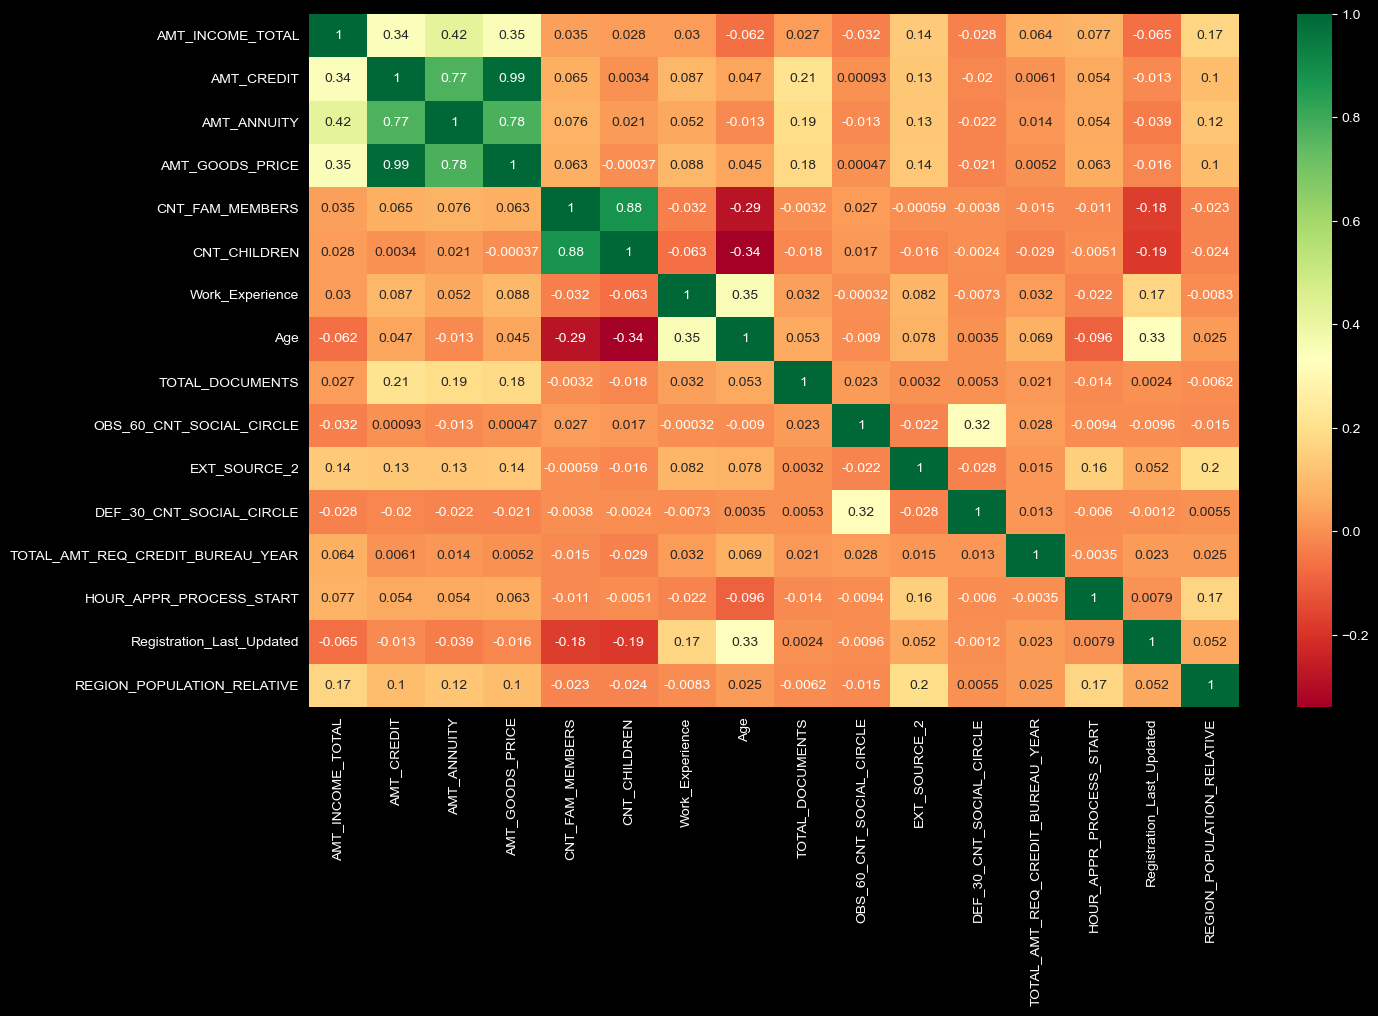

In [251]:
#numerical best variables' correlation heatmap for non-defaulters (good loans)
plt.figure(figsize=(15,9))
sns.heatmap(inp[corr_cols_heatmap][inp.TARGET==0].corr(), cmap='RdYlGn', annot=True)
plt.show() 

#### Insight for good loans:
***Good Loans = People who are paying installments on time and will likely pay off full loan.***

- Loan amount (AMT_CREDIT) and installments (AMT_ANNUITY) are having positive high correlation.
- Similarly, loan amount and price of goods (AMT_GOODS_PRICE) are also having positive **very high** correlation.
- Also, installments and price of goods are having positive correlation.
- Count of children and count of family members of applicant are having a positive correlation, which is obvious, more the children, more will be family members.
- Age of applicant and family members(count of children including) are having negative correlation(although it is very weak).

#### Checking numerical correlation among best variables till now using heatmap for **Defaulters**

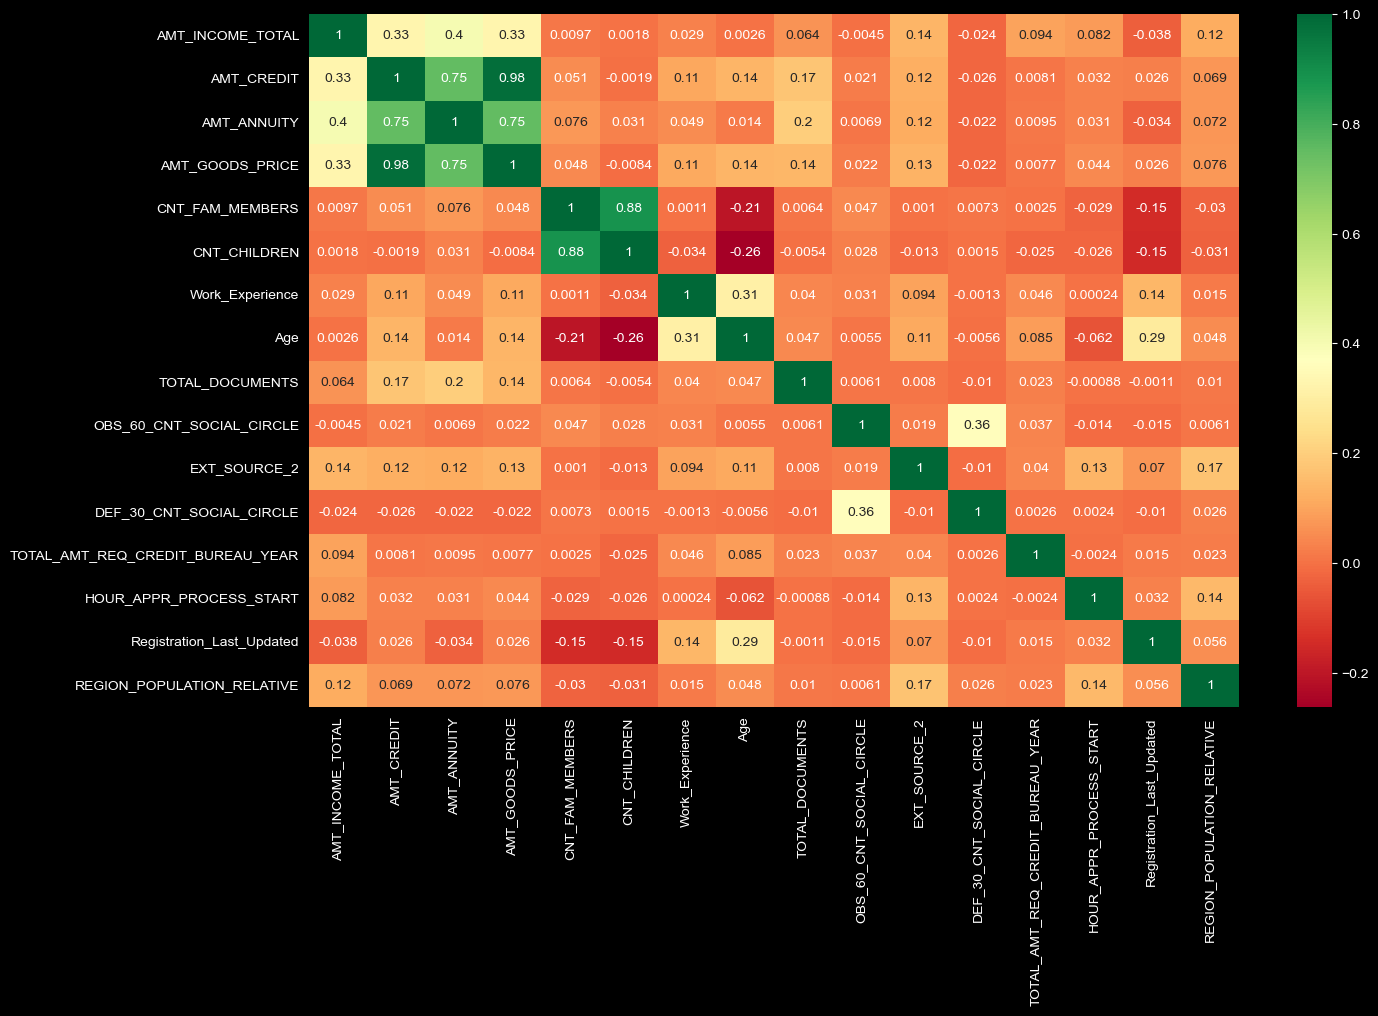

In [252]:
#numerical best variables' correlation heatmap for defaulters (bad loans)
plt.figure(figsize=(15,9))
sns.heatmap(inp[corr_cols_heatmap][inp.TARGET==1].corr(), cmap='RdYlGn', annot=True)
plt.show()

#### Insight for bad loans:
***Bad Loans = People who have not paid installments on time and are likely to default.***
- Just like good loans: Loan amount (AMT_CREDIT) is having **positive high correlation** with Installments (AMT_ANNUITY) and price of goods against which loan has been taken(AMT_GOODS_PRICE).
- Also family members and no. of children of applicant are also having positive correlation in bad loans as well. 
- One thing to note here in bad loans is: all the positive correlation has slightly reduced.

# Merging Applications and Previous Dataframe
### Analysing 

In [253]:
#merging prev and inp using inner join
loan_df = pd.merge(inp, prev, how= 'inner', on = 'SK_ID_CURR', suffixes=['_CURR', '_PREV'])
loan_df.head() 

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_CURR CODE_GENDER FLAG_OWN_CAR  \
0      100002       1              Cash loans           M            N   
1      100003       0              Cash loans           F            N   
2      100003       0              Cash loans           F            N   
3      100003       0              Cash loans           F            N   
4      100004       0         Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_CURR  \
0               Y             0              2.02             4.07   
1               N             0              2.70            12.94   
2               N             0              2.70            12.94   
3               N             0              2.70            12.94   
4               Y             0              0.68             1.35   

   AMT_ANNUITY_CURR  AMT_GOODS_PRICE_CURR NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0              0.25                  3.51   Unaccompanied          Working   
1              0.36                 11.29          Family    State servant   
2              0.36                 11.29          Family    State servant   
3              0.36                 11.29          Family    State servant   
4              0.07                  1.35   Unaccompanied          Working   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS NAME_HOUSING_TYPE  \
0  Secondary / secondary special          Unmarried         Apartment   
1               Higher education            Married         Apartment   
2               Higher education            Married         Apartment   
3               Higher education            Married         Apartment   
4  Secondary / secondary special          Unmarried         Apartment   

   REGION_POPULATION_RELATIVE  Age  Work_Experience  \
0                    0.018801   25              1.0   
1                    0.003541   45              3.0   
2                    0.003541   45              3.0   
3                    0.003541   45              3.0   
4                    0.010032   52              0.0   

   Registration_Last_Updated  FLAG_WORK_PHONE  FLAG_HOME_PHONE  \
0                        9.0                1                0   
1                        3.0                1                0   
2                        3.0                1                0   
3                        3.0                1                0   
4                       11.0                1                1   

   FLAG_CONT_MOBILE OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                 1        Laborers              1.0                     2   
1                 1      Core staff              2.0                     1   
2                 1      Core staff              2.0                     1   
3                 1      Core staff              2.0                     1   
4                 1        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_CURR  \
0                            2                       WEDNESDAY   
1                            1                          MONDAY   
2                            1                          MONDAY   
3                            1                          MONDAY   
4                            2                          MONDAY   

   HOUR_APPR_PROCESS_START_CURR  REG_REGION_NOT_WORK_REGION ORGANIZATION_TYPE  \
0                            10                           0   Business_Entity   
1                            11                           0            School   
2                            11                           0            School   
3                            11                           0            School   
4                             9                           0        Government   

   EXT_SOURCE_2  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0      0.262949                         2                         2   
1     

In [254]:
#checking shape
loan_df.shape

(1365672, 57)

### Let's quickly analyse few categorical and numerical column of previous application dataframe

In [255]:
prev.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [256]:
#removing cols that were dropped or are not needed in correlation from numerical cols of prev_num_cols
prev_num_cols.remove('SELLERPLACE_AREA')
prev_num_cols.remove('SK_ID_CURR')

In [257]:
#quickly checking numerical cols in previous df
prev_num_cols

['AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_DECISION',
 'CNT_PAYMENT']

In [258]:
#quickly checking categorical cols in previous df
prev_cat_cols

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_PORTFOLIO',
 'CHANNEL_TYPE',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

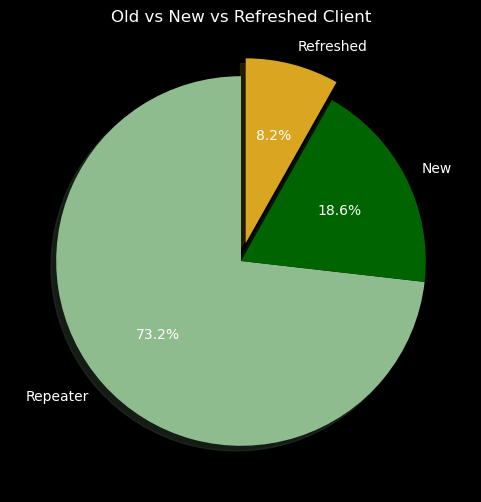

In [259]:
#let's see how many repeater, or new clients does bank has 
plt.style.use("default")
plt.style.use("dark_background")
plt.figure(figsize=(6,6))
prev.NAME_CLIENT_TYPE.value_counts().plot.pie(autopct="%1.1f%%", shadow=True,
                                            explode = [0,0,0.1], startangle=90,
                                            colors = ['darkseagreen', 'darkgreen', 'goldenrod'])
plt.ylabel("")
plt.title("Old vs New vs Refreshed Client")
plt.show()

#### Insight:
- More than 70% of the clients were old. 
- We have 18.6% new clients.
- 8.2% refreshed ones.

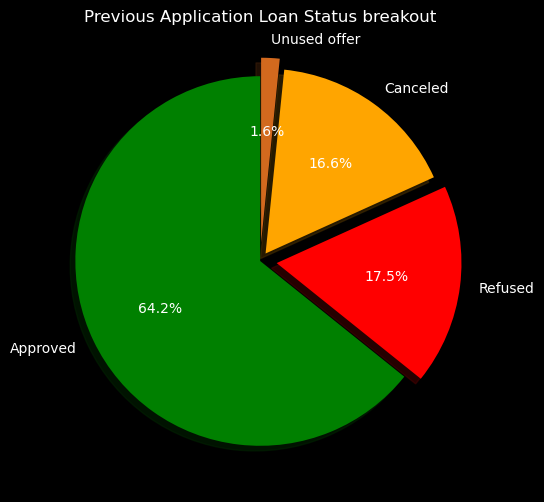

In [260]:
#checking the status of previous application loan using pie chart
plt.figure(figsize=(6,6))
prev.NAME_CONTRACT_STATUS.value_counts().plot.pie(autopct="%1.1f%%", shadow=True, 
                                                  explode = [0,0.09,0.05,0.1], startangle=90, 
                                                  colors = ['g','r','orange','chocolate'])
plt.ylabel("")
plt.title("Previous Application Loan Status breakout")
plt.show() 

#### Insight:
- For 64% of previous loan applicants, loan status was approved by the bank.
- 17.5% was Refused, 16.6% cancelled and only 1.6% unused offer.  

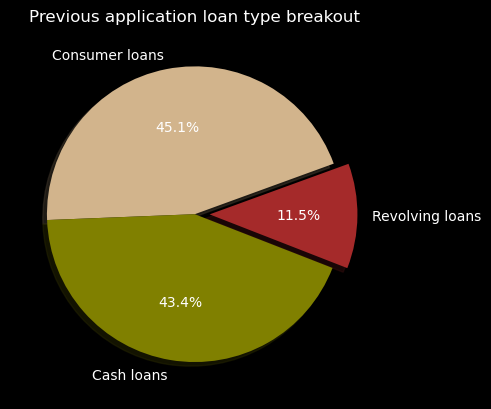

In [261]:
#checking the type of loan using pie for previous application
prev.NAME_CONTRACT_TYPE.value_counts().plot.pie(autopct="%1.1f%%", explode = [0,0,0.1], 
                                                shadow=True, startangle=20, colors=['tan','olive','brown'])
plt.title("Previous application loan type breakout")
plt.ylabel("")
plt.show()

#### Insight:
- Percentage of cash(43%) and consumer loans(45%) is almost same with a 2percent difference only.
- Revolving loan, just like applications dataframe, are very low in percentage i.e. 11.5% only

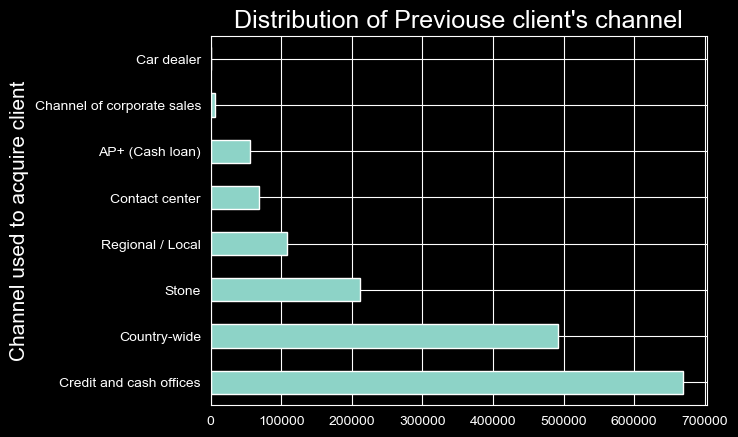

In [262]:
#let's have a look on distribution of channel by which was client acquired
sns.set_style('whitegrid')
plt.style.use("dark_background") 
prev.CHANNEL_TYPE.value_counts().plot.barh()
plt.ylabel("Channel used to acquire client", fontsize=15)
plt.title("Distribution of Previouse client's channel", fontdict={'size':18})
plt.show()

#### Insight:
- Most of the clients were reached using channel type "Credit and cash offices" followed by "Country-wide"

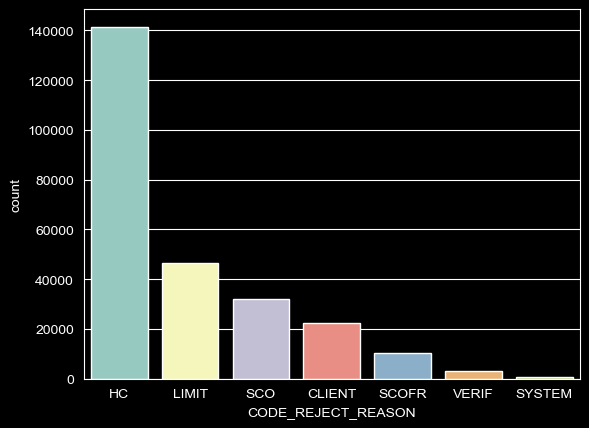

In [263]:
#cheking number of applications rejected by bank based on cdoe reasons.
sns.barplot(x = loan_df.CODE_REJECT_REASON.value_counts().index, y = loan_df.CODE_REJECT_REASON.value_counts())
plt.show()

#### Insight:
- Most application has been rejected by bank because of 'HC' i.e. High risk.
- This code might indicate that the applicant is considered to be at a high risk of defaulting on the loan due to factors such as poor credit history, high debt-to-income ratio, or other reasons.
- Least is due to system diefault. 

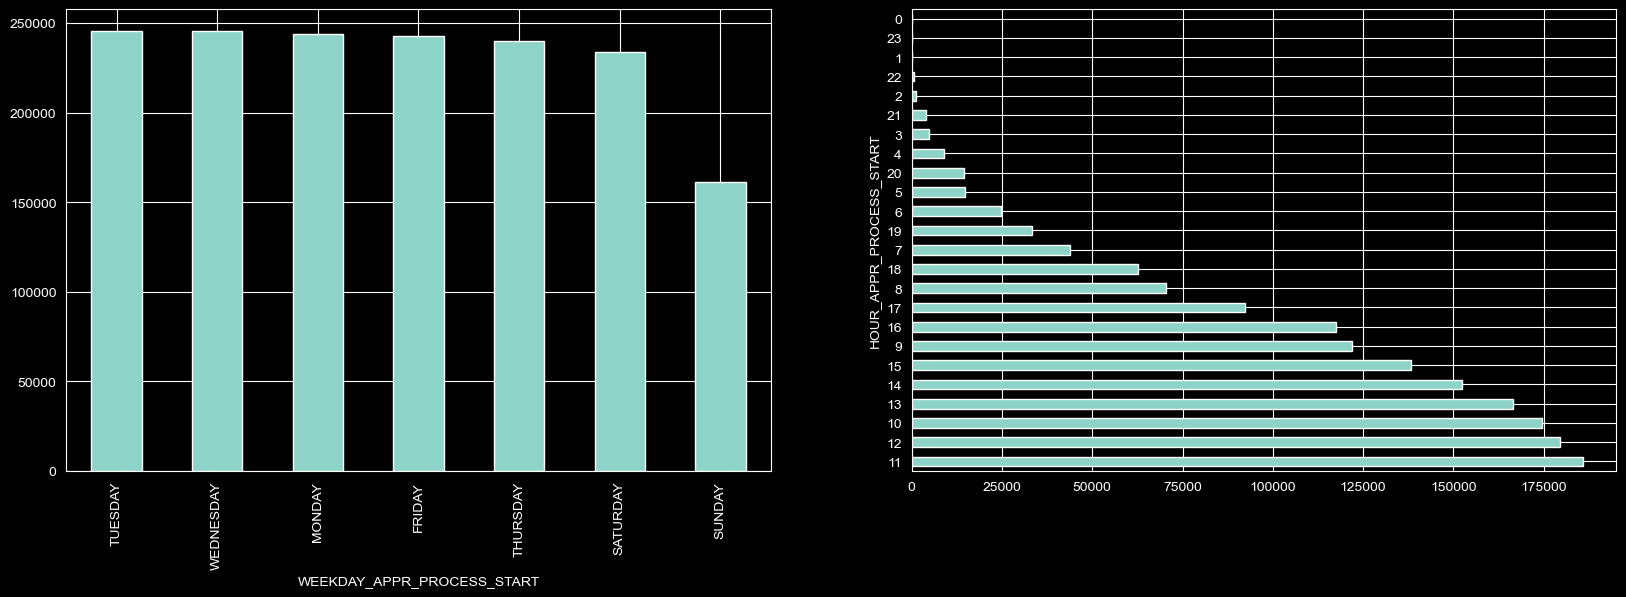

In [264]:
#checking number of previous application on different days and hours
plt.style.use("dark_background")
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
prev.WEEKDAY_APPR_PROCESS_START.value_counts().plot.bar()

plt.subplot(1,2,2)
prev.HOUR_APPR_PROCESS_START.value_counts().plot.barh()
plt.show()

#### Insight:
- Just like applications dataset, here also we have least applications on Sundays. (This may be because sundays banks are closed)
- We have very less people appyling during night after 7pm. (Again banks starts closing during this time)

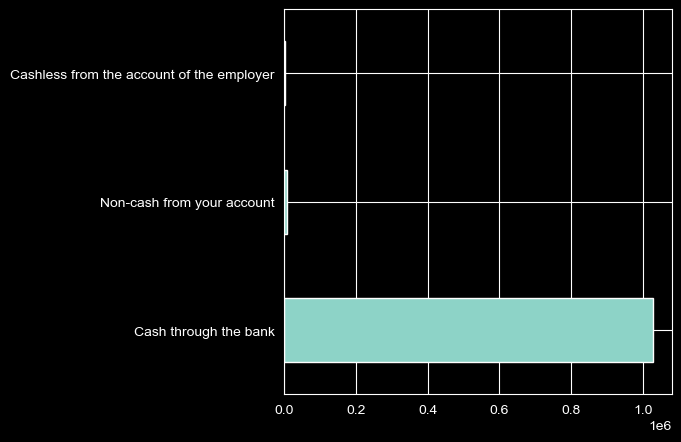

It's cleary visible that 99.9% of payments come through cash through banks.


In [265]:
#checking type of payment client uses to pay off loan
plt.figure(figsize=(5,5))
prev.NAME_PAYMENT_TYPE.value_counts().plot.barh()
plt.ylabel("")
plt.show()

print("It's cleary visible that 99.9% of payments come through cash through banks.")

In [266]:
prev.NAME_YIELD_GROUP.value_counts().index

Index(['middle', 'high', 'low_normal', 'low_action'], dtype='object', name='NAME_YIELD_GROUP')

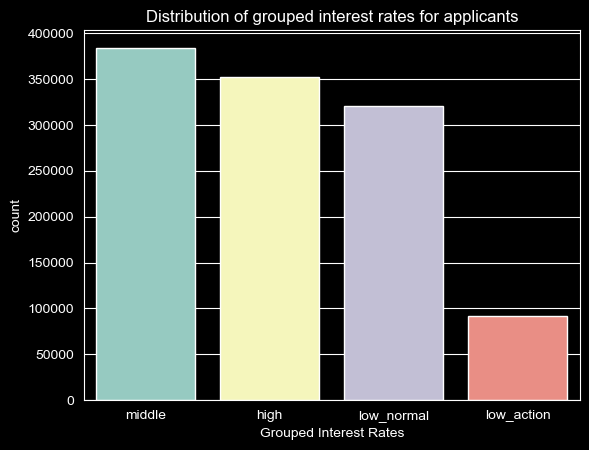

In [267]:
#let's see most important category according to me which is grouped interest rates 
sns.barplot(x= prev.NAME_YIELD_GROUP.value_counts().index, y=prev.NAME_YIELD_GROUP.value_counts())
plt.xlabel("Grouped Interest Rates")
plt.title("Distribution of grouped interest rates for applicants")
plt.show()

#### Insight:
- We have most loans(350,000+) with middle interest rate and least (<100000) with low interest.

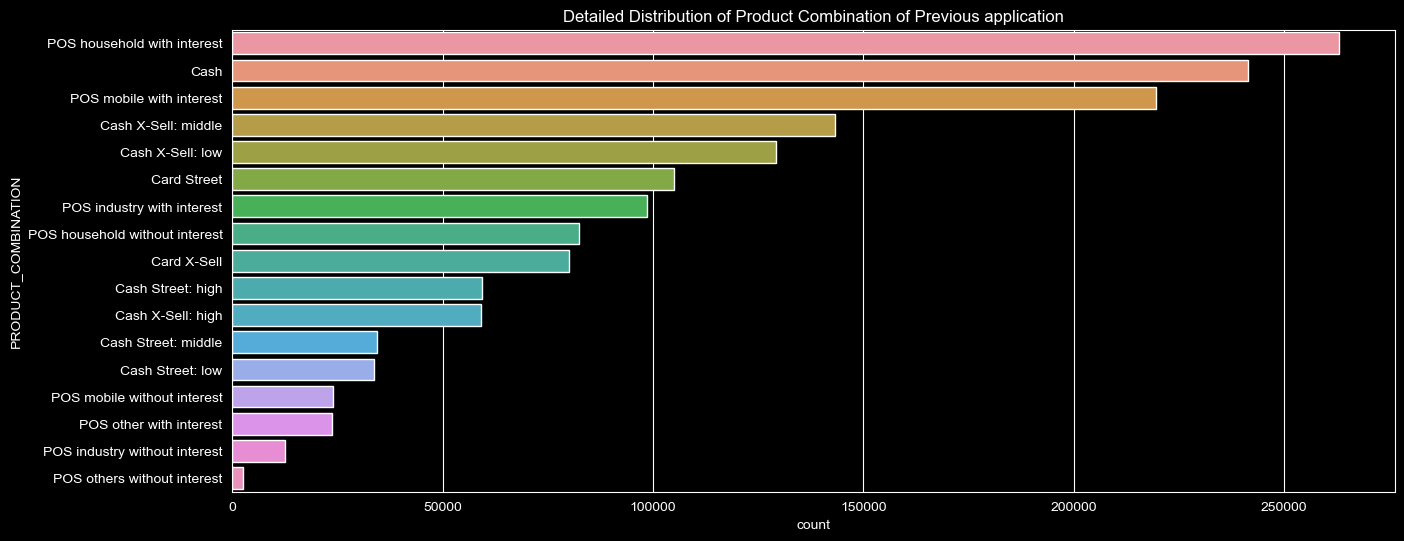

In [268]:
#checking product combination of previous application
plt.figure(figsize=(15,6))
sns.countplot(data= prev, y= "PRODUCT_COMBINATION", order=prev.PRODUCT_COMBINATION.value_counts().index)
plt.title("Detailed Distribution of Product Combination of Previous application")
plt.show()

#### Insight:
- Most product in 'POS household with interest' followed by 'Cash'.
- Least in POS other without interest and POS industry without interest

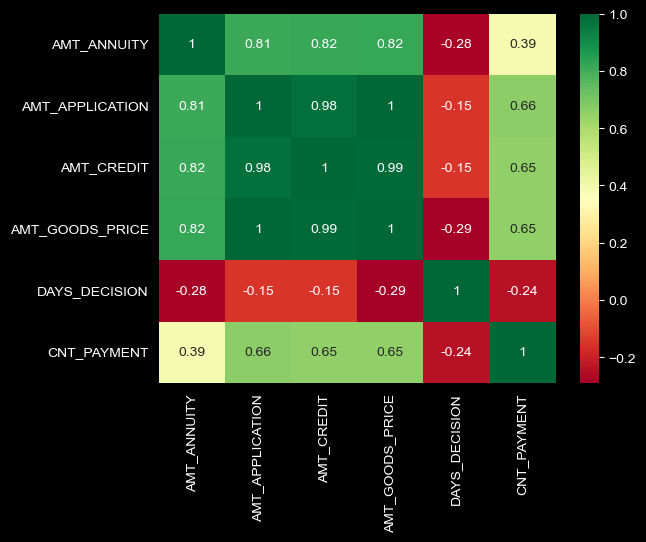

In [269]:
#quickly checking correlations between all numerical variables in previous applications dataframe
sns.heatmap(prev[prev_num_cols].corr(), annot=True, cmap='RdYlGn')
plt.show()

#### Insight:
- In previous applications dataframe also loan amount (AMT_CREDIT) has high positive correlation with:
1. AMT_ANNUITY
2. AMT_GOODS_PRICE
3. AMT_APPLICATION (this is the loan amount client applied for)

- Another positive correlation(not high but there is a correlation-0.65) to note here is of CNT_PAYMENT(Term of previous credit at application of the previous application) with:
1. AMT_APPLICATION
2. AMT_CREDIT
3. AMT_GOODS_PRICE

# Now visually analysing merged Dataframes

In [270]:
loan_df.shape

(1365672, 57)

In [271]:
loan_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_CURR', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_CURR', 'AMT_ANNUITY_CURR', 'AMT_GOODS_PRICE_CURR',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'Age', 'Work_Experience', 'Registration_Last_Updated',
       'FLAG_WORK_PHONE', 'FLAG_HOME_PHONE', 'FLAG_CONT_MOBILE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START_CURR',
       'HOUR_APPR_PROCESS_START_CURR', 'REG_REGION_NOT_WORK_REGION',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'TOTAL_DOCUMENTS',
       'TOTAL_AMT_REQ_CREDIT_BUREAU_YEAR', 'Debt_to_Income', 'Age Groups',
       'NAME_CONTRACT_TYPE_PREV', 'AMT_ANNUITY_PREV', 'AMT_APPLICATION',
       'AMT_CREDIT

In [272]:
#checking duplicates
loan_df.duplicated().sum()

692

In [273]:
#dropping duplicates
loan_df.drop_duplicates(inplace=True)

In [274]:
#let's now analyse our target variable (defaulter and non-defaulter) with contract status of previous application
grouped = loan_df.groupby(['NAME_CONTRACT_STATUS', 'TARGET']).size().reset_index(name='count')
pivot = grouped.pivot(index='NAME_CONTRACT_STATUS', columns='TARGET', values='count')

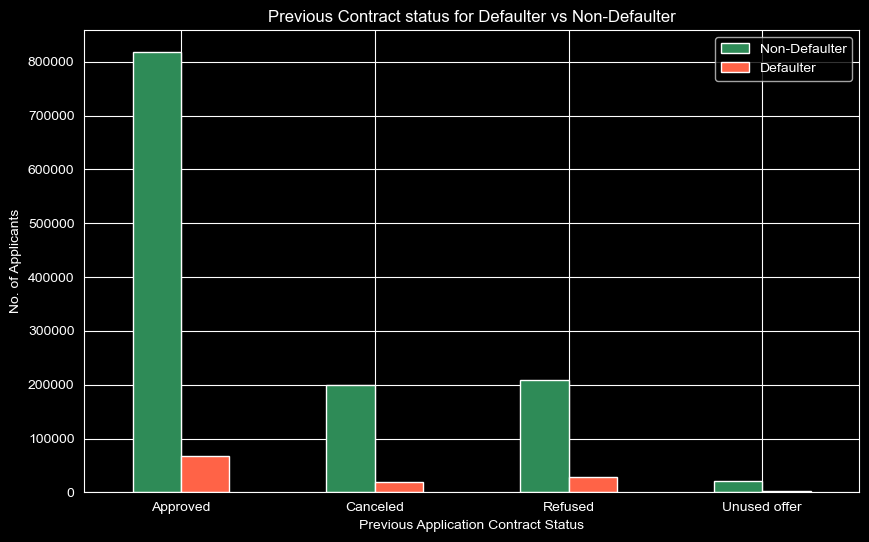

In [275]:
#plotting the bar chart
pivot.plot.bar(figsize=(10,6), color=['seagreen', 'tomato'])
plt.xticks(rotation=0)
plt.title("Previous Contract status for Defaulter vs Non-Defaulter")
plt.xlabel("Previous Application Contract Status")
plt.ylabel("No. of Applicants")
plt.legend(['Non-Defaulter', 'Defaulter'])
plt.show() 

In [276]:
#calculating the percentage of good loans cancelled previously by client
total_cancelled = grouped[grouped['NAME_CONTRACT_STATUS'] == 'Canceled']['count'].sum()
good_loan_cancelled = grouped[(grouped['NAME_CONTRACT_STATUS'] == 'Canceled') & (grouped.TARGET==0)]['count'][2]
percent_good_cancelled = round((good_loan_cancelled/total_cancelled)*100,2)

#calculation the percentage of good loans that were refused earlier by bank
total_refused = grouped[grouped['NAME_CONTRACT_STATUS'] == 'Refused']['count'].sum()
good_loan_refused = grouped[(grouped['NAME_CONTRACT_STATUS'] == 'Refused') & (grouped.TARGET==0)]['count'][4]
percent_good_refused = round((good_loan_refused/total_refused)*100,2)

#calculation the percentage of good loans that were cancelled by client at some stage
total_unused = grouped[grouped['NAME_CONTRACT_STATUS'] == 'Unused offer']['count'].sum()
good_loan_unused = grouped[(grouped['NAME_CONTRACT_STATUS'] == 'Unused offer') & (grouped.TARGET==0)]['count'][6]
percent_good_unused = round((good_loan_unused/total_unused)*100,2) 

print("Percentage of Current Good Loans but Previously Cancelled by client: - {}".format(percent_good_cancelled))
print("Percentage of Current Good Loans but Previously Refused by company: - {}".format(percent_good_refused))
print("Percentage of Current Good Loans but Previously Unused by client: - {}".format(percent_good_unused))

Percentage of Current Good Loans but Previously Cancelled by client: - 90.91
Percentage of Current Good Loans but Previously Refused by company: - 88.0
Percentage of Current Good Loans but Previously Unused by client: - 91.74


### Important Insight:
- **90% of loans that were previously cancelled by clients are actually being paid by them on time currently. This means company should market more to such clients who are cancelling the loans either or decreasing interest rates or giving some sort of offer because they have good potential to pay it off.**

- **88% of loans that company refused previously for the client are being paid on time now. This means company should not refuse the loan before proper analysis.**

- **91% loans that client cancelled at some stage are also now being paid on time by client. This too means that company should note down the reason for which client refused and work on it in future to increase profits.**

In [277]:
#let's see the correlation between all the numerical from both the datasets and pick the best ones
#checking previous numerical columns
prev_num_cols

['AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_DECISION',
 'CNT_PAYMENT']

In [278]:
#checking numerical in applications
num_cols.remove('SK_ID_CURR')
num_cols

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'Age',
 'Work_Experience',
 'Registration_Last_Updated',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_2',
 'DAYS_LAST_PHONE_CHANGE']

In [279]:
#seggregating category and numerical columns
loan_df_num_cols = []
loan_df_cat_cols = []
for i in loan_df.columns:
    if loan_df[i].nunique() > 34 and i!='SK_ID_CURR':
        loan_df_num_cols.append(i) 
    elif loan_df[i].nunique() <= 34:
        loan_df_cat_cols.append(i) 
print(loan_df_num_cols,'\n\n\n',loan_df_cat_cols)

['AMT_INCOME_TOTAL', 'AMT_CREDIT_CURR', 'AMT_ANNUITY_CURR', 'AMT_GOODS_PRICE_CURR', 'REGION_POPULATION_RELATIVE', 'Age', 'Work_Experience', 'Registration_Last_Updated', 'EXT_SOURCE_2', 'Debt_to_Income', 'AMT_ANNUITY_PREV', 'AMT_APPLICATION', 'AMT_CREDIT_PREV', 'AMT_GOODS_PRICE_PREV', 'DAYS_DECISION', 'CNT_PAYMENT'] 


 ['TARGET', 'NAME_CONTRACT_TYPE_CURR', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_HOME_PHONE', 'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START_CURR', 'HOUR_APPR_PROCESS_START_CURR', 'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'TOTAL_DOCUMENTS', 'TOTAL_AMT_REQ_CREDIT_BUREAU_YEAR', 'Age Groups', 'NAME_CONTRACT_TYPE_PREV', 'WEEKDAY_APPR_PROCESS_START_PREV', 'HOUR_APPR_PRO

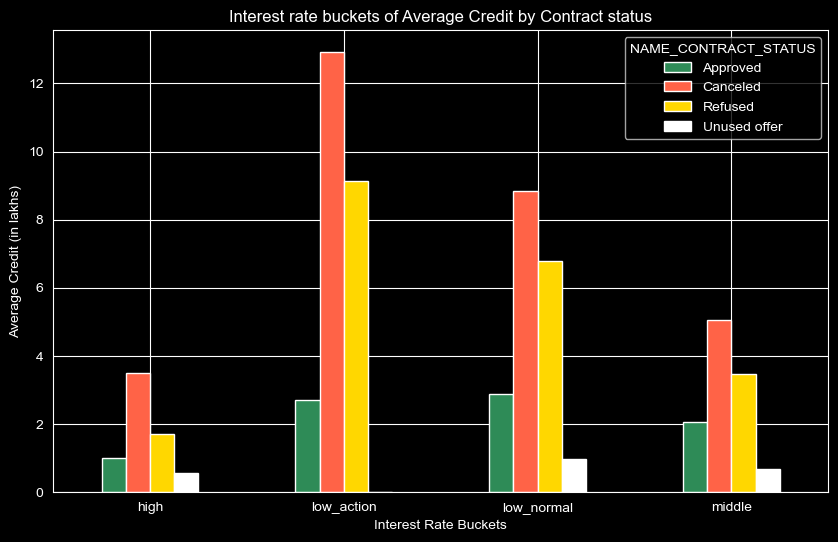

In [280]:
#let's see the relation between defaulter and non-defaulter based on interest rates buckets.
interest = loan_df.groupby(["NAME_YIELD_GROUP", "NAME_CONTRACT_STATUS"])['AMT_CREDIT_PREV'].mean().reset_index()
piv = interest.pivot(index='NAME_YIELD_GROUP', columns='NAME_CONTRACT_STATUS', values='AMT_CREDIT_PREV')
piv.plot.bar(figsize=(10,6), color=['seagreen','tomato', 'gold', 'white'])
plt.xticks(rotation=0) 
plt.xlabel("Interest Rate Buckets") 
plt.ylabel("Average Credit (in lakhs)")
plt.title("Interest rate buckets of Average Credit by Contract status")
plt.show() 

#### Insight:
- We have very high average credit for applicants cancelling the loan in all buckets of interest rate. 
- There are no unused offers in low_action bucket which means either people canceled in the starting or they took the loan. In between nobody cancelled the loan for low_action bucket. 
- Banks should keep low_normal interest rates to attract most people towards loan. 

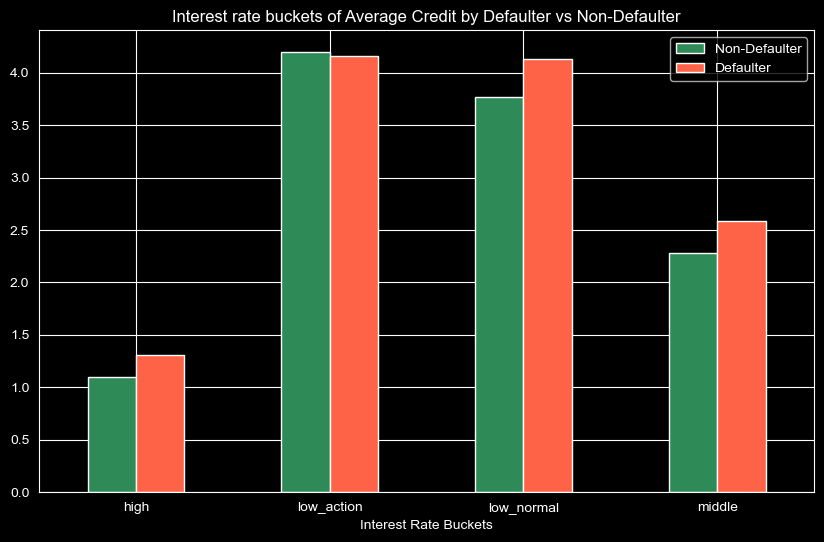

In [281]:
#let's see the relation between defaulter and non-defaulter based on interest rates buckets.
interest = loan_df.groupby(["NAME_YIELD_GROUP", "TARGET"])['AMT_CREDIT_PREV'].mean().reset_index()
piv = interest.pivot(index='NAME_YIELD_GROUP', columns='TARGET', values='AMT_CREDIT_PREV')
piv.plot.bar(figsize=(10,6), color=['seagreen','tomato'])
plt.xticks(rotation=0) 
plt.xlabel("Interest Rate Buckets")
plt.title("Interest rate buckets of Average Credit by Defaulter vs Non-Defaulter")
plt.legend(['Non-Defaulter', 'Defaulter'])  

plt.show() 

#### Insight:
- Average credit of defaulter is higher, in high, low_normal, and middle interest rate buckets. 
- It's same for low_action interest rate bucket.

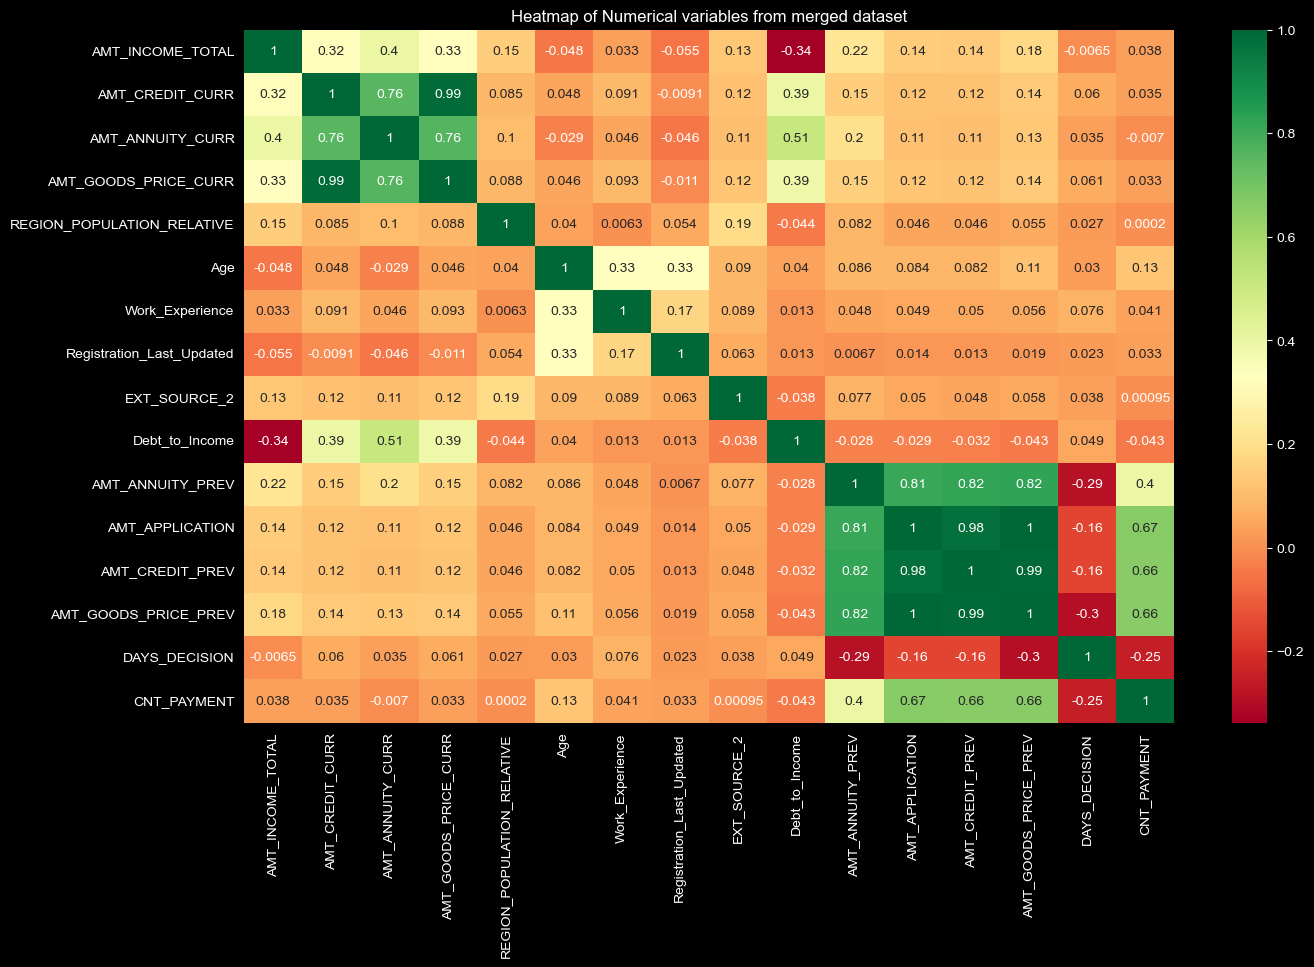

In [282]:
#let's make heat map from numerical columns now
plt.figure(figsize=(15,9))
sns.heatmap(loan_df[loan_df_num_cols].corr(), cmap="RdYlGn", annot=True)
plt.title("Heatmap of Numerical variables from merged dataset")
plt.show()

#### Insight:
- Correlation for variables is same as before in applications and previous dataframe.
- No new correlation. Please refer to previous heatmaps.

---
# Summary of all Insights
#### Good Loan - Applicant paying all installments on time and will likely pay off the loan on time. (TARGET = 0)
#### Bad Loan   - Applicant not paying installments and will likely default. (TARGET = 1)

---
#### Factors influencing GOOD LOANS:
- **NAME_EDUCATION_TYPE:** Academic degree has least defaults since there are less people who have academic degree in our dataset. 
- **NAME_INCOME_TYPE:** Student and Businessmen have no defaults. One thing to note is that we few students and businessmen in our dataset, so saying anything in general for businessmen or students would be wrong.
- **REGION_RATING_CLIENT_W_CITY:** People living in city Rating 1 have least percentage of defaults. 
- **DAYS_BIRTH(Renamed as Age):** People above age of 50 have lowest probability of defaulting
- **DAYS_EMPLOYED(Renamed as Wok_Experience):** People above 40 years of work experience are least likely to default
- **AMT_INCOME_TOTAL:** Average total income of people who don't default is more than those who default. Above 7lakh of annual income, there are less chances of a person defaulting.
---

#### Factors influencing BAD LOANS:
- **Age Group** & **EXT_SOURCE_2** -  **Credit score is lowest** for people in age ranging 20-30. They tend to default more as compared to other age groups. ***People with low credit score have high chances of defaulting.***  
- **CODE_GENDER:** Men even though less in number as compared to women in our dataset, are more likely to default than women.
- **NAME_FAMILY_STATUS:** Unmarried people (single ones) are morelikely to default(percentage wise) than married people. 
- **NAME_EDUCATION_TYPE:** People with lower secondary education have the highest default rate.
- **NAME_INCOME_TYPE:** Unemployed people are more likely defaulted than employed(percentage terms).
- **REGION_RATING_CLIENT_W_CITY:** People who live in city Rating 3 have highest percentage of defaults. 
- **OCCUPATION_TYPE:** ***Laborers*** are having most defaults. So, giving loans to labourers should be avoided.
- **ORGANIZATION_TYPE:** People in ***Construction and Restaurant*** organization type are most likely to default.
- **DAYS_EMPLOYED(Renamed to Work_Experience):** People with 2-6 years work experience have high default rates.
- **CNT_FAM_MEMBERS:** Applicants with more family members i.e. 5 and 5+ are having around 10% default rate.(absolute terms)
- **AMT_CREDIT:** People who have taken loan amount around 5lakh are most likely to default.
- **HOUR_APPR_PROCESS_START:** Be it previous or current application. Most defaults are occuring for those who fill application near 10am - 12pm. Also, most applicants fill applications at this hour.
- **Debt_to_Income:** Defualters' debt-to-income ratio i.e. percentage of income that goes to pay loan is higher than those of non-defaulters. 
---

#### Keeping following points in mind, company can take necessary steps in order to avoid giving loans to people who may default.

1. **AMT_CREDIT:** People who get loan for near 500,000 are defaulting more than others. Increasing the interest rates near this credit amount is the step that the company should take. 
2. **AMT_INCOME:** Since 90% of the applicants have Total Income less than 300,000 and these people are having most defaults, hence, company should charge high rate of interests to people who have income less than 3lakhs per annum.
3. **CNT_FAM_MEMBERS:** People with 5 or more family members are having the highest default rate which is 9.4%. Hence, company should charge higher interest rate to such people if possible.  
4. **NAME_CONTRACT_STATUS:**
- 4.1.  We have very high numbers of applicants cancelling the loan in all buckets of interest. 
- 4.2. There are most people cancelling the loan in low_action. Maybe because interest rate in this bucket is very low due to which people are cancelling more. They might think such low interest rate is not possible. Also, there are no unused offers in this bucket as well which means either people cancelled in the starting or they took the loan. In between nobody cancelled the loan. 
- 4.3. Banks should keep **low_normal** interest rates to attract most people towards loan.
---

### More Important Insights:
- **90% of loans that were previously cancelled by clients are actually being paid by them on time now. This means company should market more to such clients who are cancelling the loans either by decreasing interest rates or giving some sort of offer because they have good potential to pay it off.**

- **88% of loans that company refused previously for the client are now being paid by client on time. This means company should not refuse the loan before proper analysis.**

- **91% loans that client cancelled at some stage later are also now being paid on time by client. This too means that company should note down the reason for which client refused and work on it in future to increase profits.**
- **EXT_SOURCE_2** -  **Credit score of defaulters at all age stages, for both male and female is lower than those of Non-defaulters. So, proper background check should be done for people with low credit scores.**
---

# Summary's Summary

- **The majority of applicants opt for cash loans over revolving loans, with only a small percentage choosing revolving credit.**

---
- **Despite gender imbalance, male applicants are defaulting more as compared to female applicants.**
---
- **Car and house ownership alone don't significantly impact default rates since a large portion of applicants don't own cars and 1 in every 3 people don't own house.**
---
- **The number of children an applicant has doesn't seem to correlate with default rates.**
---
- **Whether an applicant is accompanied or not during the loan application process doesn't influence default rates significantly except if accompanied by children, then default rate is least.**
---
- **Occupation type does play a role, with laborers being more prone to default compared to other occupations.**
---
- **People with more family members, particularly those with five or more, are more likely to default.**
---
- **People living in city with rating of `3` have highest default rate and with rating of `1` have least default rate.**
---
- **Time of application submission, especially on Tuesdays, and during certain hours like 10 AM to 12 PM, may slightly affect default rates since most applications are received at this day and time.**
---
- **Organization types like Construction and Restaurant, have higher default rates compared to others.**
---
- **People with academic degrees are least likely to default and people with lower secondary are most likely to default.**
---
- **Credit scores tend to be lower for defaulters across all age groups and genders compared to non-defaulters.**
---
- **High debt-to-income ratios are associated with higher default rates.**
---
- **Loan amount, installment amounts, and price of goods have a positive correlation with each other.**
---
- **People with fewer years of work experience and lower annual incomes are more likely to default.**

---
## **Overall, there's a higher likelihood of loan default among applicants with lower credit scores, lower incomes, and higher debt-to-income ratios.**